In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\ashut\Desktop\Final Sir\Cleaned_Dataset.csv")

In [3]:
len(data)

11564

In [4]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
data.columns

Index(['Unnamed: 0.1', 'author/location', 'createdAt', 'id', 'text', 'Country',
       'Month_Year', 'hate', 'Time'],
      dtype='object')

In [6]:
data_bi_ti=data

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3750953570.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])


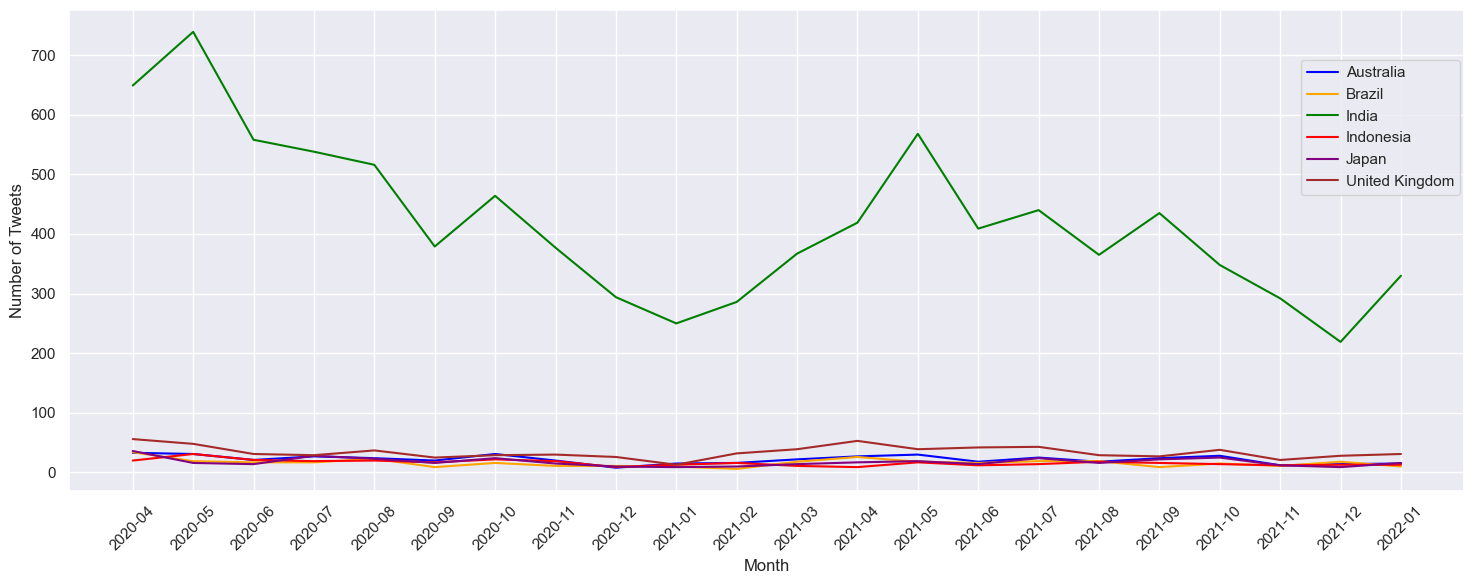

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define target countries and their corresponding colors
country_colors = {
    'Australia': 'blue',
    'Brazil': 'orange',
    'India': 'green',
    'Indonesia': 'red',
    'Japan': 'purple',
    'United Kingdom': 'brown'
}

# Grouping and preparing the data
text_count_by_country_month = data.groupby(['Country', 'Month_Year']).size().reset_index(name='Text_Count')
text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])
text_count_by_country_month = text_count_by_country_month.sort_values(by=['Time'])

# Plotting
plt.figure(figsize=(15, 6))

# Use seaborn style to match the grid and background layout
sns.set(style="darkgrid")

# Create lists to store handles for legend
handles = []

# Loop through each target country to plot
for country in country_colors.keys():  # Use the order defined in country_colors
    dt = text_count_by_country_month[text_count_by_country_month['Country'] == country]
    line, = plt.plot(dt['Time'].dt.strftime('%Y-%m'), dt['Text_Count'], label=country, color=country_colors[country])  # Apply color
    handles.append(line)  # Append the line handle for the legend

# Add labels for axes
plt.ylabel('Number of Tweets')  # Label for y-axis
plt.xlabel('Month')  # Label for x-axis

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Create a custom legend
plt.legend(handles, country_colors.keys(), loc='lower center', bbox_to_anchor=(0.94, 0.6), 
           ncol=1, handletextpad=0.5, borderaxespad=0.5, labelspacing=0.5)

# Tight layout to ensure labels fit
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\133121102.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])


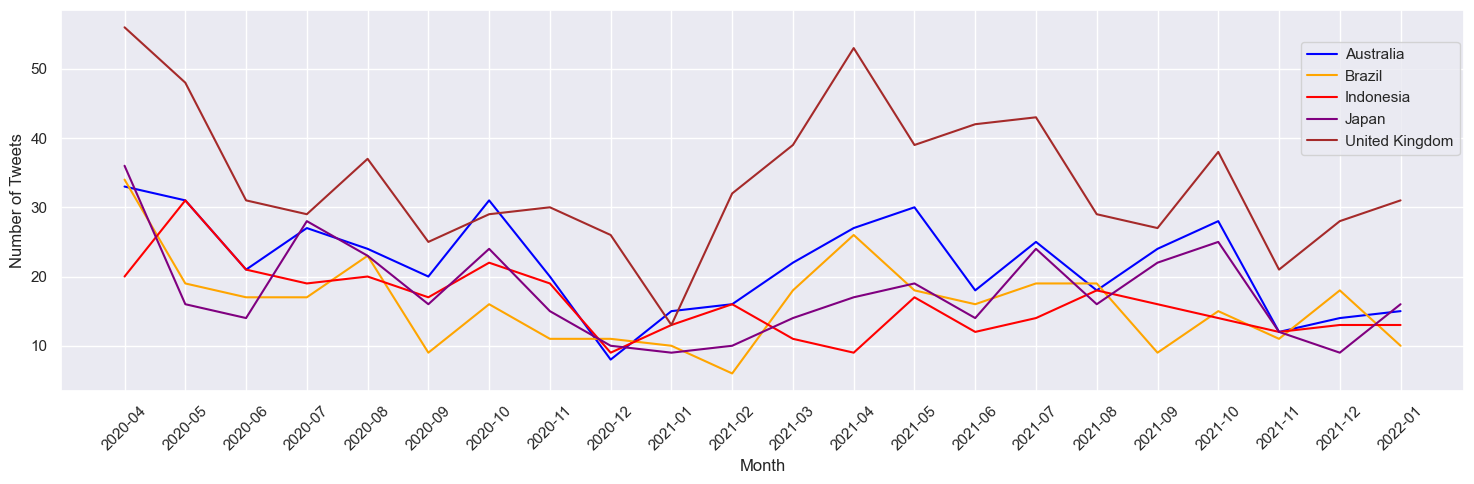

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define target countries and their corresponding colors
country_colors = {
    'Australia': 'blue',
    'Brazil': 'orange',
    'Indonesia': 'red',
    'Japan': 'purple',
    'United Kingdom': 'brown'
}

# Grouping and preparing the data
text_count_by_country_month = data.groupby(['Country', 'Month_Year']).size().reset_index(name='Text_Count')

# Exclude India from the data
text_count_by_country_month = text_count_by_country_month[text_count_by_country_month['Country'] != 'India']

text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])
text_count_by_country_month = text_count_by_country_month.sort_values(by=['Time'])

# Plotting
plt.figure(figsize=(15, 5))

# Use seaborn style to match the grid and background layout
sns.set(style="darkgrid")

# Create lists to store handles for legend
handles = []

# Loop through each target country to plot
for country in country_colors.keys():  # Use the order defined in country_colors
    dt = text_count_by_country_month[text_count_by_country_month['Country'] == country]
    line, = plt.plot(dt['Time'].dt.strftime('%Y-%m'), dt['Text_Count'], label=country, color=country_colors[country])  # Apply color
    handles.append(line)  # Append the line handle for the legend

# Add labels for axes
plt.ylabel('Number of Tweets')  # Label for y-axis
plt.xlabel('Month')  # Label for x-axis

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Create a custom legend
plt.legend(handles, country_colors.keys(), loc='lower center', bbox_to_anchor=(0.94, 0.6), 
           ncol=1, handletextpad=0.5, borderaxespad=0.5, labelspacing=0.5)

# Tight layout to ensure labels fit
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\2881907201.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])


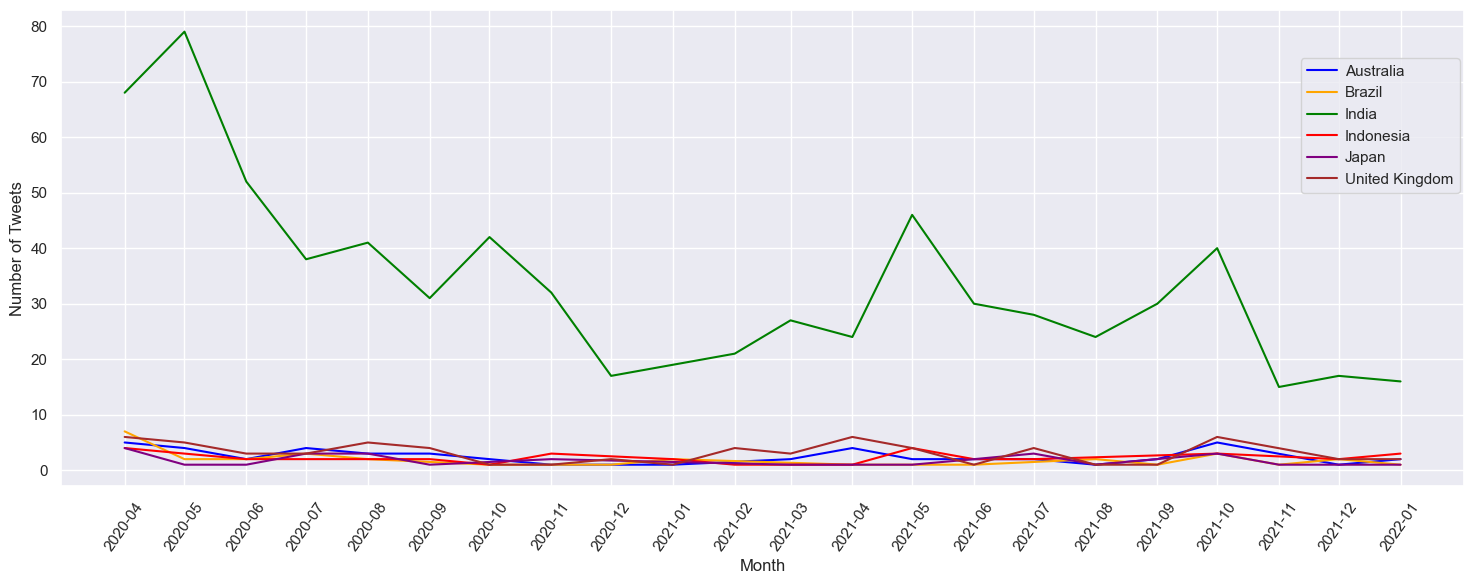

In [9]:
import matplotlib.dates as mdates

# Assuming new_handles and custom_labels have been defined earlier

text_count_by_country_month = data[data['hate'] == 1].groupby(['Country', 'Month_Year']).size().reset_index(name='Text_Count')
text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])
text_count_by_country_month = text_count_by_country_month.sort_values(by=['Time'])

# Plotting
plt.figure(figsize=(15, 6))

# Define the specific order of countries and their corresponding colors
ordered_countries = ['Australia', 'Brazil', 'India', 'Indonesia', 'Japan', 'United Kingdom']
country_colors = {
    'Australia': 'blue',
    'Brazil': 'orange',
    'India': 'green',
    'Indonesia': 'red',
    'Japan': 'purple',
    'United Kingdom': 'brown'
}

# Define custom handles and labels for the legend
new_handles = []
custom_labels = []

# Loop through the ordered countries and plot with specified colors
for country in ordered_countries:
    dt = text_count_by_country_month[text_count_by_country_month['Country'] == country]
    line, = plt.plot(dt['Time'], dt['Text_Count'], label=country, color=country_colors[country])
    new_handles.append(line)  # Collect handle for the line
    custom_labels.append(country)  # Collect custom label for the country

plt.ylabel('Number of Tweets')
plt.xlabel('Month')

# Format x-axis to display months in 'YYYY-MM'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set specific ticks to display only the desired months
desired_ticks = pd.date_range(start='2020-04', end='2022-01', freq='MS')
plt.xticks(desired_ticks, rotation=55)

# Set custom legend using new_handles and custom_labels with specific order
plt.legend(new_handles, custom_labels, loc='lower center', bbox_to_anchor=(0.94, 0.6), 
           ncol=1, handletextpad=0.5, borderaxespad=0.5, labelspacing=0.5)

plt.tight_layout()
plt.show()


C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\1715945776.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])


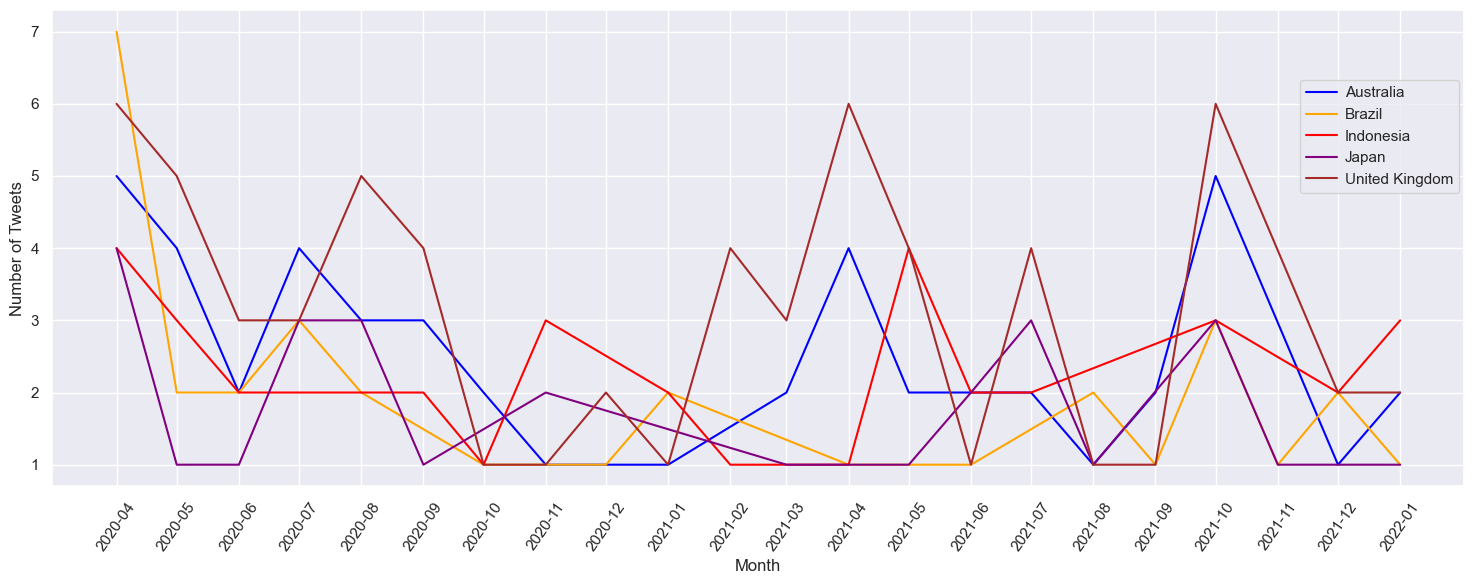

In [10]:
import matplotlib.dates as mdates

# Assuming new_handles and custom_labels have been defined earlier

text_count_by_country_month = data[data['hate'] == 1].groupby(['Country', 'Month_Year']).size().reset_index(name='Text_Count')
text_count_by_country_month['Time'] = pd.to_datetime(text_count_by_country_month['Month_Year'])
text_count_by_country_month = text_count_by_country_month.sort_values(by=['Time'])

# Plotting
plt.figure(figsize=(15, 6))

# Define the specific order of countries (excluding India) and their corresponding colors
ordered_countries = ['Australia', 'Brazil', 'Indonesia', 'Japan', 'United Kingdom']
country_colors = {
    'Australia': 'blue',
    'Brazil': 'orange',
    'Indonesia': 'red',
    'Japan': 'purple',
    'United Kingdom': 'brown'
}

# Define custom handles and labels for the legend
new_handles = []
custom_labels = []

# Loop through the ordered countries (without India) and plot with specified colors
for country in ordered_countries:
    dt = text_count_by_country_month[text_count_by_country_month['Country'] == country]
    line, = plt.plot(dt['Time'], dt['Text_Count'], label=country, color=country_colors[country])
    new_handles.append(line)  # Collect handle for the line
    custom_labels.append(country)  # Collect custom label for the country

plt.ylabel('Number of Tweets')
plt.xlabel('Month')

# Format x-axis to display months in 'YYYY-MM'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set specific ticks to display only the desired months
desired_ticks = pd.date_range(start='2020-04', end='2022-01', freq='MS')
plt.xticks(desired_ticks, rotation=55)

# Set custom legend using new_handles and custom_labels with specific order
plt.legend(new_handles, custom_labels, loc='lower center', bbox_to_anchor=(0.94, 0.6), 
           ncol=1, handletextpad=0.5, borderaxespad=0.5, labelspacing=0.5)

plt.tight_layout()
plt.show()


In [11]:
text_count_by_country_month

Country Month_Year  Text_Count       Time
0        Australia   Apr-2020           5 2020-04-01
36           India   Apr-2020          68 2020-04-01
58       Indonesia   Apr-2020           4 2020-04-01
19          Brazil   Apr-2020           7 2020-04-01
91  United Kingdom   Apr-2020           6 2020-04-01
..             ...        ...         ...        ...
99  United Kingdom   Jan-2022           2 2022-01-01
26          Brazil   Jan-2022           1 2022-01-01
64       Indonesia   Jan-2022           3 2022-01-01
6        Australia   Jan-2022           2 2022-01-01
79           Japan   Jan-2022           1 2022-01-01

[112 rows x 4 columns]

In [12]:
#date wise bar plot for hate
date_hate=data.groupby('Time').agg({'Month_Year':'first','hate':'count'})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


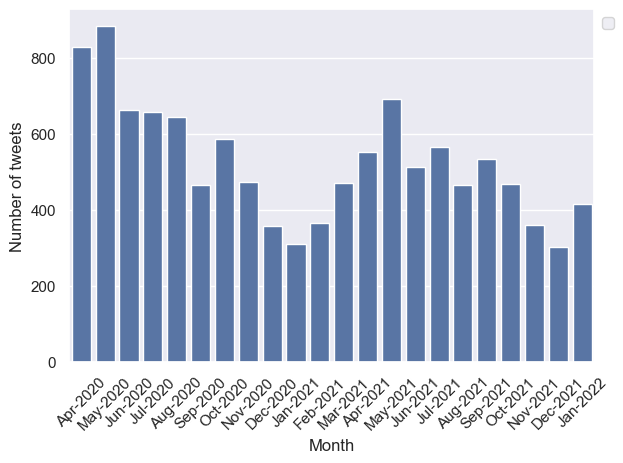

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=date_hate,x='Month_Year',y='hate')
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


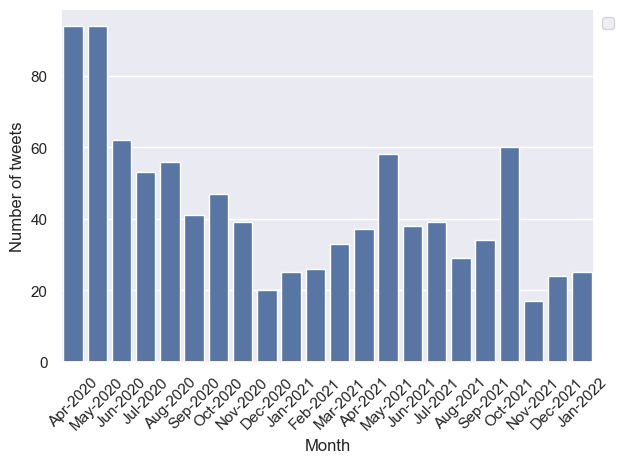

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
date_hate=data.groupby('Time').agg({'Month_Year':'first','hate':'sum'})
sns.barplot(data=date_hate,x='Month_Year',y='hate')
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [15]:
country_hate=data.groupby('Country').agg({'hate':'sum'})

In [16]:
country_hate

hate
Country             
Australia         48
Brazil            33
India            737
Indonesia         39
Japan             29
United Kingdom    65

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


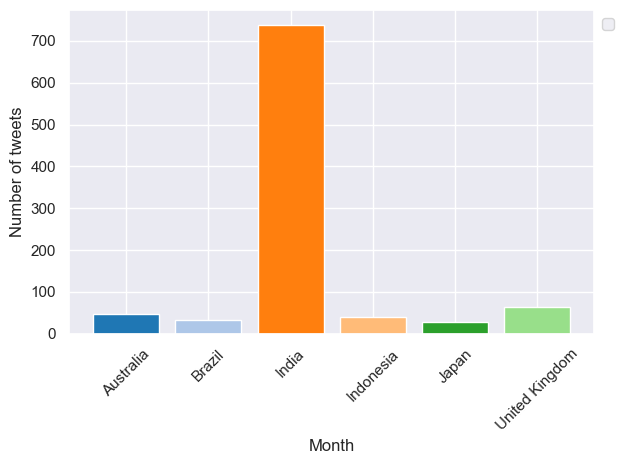

In [17]:
import seaborn as sns# Antihindu tweets
import matplotlib.pyplot as plt
plt.bar(country_hate.index,country_hate['hate'],color=plt.cm.tab20.colors)
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


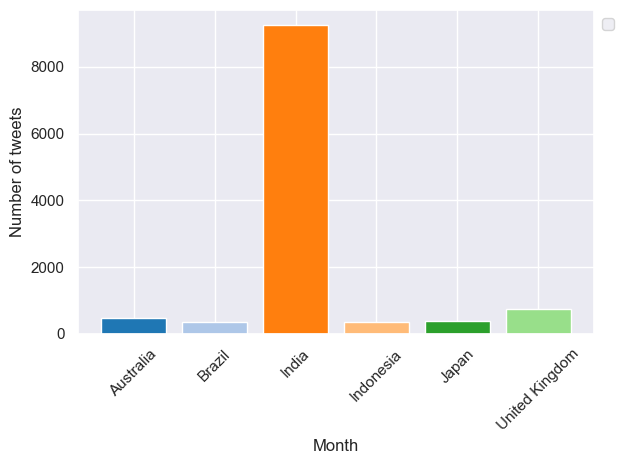

In [18]:
country_hate=data.groupby('Country').agg({'hate':'count'})
import seaborn as sns# Total tweets
import matplotlib.pyplot as plt
plt.bar(country_hate.index,country_hate['hate'],color=plt.cm.tab20.colors)
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\2091435805.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:104: SettingWithCopyWarning: 
A value is trying to be set on a co

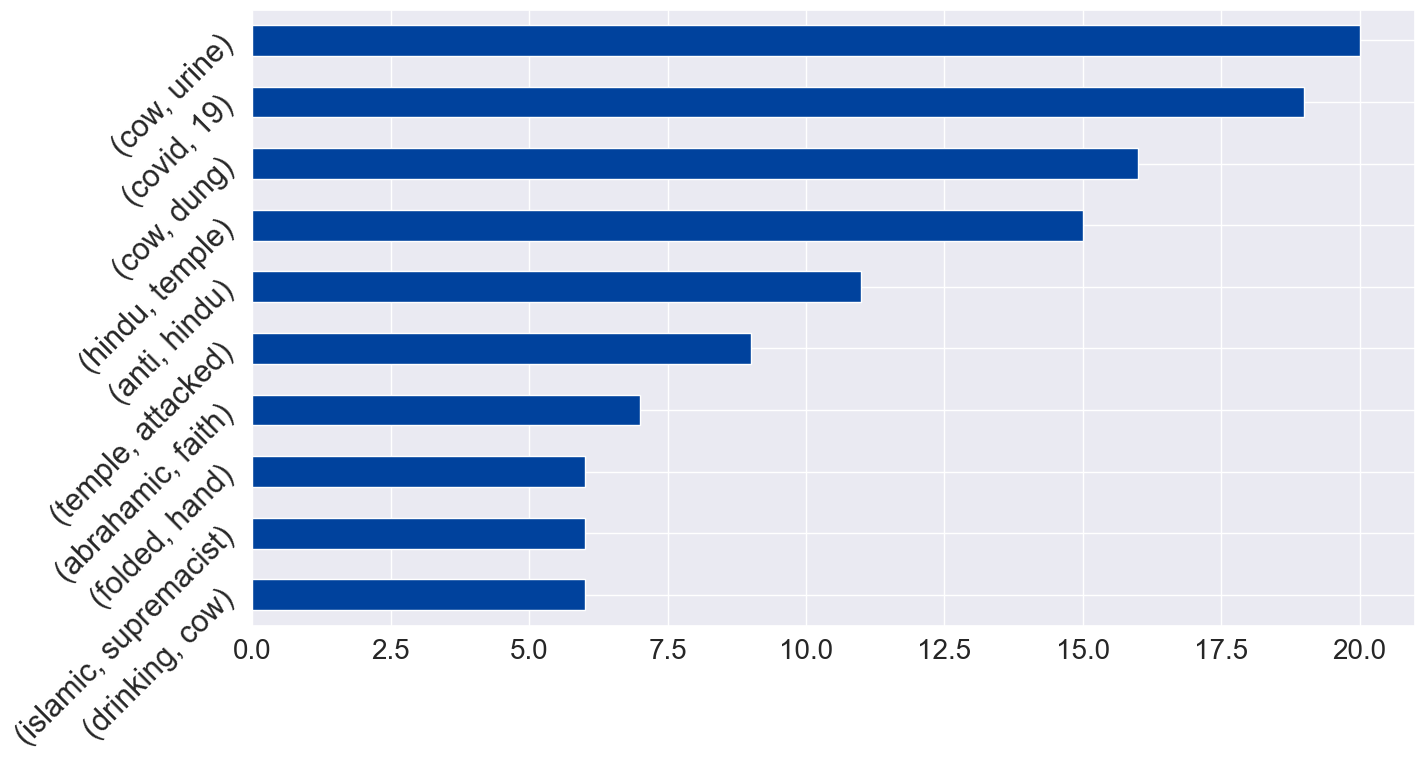

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


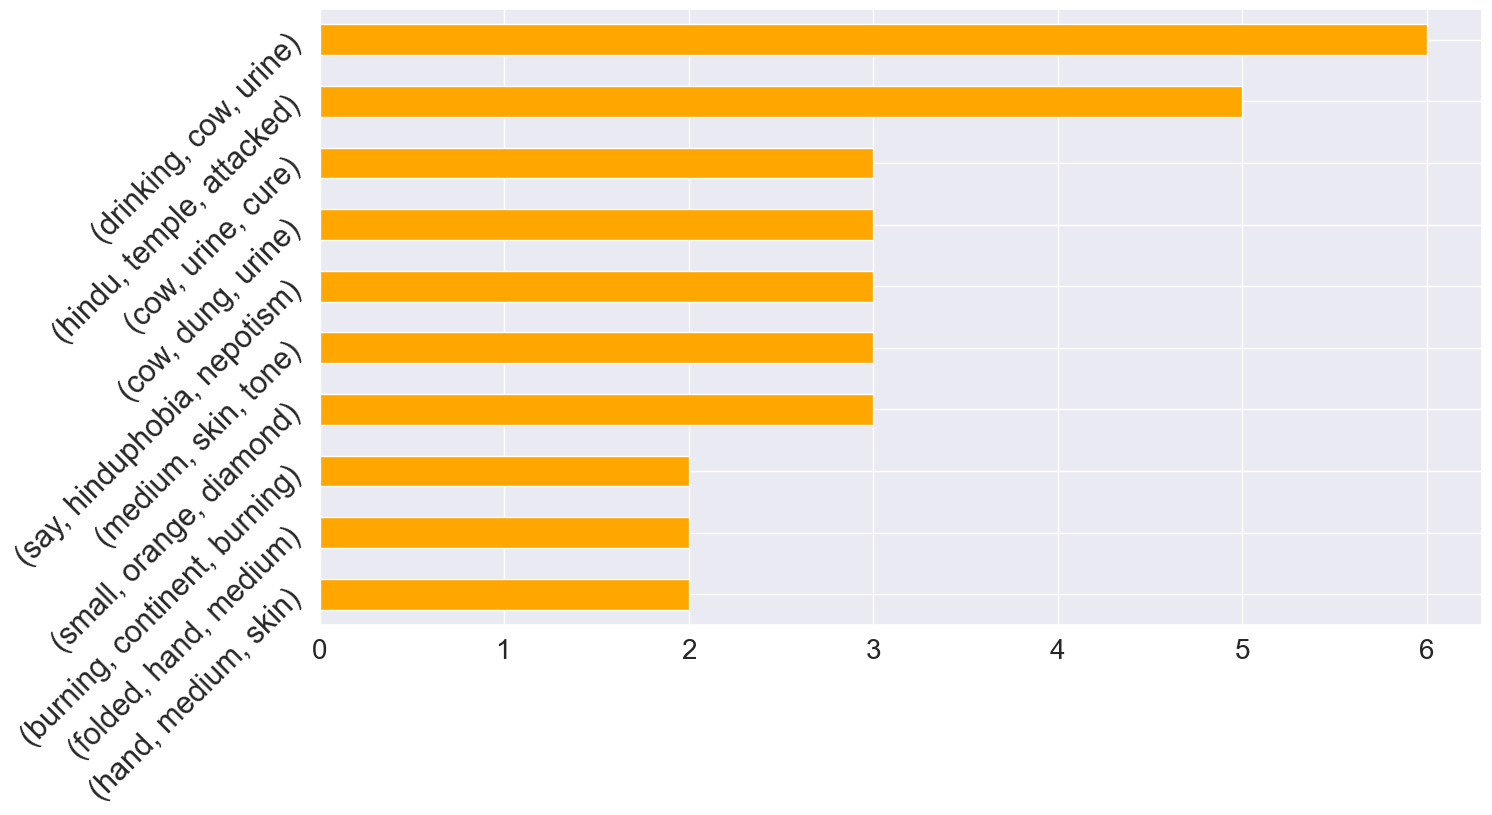

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

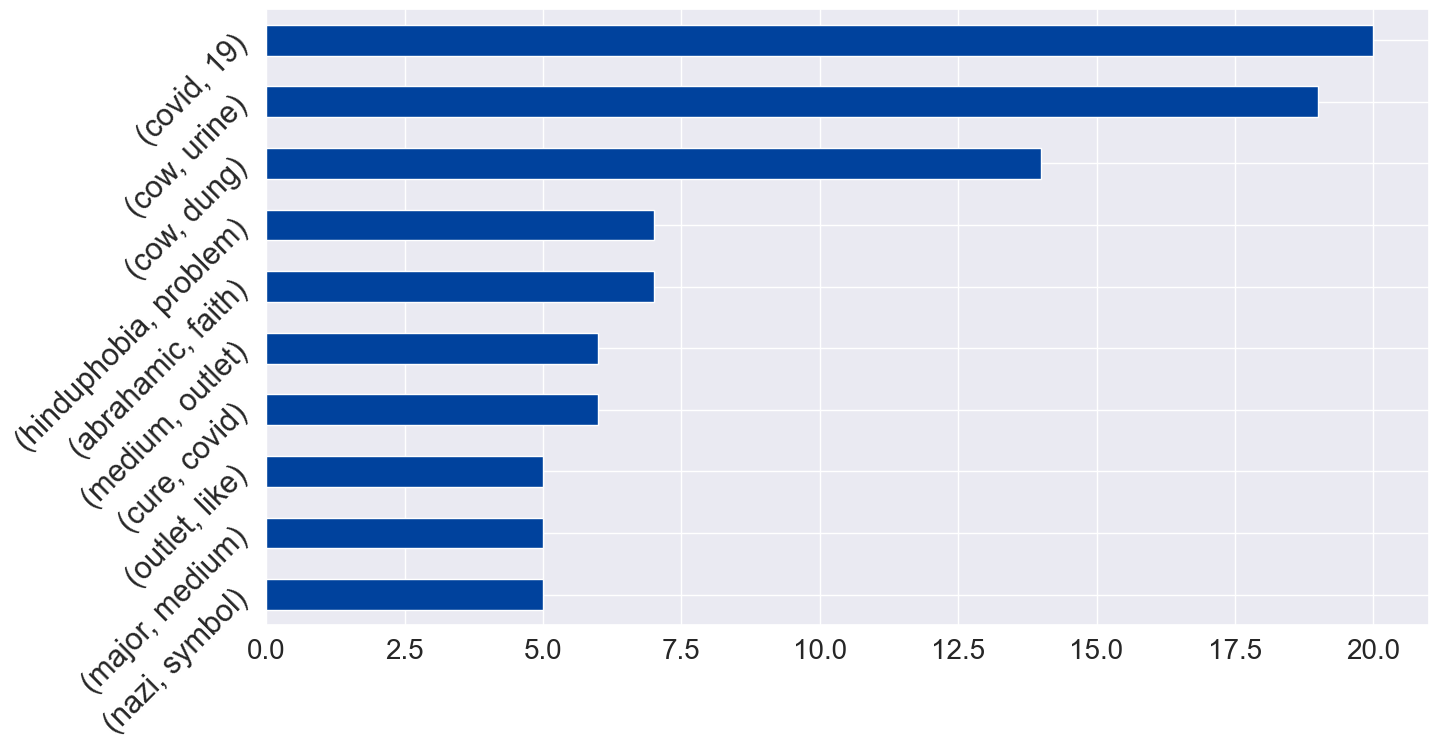

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


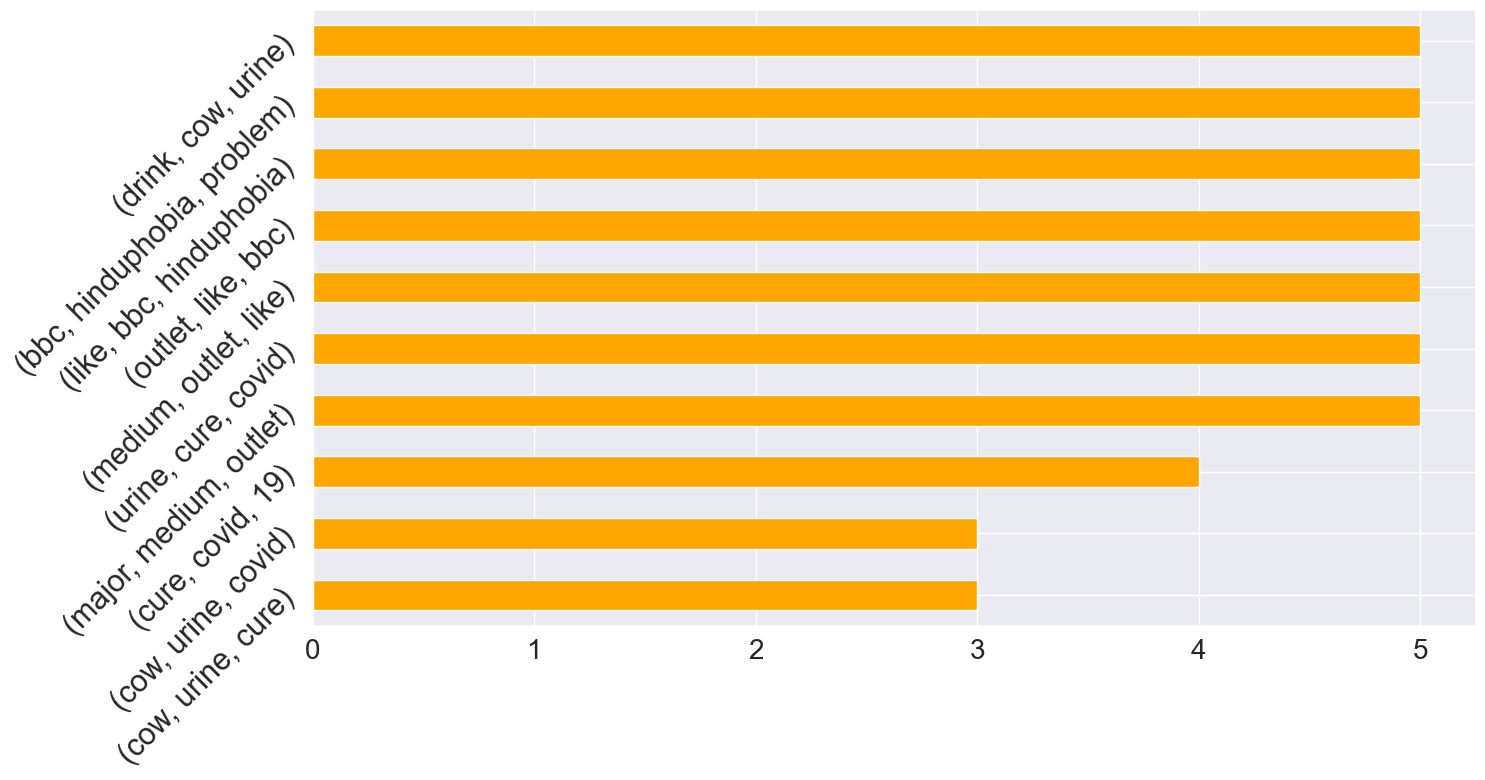

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

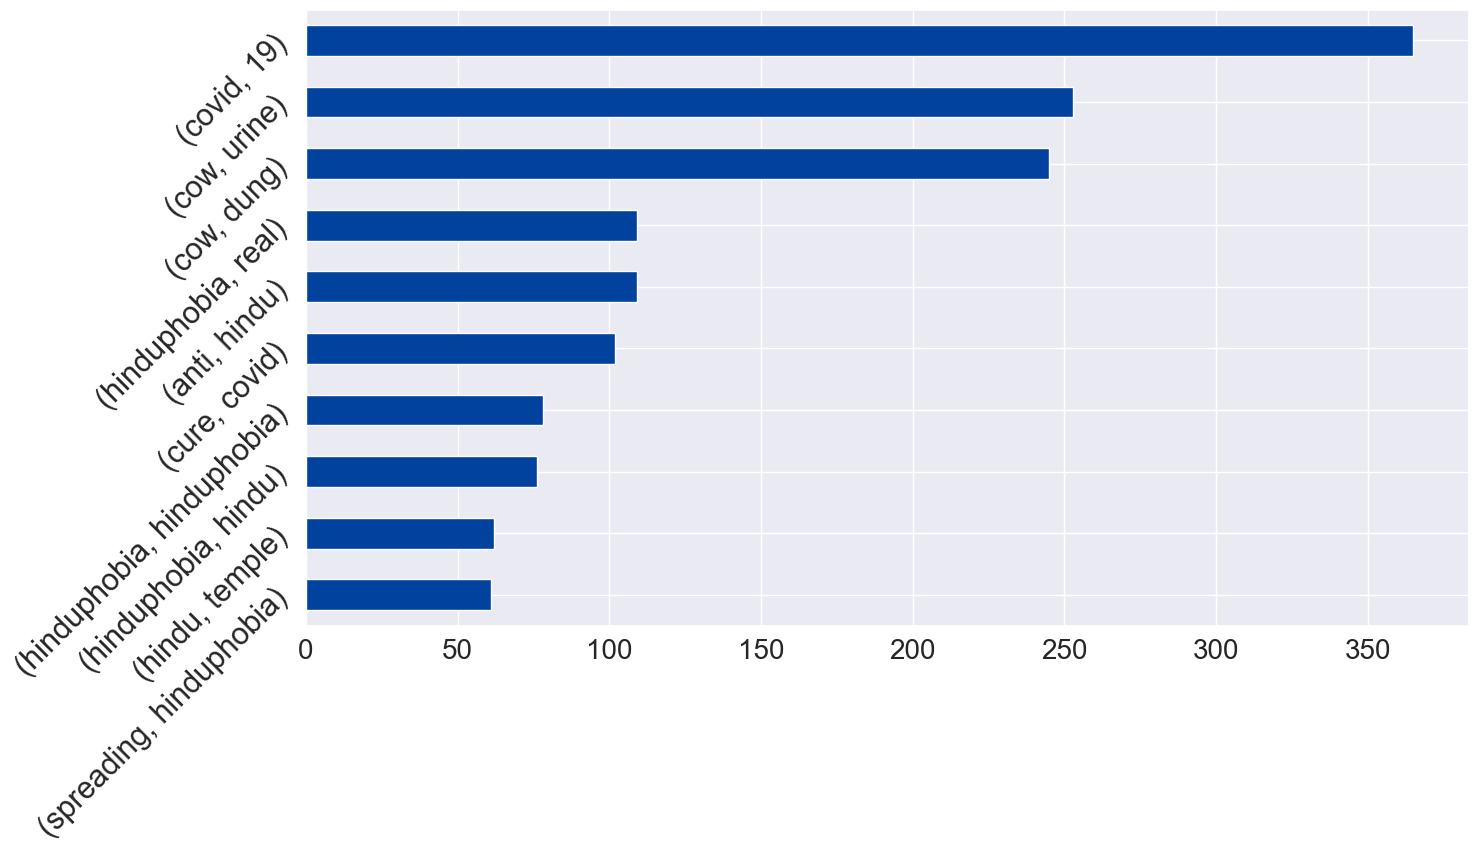

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


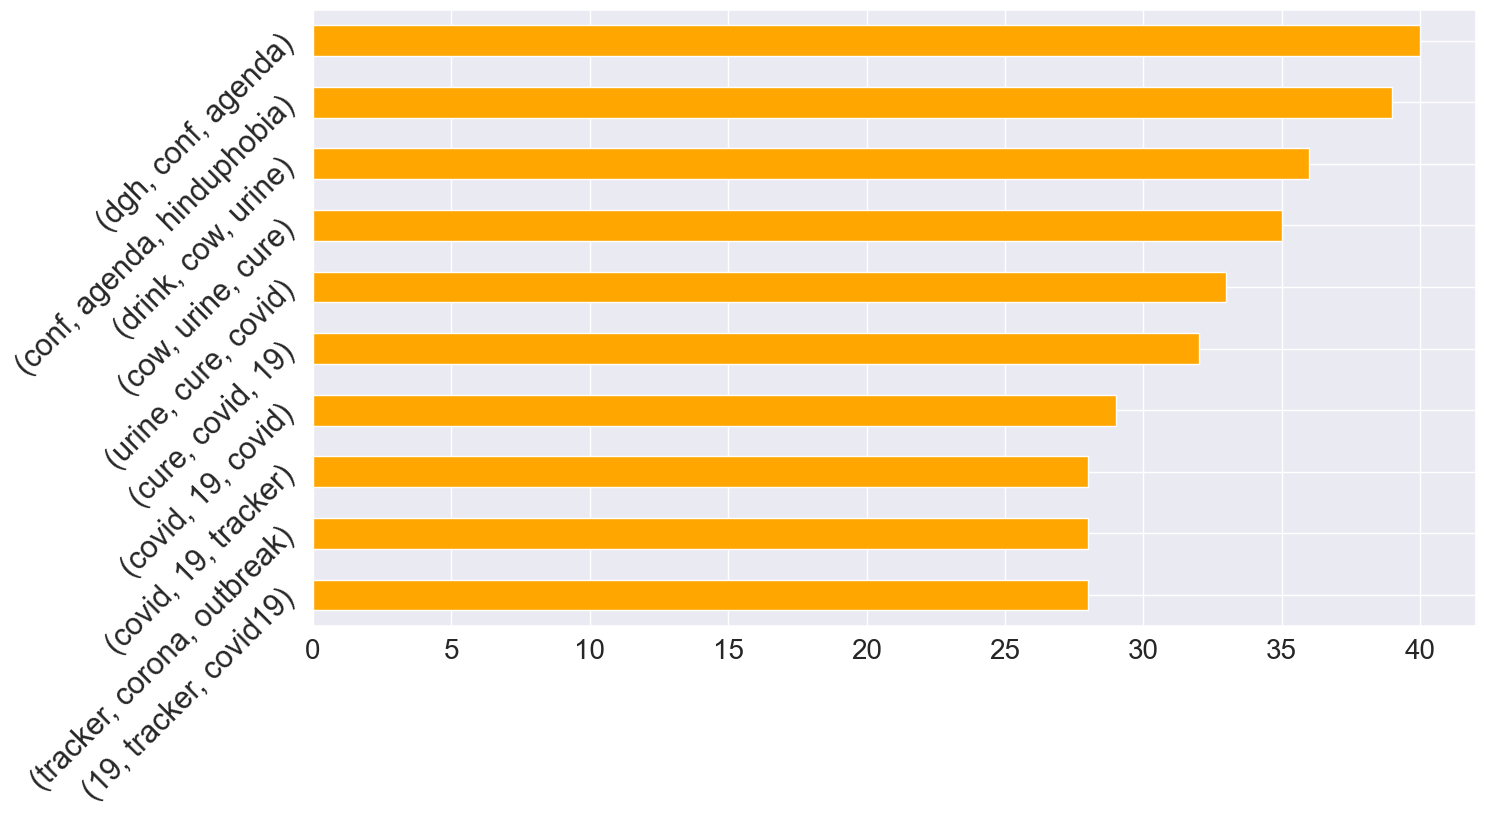

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

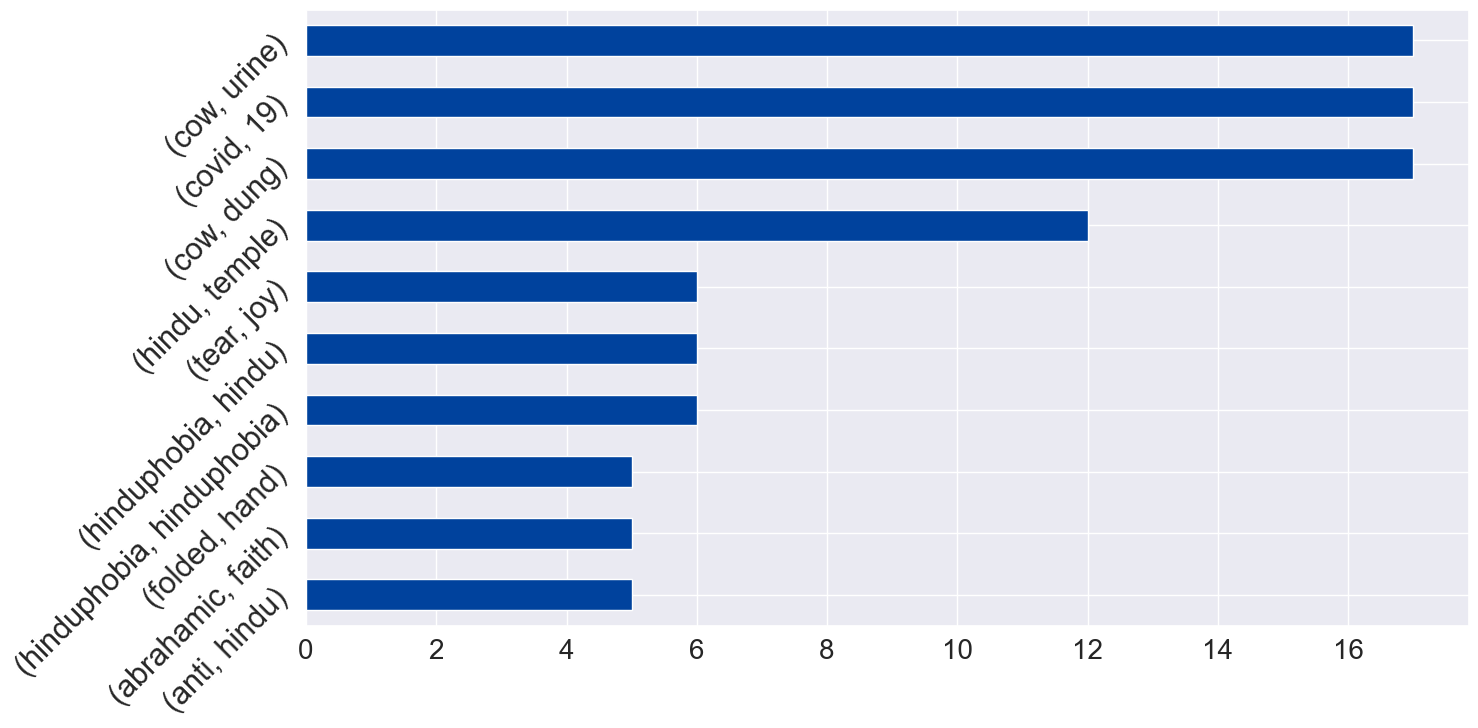

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


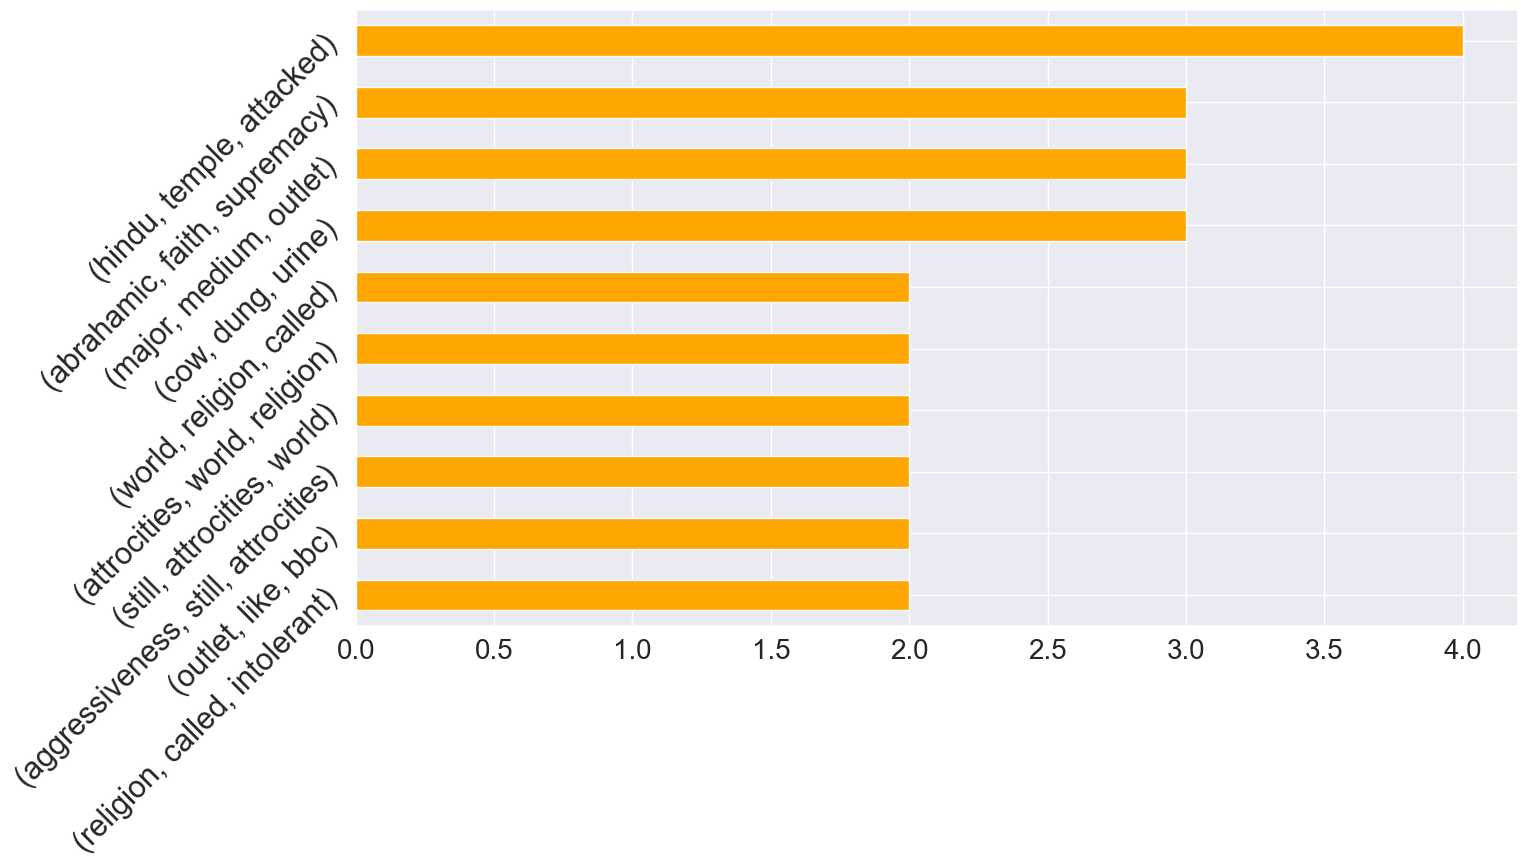

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

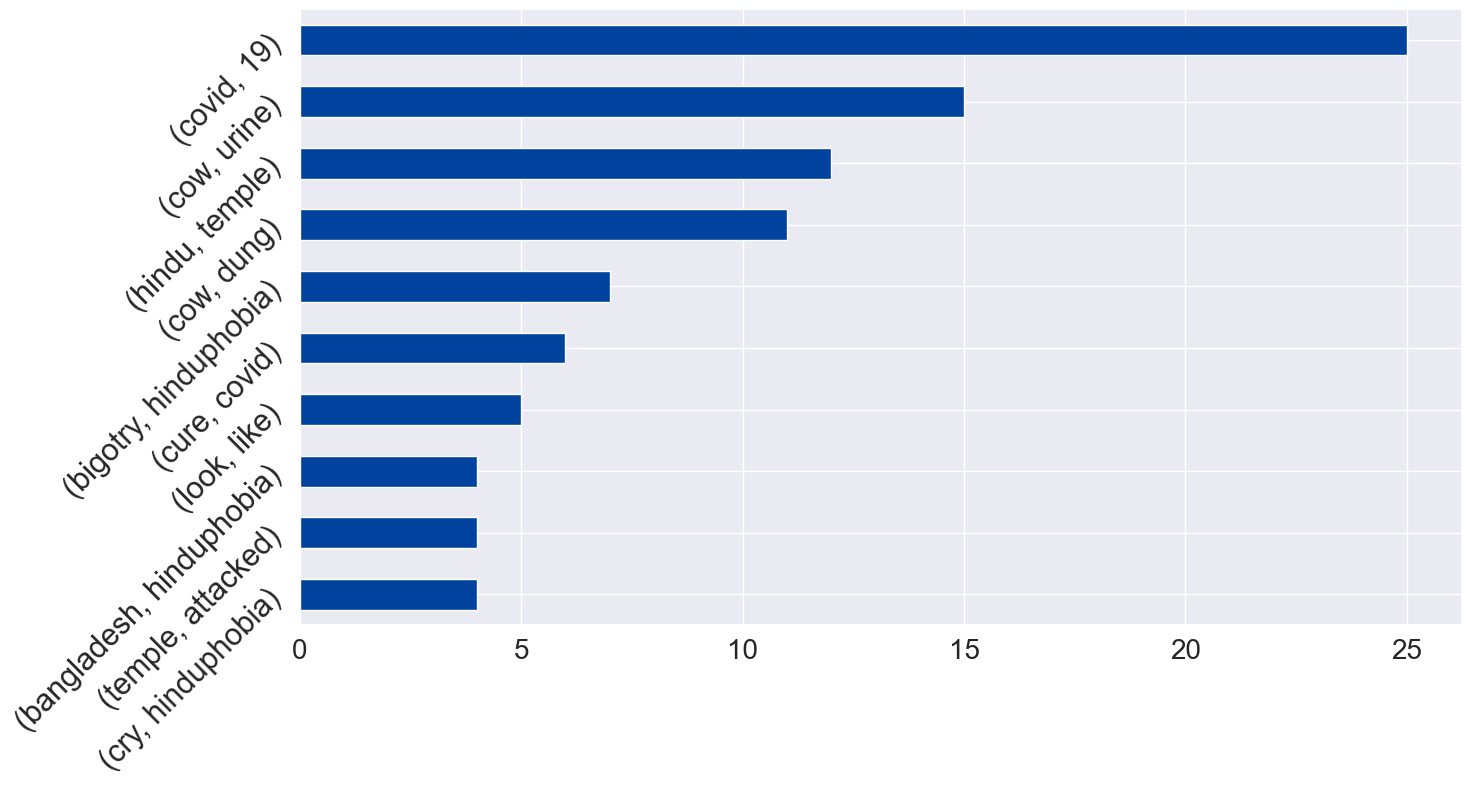

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


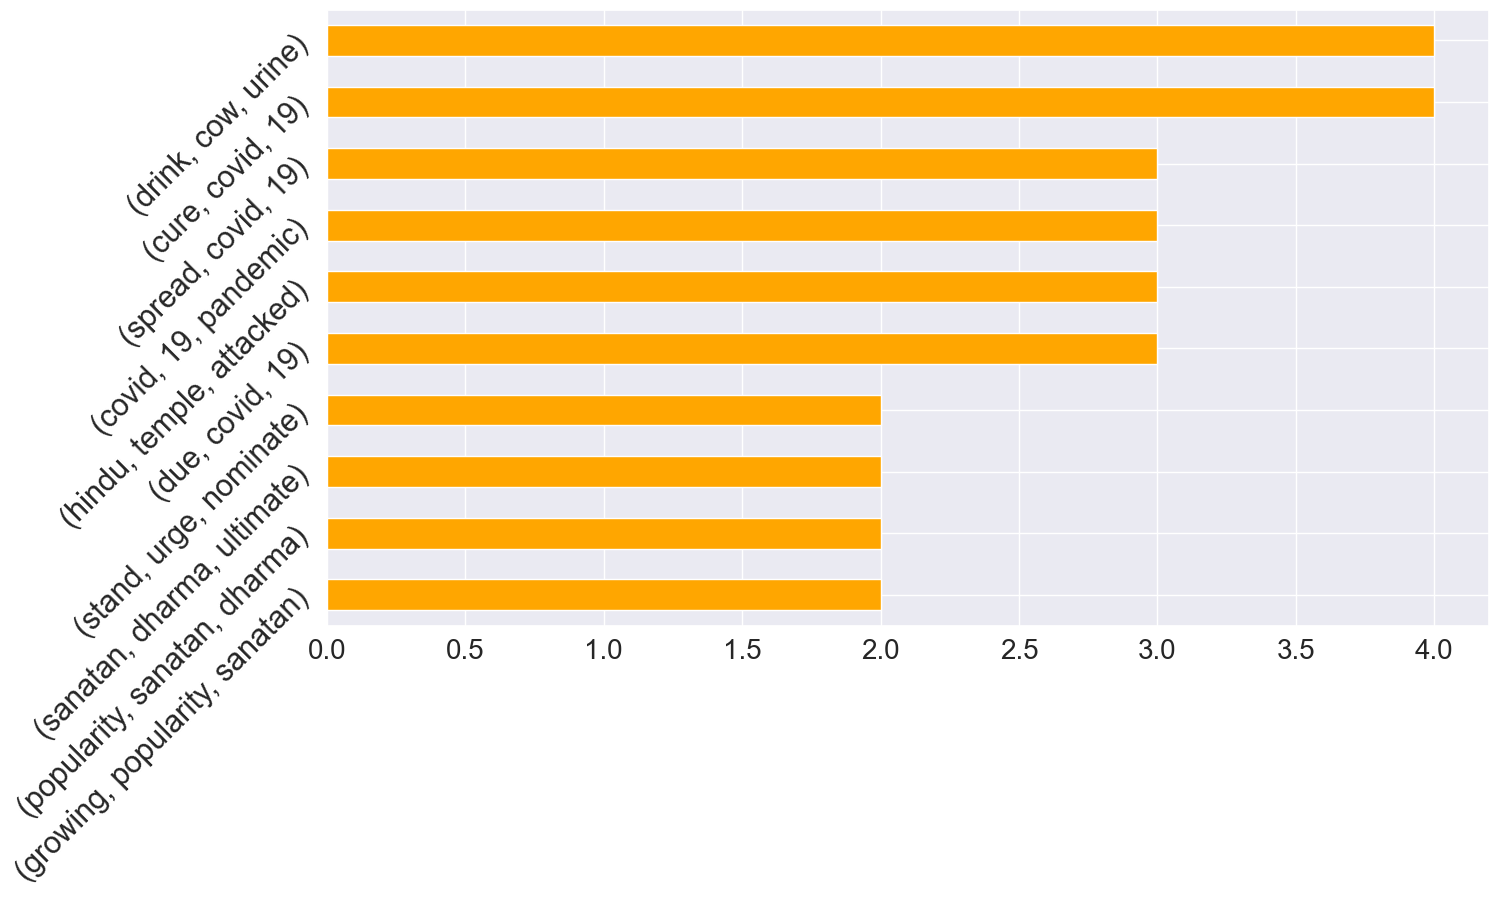

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

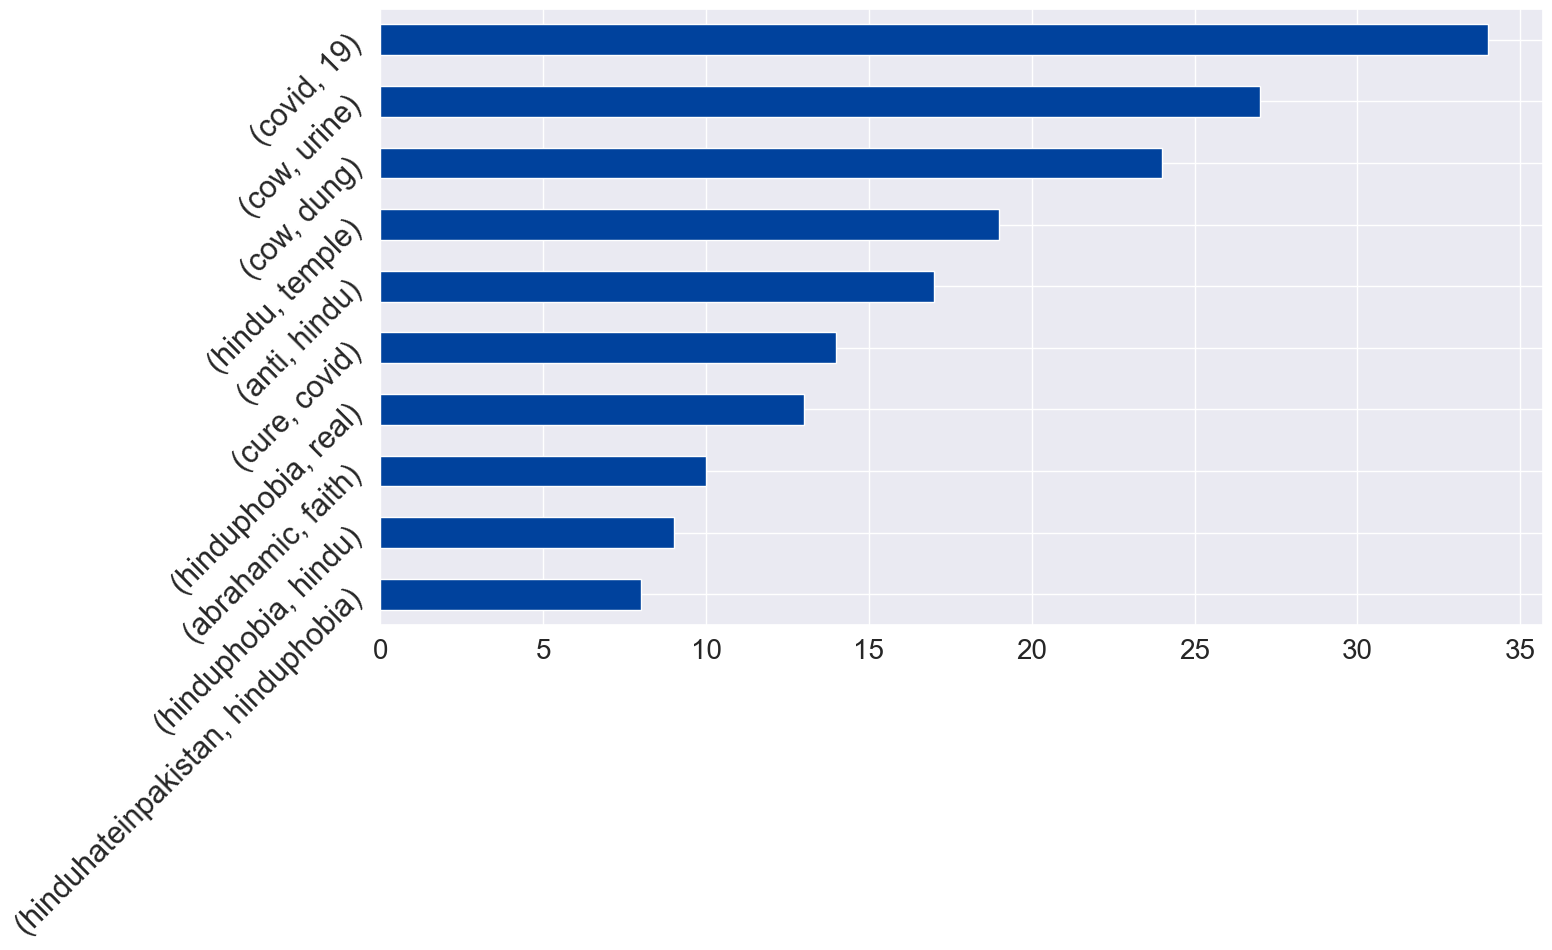

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\3323590914.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


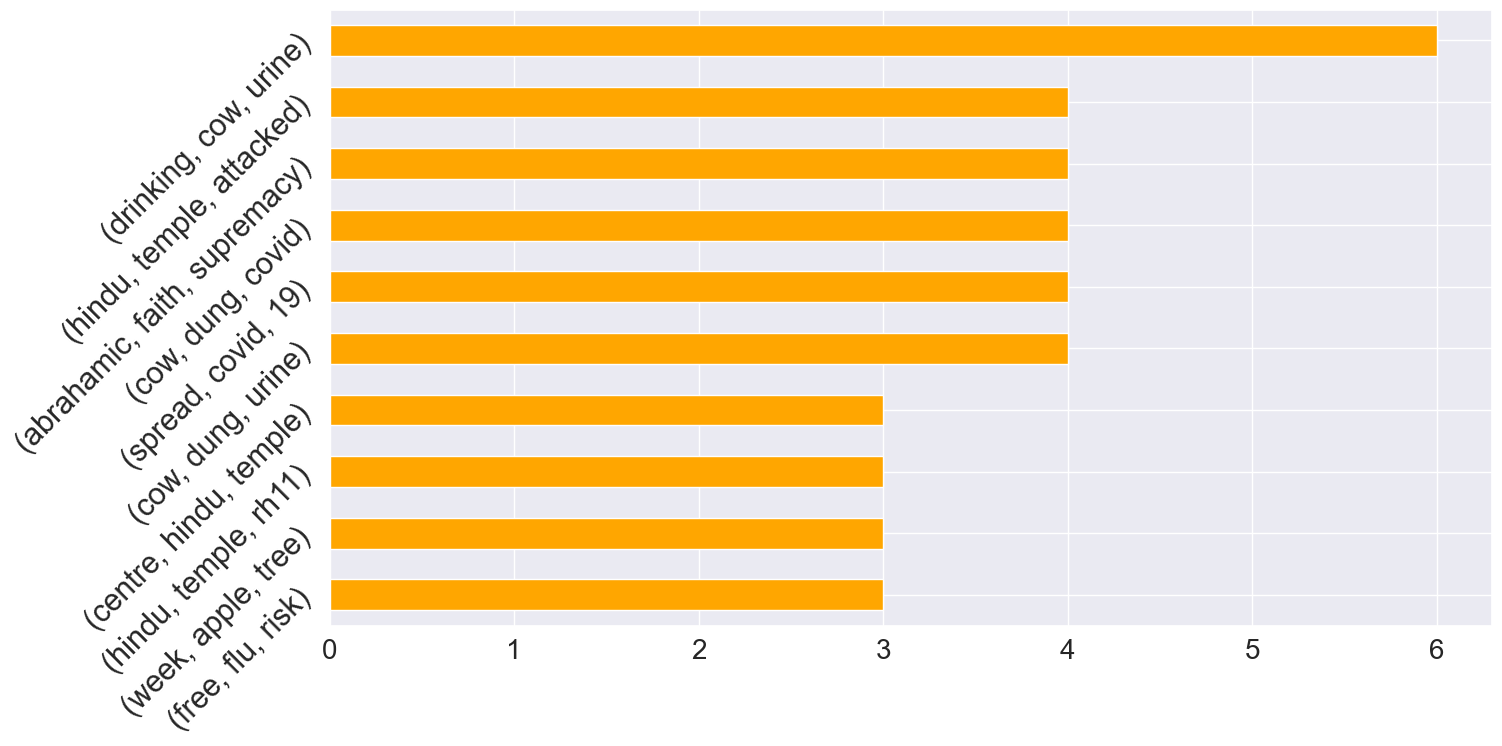

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
nonsense_words = {'cbc', 'nyt', 'web', '2', 'private', 'syndication', 'cnn', 'gt', 'dismantlinghinduphobia', 'wapo', 'amp', 'torstar','face', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 'vilify', 'rh11 0af','backhand','index','pointing'}

# Define the cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Use a set for faster lookup

    # Normalize and encode the text
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove Twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords and nonsense words, then lemmatize
    words = text.split()
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stop_words and word not in nonsense_words]

    return cleaned_words

# Define target countries
target_countries = ['Australia', 'Brazil', 'India', 'Indonesia', 'Japan', 'United Kingdom']

# Function to generate bigrams and trigrams
def generate_ngrams(words, n):
    return list(ngrams(words, n))
def extract_specific_quarter_data(df, start_date, end_date):
    """
    Extract data from the DataFrame for the specified date range.

    Args:
    - df: DataFrame to extract data from
    - start_date: Start date of the date range (format: 'YYYY-MM-DD')
    - end_date: End date of the date range (format: 'YYYY-MM-DD')

    Returns:
    - DataFrame containing data for the specified date range
    """
    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Extract data for the specified date range
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

def plot_ngrams_for_dataset1(data, dataset_name, start_date, end_date, n=[2], top=15, colors=('#00429d', '#ffa600')):
# Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)
    col='text' if 'text' in data.columns else 'tweet'
    # Clean the data
    quarterly_data[col] = quarterly_data[col].astype(str)
    cleaned_data = clean(''.join(quarterly_data[col]))

    for i, n_val in enumerate(n):
        plt.figure(figsize=(15, 8))  
        ax = plt.subplot()  

        
        ngrams_series = pd.Series(ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=22, rotation=45)

        plt.show()  
        # Save the plot
        plt.savefig(f'{dataset_name}_ngrams_{n_val}grams_{start_date}_to_{end_date}.png')
        plt.close()
# Loop through each target country to calculate and plot bigrams and trigrams
for country in target_countries:
    # Filter texts for the current country
    df = data_bi_ti[data_bi_ti['Country'] == country]  # Replace 'text' with actual column name
    start_date = '2020-07-01'
    end_date = '2022-04-30'
    date_obj = pd.to_datetime(df['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y")
    # Format it into the required format
    df['date'] = date_obj.dt.strftime("%Y-%m-%d")
    df['date']=pd.to_datetime(df['date'])
    plot_ngrams_for_dataset1(df, country, start_date, end_date, n=[2], top=10, colors=('#00429d', '#ffa600'))
    plot_ngrams_for_dataset1(df, country, start_date, end_date, n=[3], top=10, colors=('#ffa600', '#ffa600'))

   

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\2671698111.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


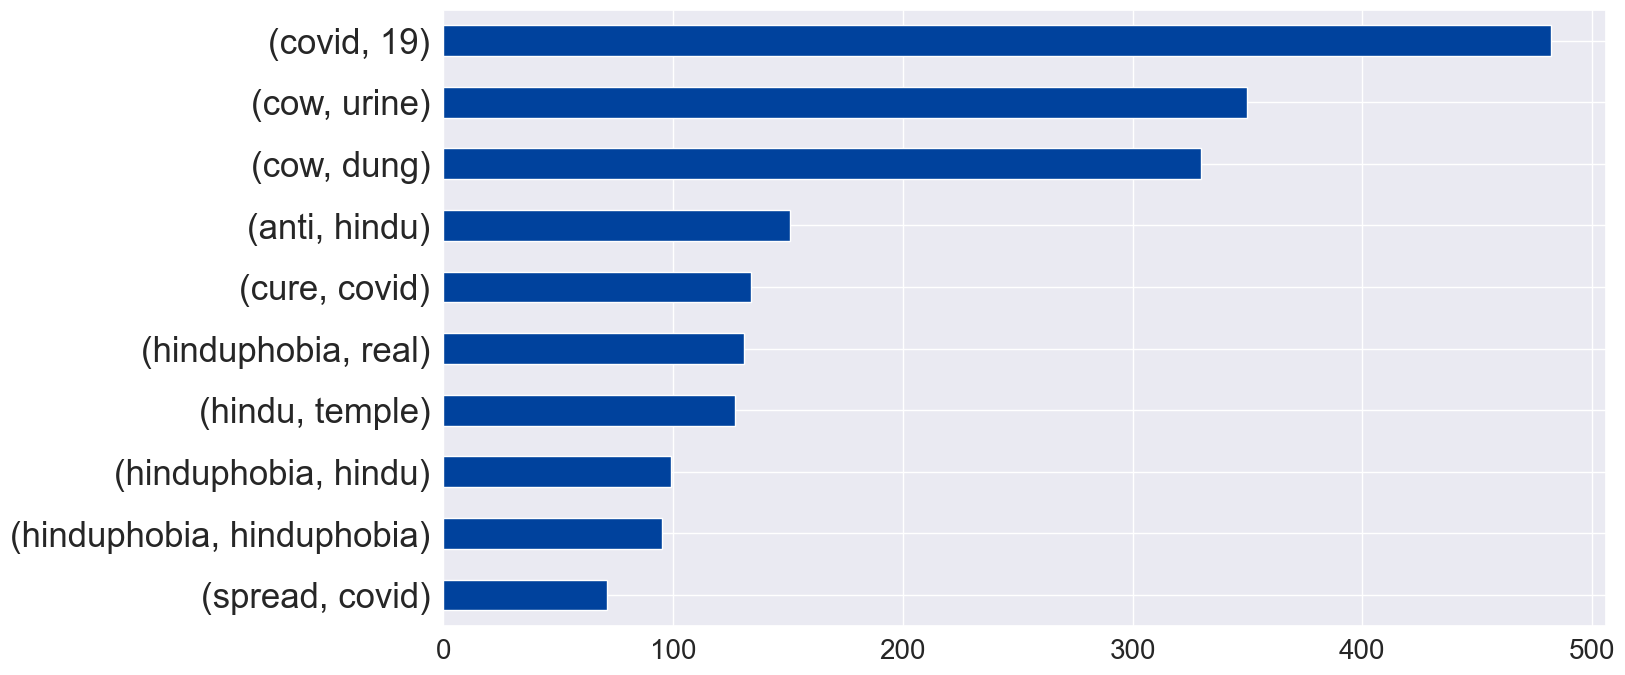

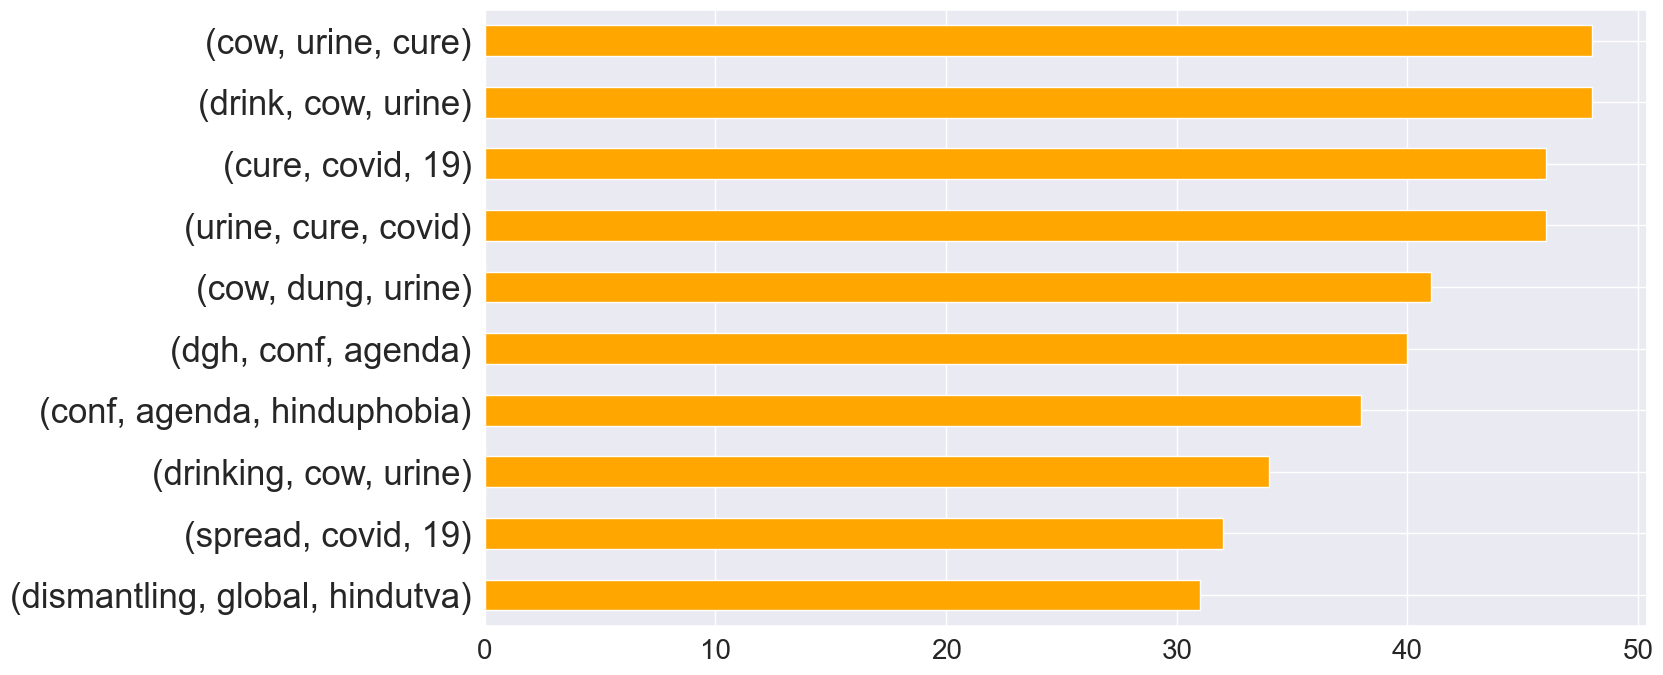

In [21]:
# Combine data for all countries and generate n-grams
def plot_ngrams_for_all_countries(data, dataset_name, start_date, end_date, n=[2], top=15, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)
    col = 'text' if 'text' in data.columns else 'tweet'

    # Clean the data
    quarterly_data[col] = quarterly_data[col].astype(str)
    cleaned_data = clean(''.join(quarterly_data[col]))

    for i, n_val in enumerate(n):
        plt.figure(figsize=(15, 8))
        ax = plt.subplot()

        # Generate n-grams and count frequencies
        ngrams_series = pd.Series(ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=25)

        # # Add title and labels
        # ax.set_title(f"Top {top} {n_val}-grams for All Countries ({start_date} to {end_date})", fontsize=22)
        # ax.set_xlabel('Frequency', fontsize=20)
        # ax.set_ylabel('N-grams', fontsize=20)

        plt.show()
        # Save the plot
        plt.savefig(f'{dataset_name}_ngrams_{n_val}grams_{start_date}_to_{end_date}.png')
        plt.close()


# Combine data for all target countries
all_data = data_bi_ti[data_bi_ti['Country'].isin(target_countries)]

# Convert the date column to datetime format
all_data['date'] = pd.to_datetime(all_data['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y").dt.strftime("%Y-%m-%d")
all_data['date'] = pd.to_datetime(all_data['date'])

# Define the date range
start_date = '2020-07-01'
end_date = '2022-04-30'

# Plot n-grams for all countries combined
plot_ngrams_for_all_countries(all_data, 'All_Countries', start_date, end_date, n=[2, 3], top=10, colors=('#00429d', '#ffa600'))


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
nonsense_words = {'cbc', 'nyt','2', 'cnn', 'gt', 'dismantlinghinduphobia', 'wapo', 'amp', 'torstar','face', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 'vilify', 'rh11 0af','backhand','index','pointing'}

# Define the cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Use a set for faster lookup

    # Normalize and encode the text
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove Twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords and nonsense words, then lemmatize
    words = text.split()
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stop_words and word not in nonsense_words]

    return cleaned_words

# Define target countries
target_countries = ['Australia', 'Brazil', 'India', 'Indonesia', 'Japan', 'United Kingdom']

# Function to generate bigrams and trigrams
def generate_ngrams(words, n):
    return list(ngrams(words, n))

def extract_specific_quarter_data(df, start_date, end_date):
    """
    Extract data from the DataFrame for the specified date range.

    Args:
    - df: DataFrame to extract data from
    - start_date: Start date of the date range (format: 'YYYY-MM-DD')
    - end_date: End date of the date range (format: 'YYYY-MM-DD')

    Returns:
    - DataFrame containing data for the specified date range
    """
    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Extract data for the specified date range
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

def plot_combined_ngrams(data, dataset_name, start_date, end_date, n=[2, 3], top=15, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)
    col = 'text' if 'text' in data.columns else 'tweet'
    
    # Clean the data
    quarterly_data[col] = quarterly_data[col].astype(str)
    cleaned_data = clean(' '.join(quarterly_data[col]))  # Combine all tweets into one string and clean

    # Initialize figure with 2 subplots (1 row, 2 columns)
    fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

    # Plot bigrams in the first subplot
    bigrams = pd.Series(ngrams(cleaned_data, 2)).value_counts()[:top]
    bigrams.sort_values().plot.barh(color=colors[0], width=0.5, ax=axes[0])
    # axes[0].set_title('Bigrams', fontsize=22)
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=)

    # Plot trigrams in the second subplot
    trigrams = pd.Series(ngrams(cleaned_data, 3)).value_counts()[:top]
    trigrams.sort_values().plot.barh(color=colors[1], width=0.5, ax=axes[1])
    # axes[1].set_title('Trigrams', fontsize=22)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=25)

    # Adjust layout to remove gaps between subplots
    plt.subplots_adjust(hspace=0)  # Set vertical spacing to 0 to remove the gap

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Save the plot
    plt.savefig(f'{dataset_name}_combined_ngrams_{start_date}_to_{end_date}.png')
    plt.close()

# Loop through each target country to calculate and plot bigrams and trigrams together
for country in target_countries:
    # Filter texts for the current country
    df = data_bi_ti[data_bi_ti['Country'] == country]  # Replace 'text' with actual column name
    start_date = '2020-07-01'
    end_date = '2022-04-30'
    
    # Convert 'createdAt' to datetime format
    date_obj = pd.to_datetime(df['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y")
    df['date'] = date_obj.dt.strftime("%Y-%m-%d")
    df['date'] = pd.to_datetime(df['date'])
    
    # Generate and plot bigrams and trigrams together in one figure
    plot_combined_ngrams(df, country, start_date, end_date, n=[2, 3], top=10, colors=('#00429d', '#ffa600'))


SyntaxError: invalid syntax (3060366200.py, line 90)

In [23]:
df=data_bi_ti[data_bi_ti['Country'] == country]
start_date = '2020-07-01'
end_date = '2022-04-30'
date_obj = pd.to_datetime(df['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y")
# Format it into the required format
df['date'] = date_obj.dt.strftime("%Y-%m-%d")
df['date']=pd.to_datetime(df['date'])# extract_specific_quarter_data(df,start_date,end_date)
extract_specific_quarter_data(df,start_date,end_date)

C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\2861980706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_5156\2861980706.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])# extract_specific_quarter_data(df,start_date,end_date)


Unnamed: 0.1          author/location                       createdAt  \
187             187  England, United Kingdom  Wed Apr 27 19:09:41 +0000 2022   
232             232                   Canada  Thu Apr 28 06:02:36 +0000 2022   
655             655            United States  Mon Mar 21 21:21:33 +0000 2022   
694             694           United Kingdom  Sat Feb 12 02:24:28 +0000 2022   
699             699   London, United Kingdom  Thu Feb 17 20:00:00 +0000 2022   
...             ...                      ...                             ...   
11523         11523                  Nigeria  Thu Jan 13 16:32:45 +0000 2022   
11526         11526            United States  Thu Jan 13 16:11:54 +0000 2022   
11527         11527           Regina, Canada  Mon Jan 17 12:44:22 +0000 2022   
11536         11536   Tel Aviv, Israel ישראל  Mon Jan 31 01:29:20 +0000 2022   
11563         11563           United Kingdom  Wed Jan 26 21:05:01 +0000 2022   

                        id                                               text  \
187    1519393365330124801    chal be chaman chumtiye  you don’t represent...   
232    1519557674979008512  when they say  hindu is good but  hindutva  be...   
655    1506018196641439756   antisemitism is a huge problem across univers...   
694    1232434056106635264   this guy pretends to know what is going on in...   
699    1494401265056595975  for   amp   racism when it comes to  hinduhatr...   
...                    ...                                                ...   
11523  1481665533447659532  asides cow urine  according to india’s modi   ...   
11526  1481660284976648197     what is wrong with you  where did you learn...   
11527  1483057609452273667    terrorism business is flourishing in  pakist...   
11536  1487961162675195906      what about hinduphobia  and christianphobias    
11563  1486445093271789568  good question  why don’t   amp   care about hi...   

              Country Month_Year  hate        Time       date  
187    United Kingdom   Apr-2020     0  2020-04-01 2022-04-27  
232    United Kingdom   Apr-2020     0  2020-04-01 2022-04-28  
655    United Kingdom   Apr-2020     0  2020-04-01 2022-03-21  
694    United Kingdom   Apr-2020     0  2020-04-01 2022-02-12  
699    United Kingdom   Apr-2020     0  2020-04-01 2022-02-17  
...               ...        ...   ...         ...        ...  
11523  United Kingdom   Jan-2022     0  2022-01-01 2022-01-13  
11526  United Kingdom   Jan-2022     0  2022-01-01 2022-01-13  
11527  United Kingdom   Jan-2022     0  2022-01-01 2022-01-17  
11536  United Kingdom   Jan-2022     0  2022-01-01 2022-01-31  
11563  United Kingdom   Jan-2022     0  2022-01-01 2022-01-26  

[451 rows x 10 columns]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


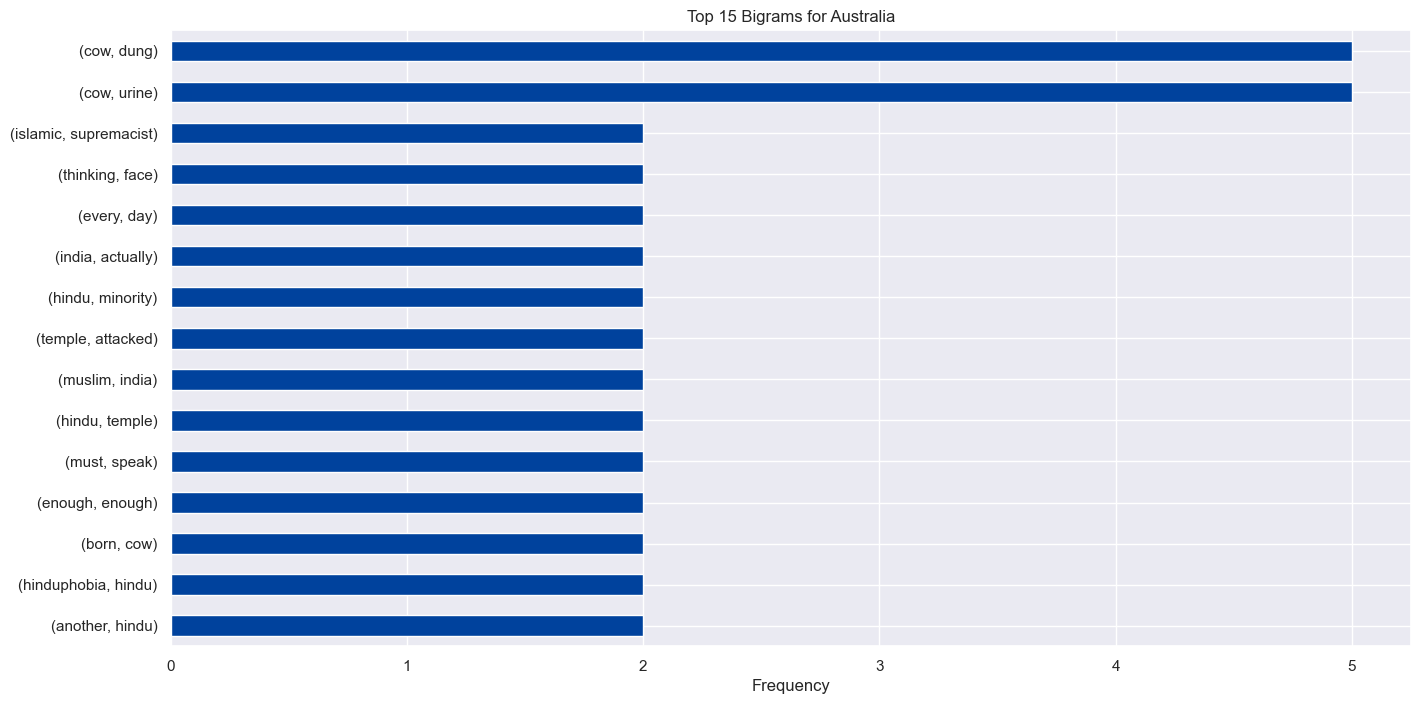

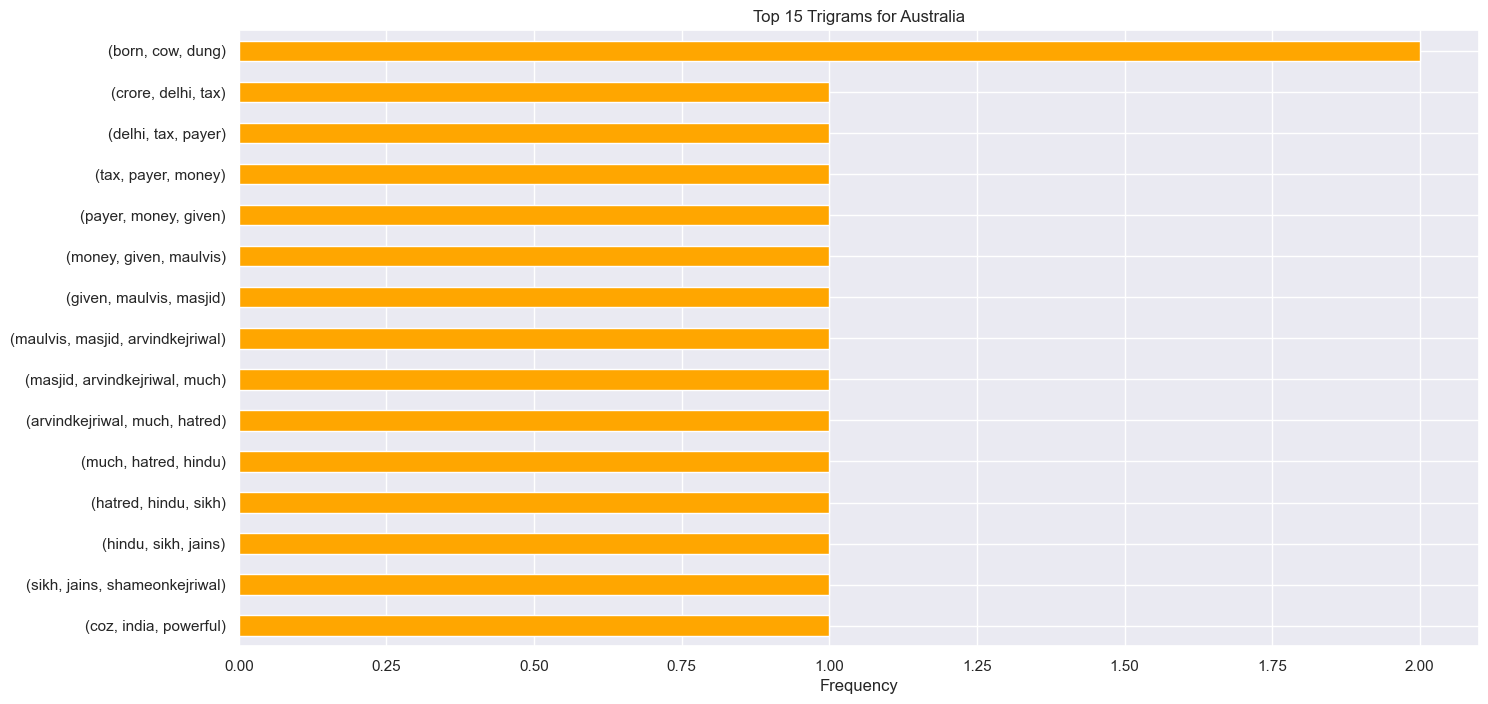

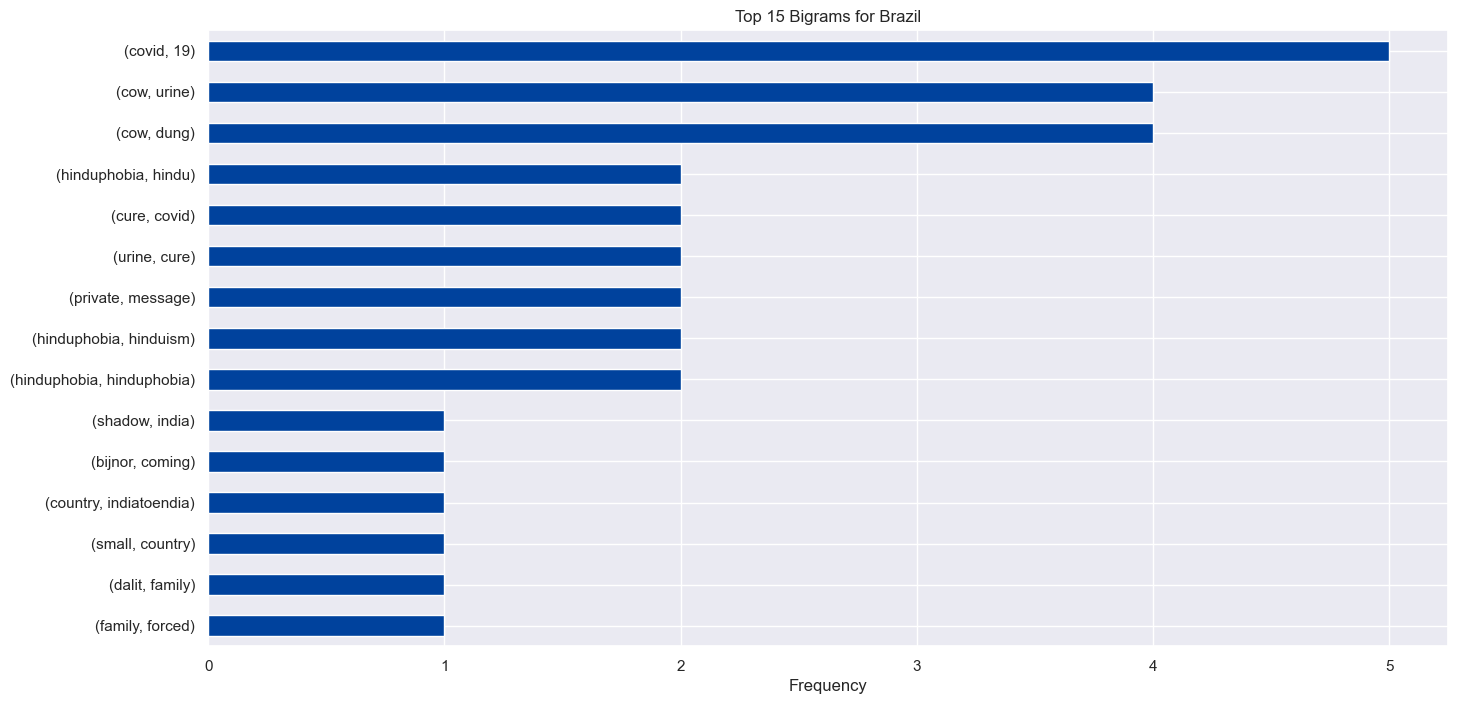

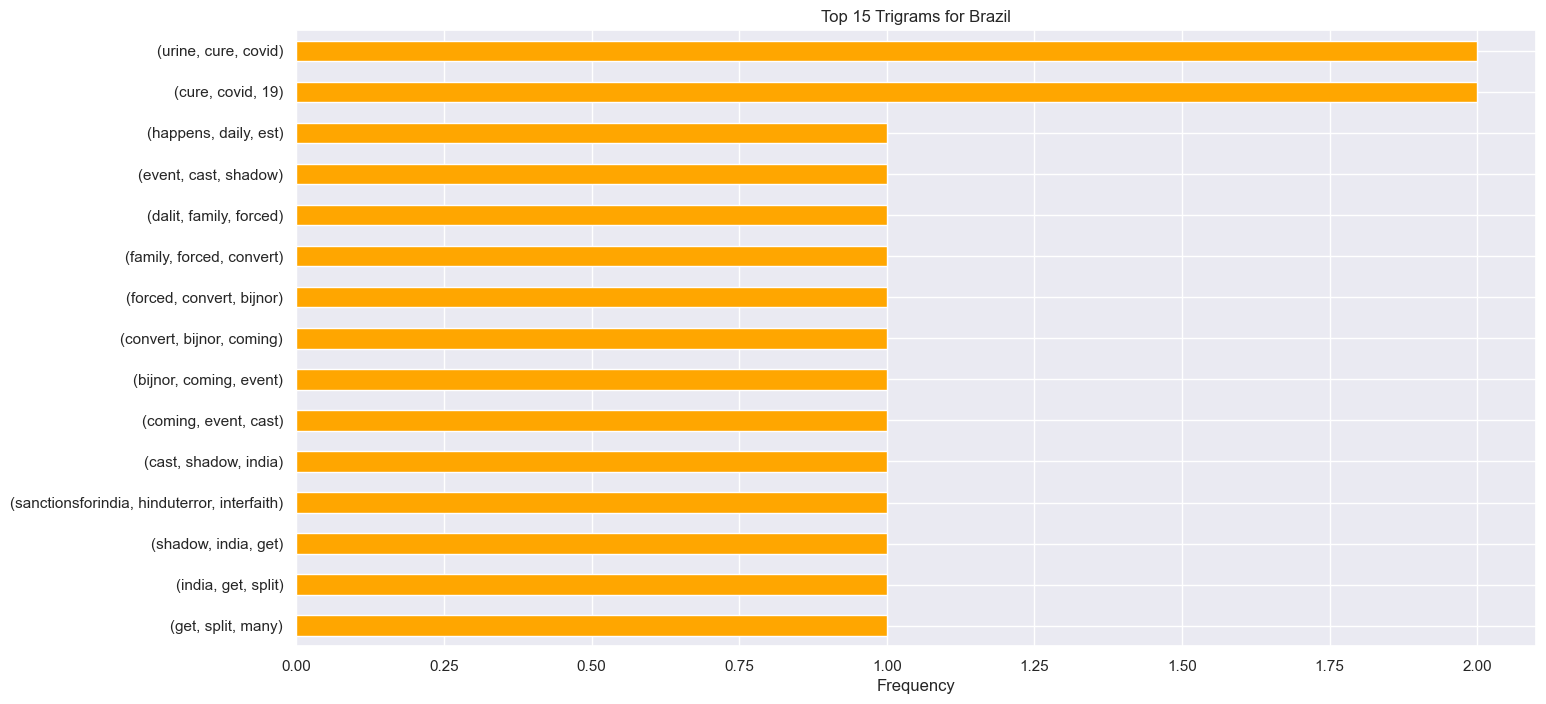

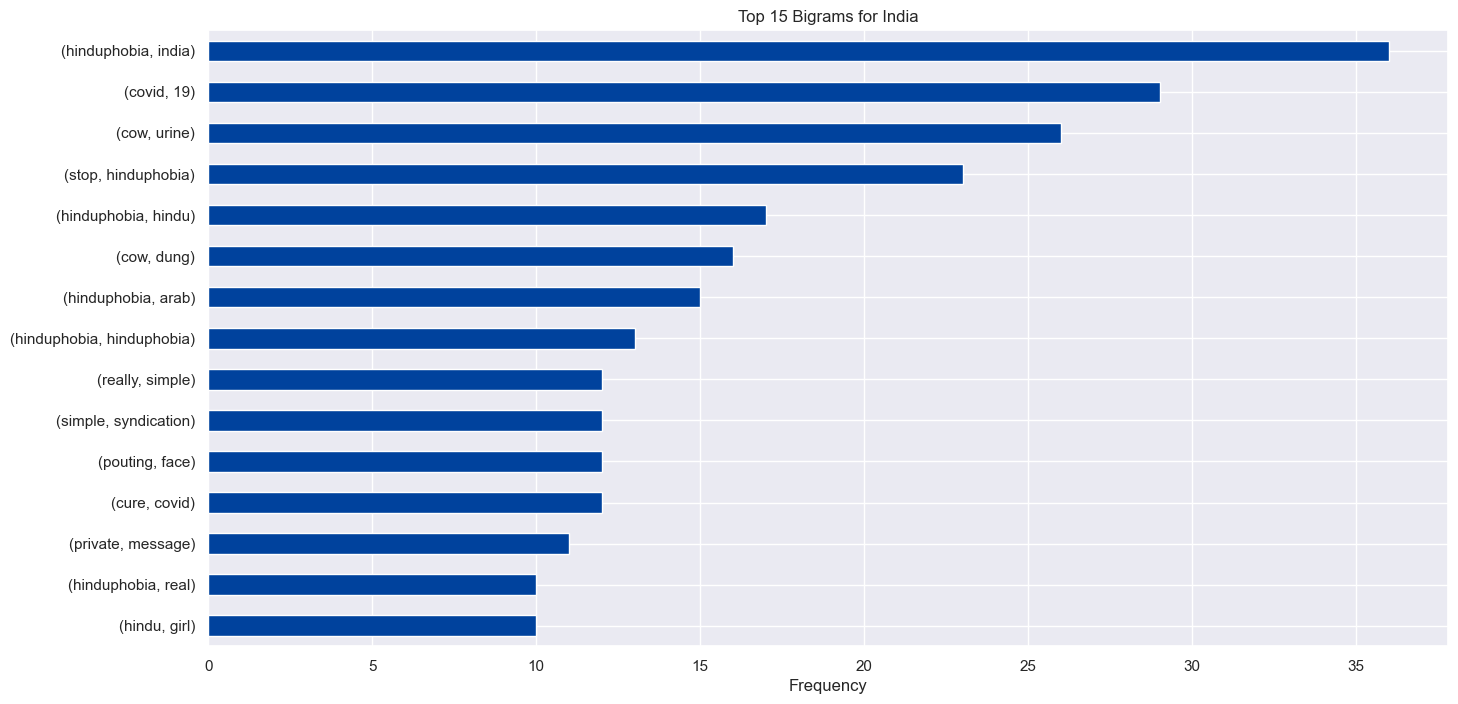

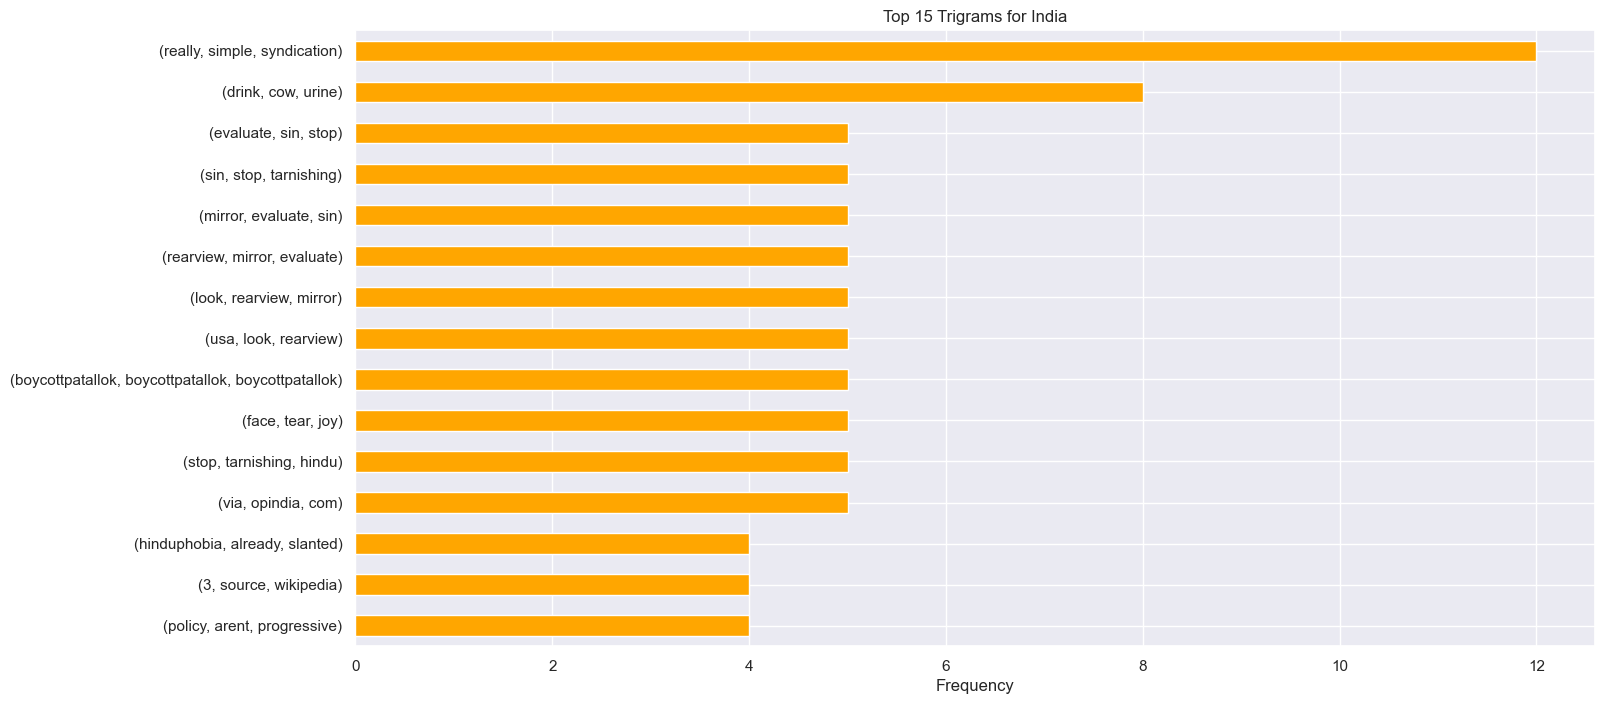

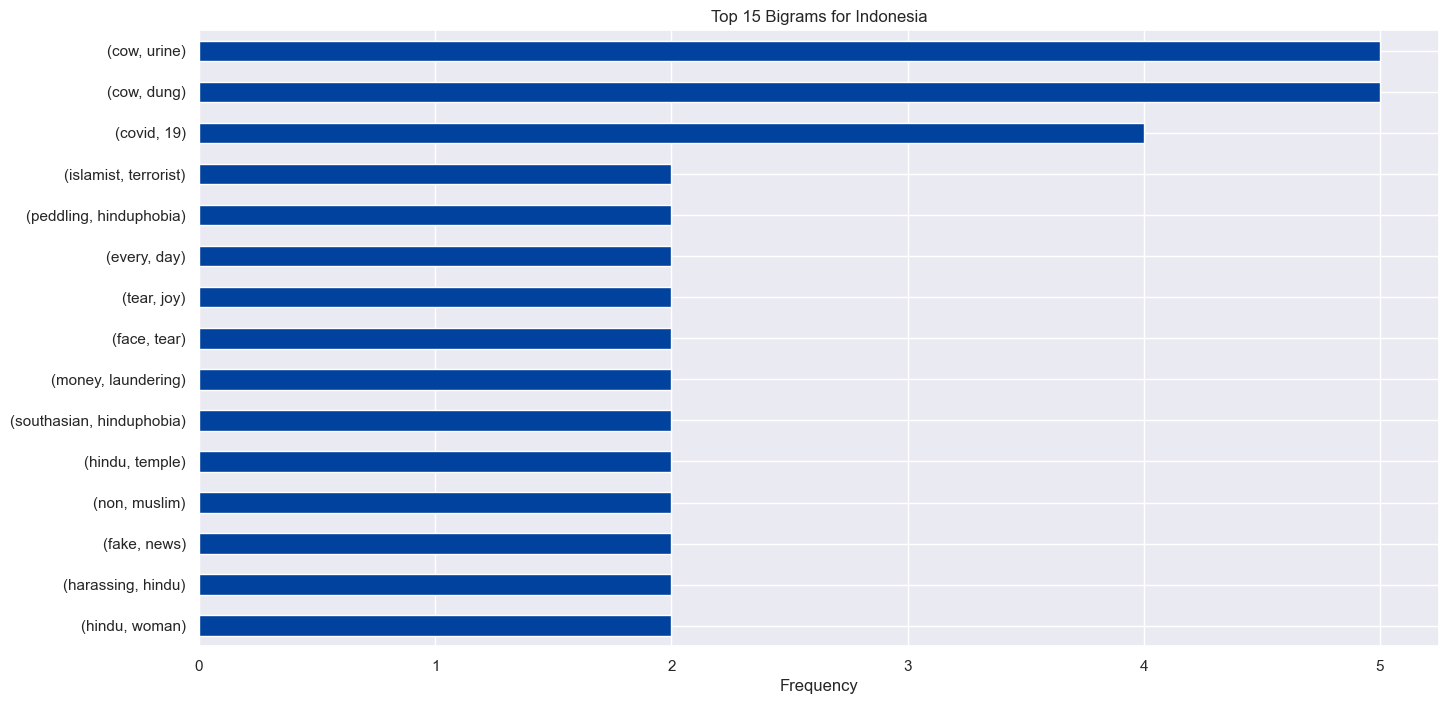

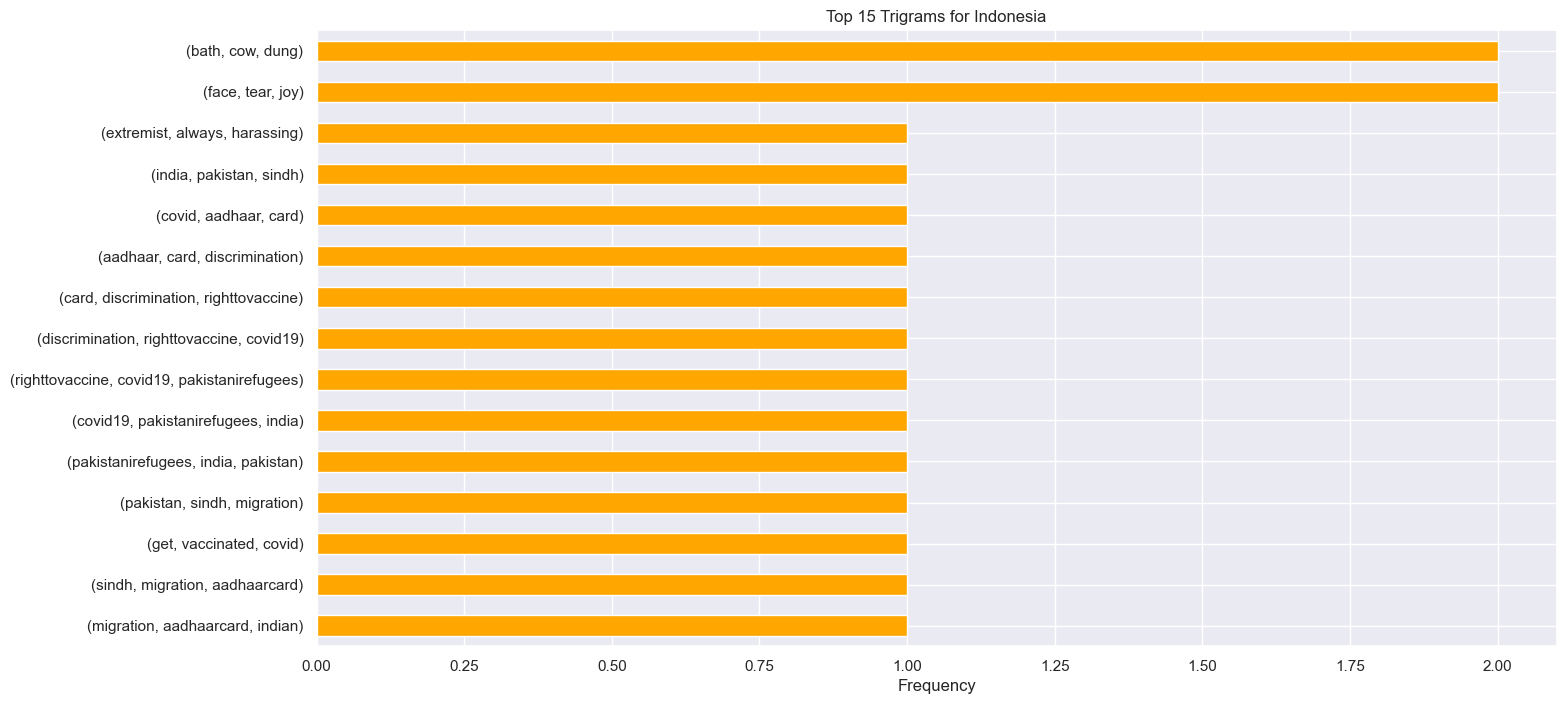

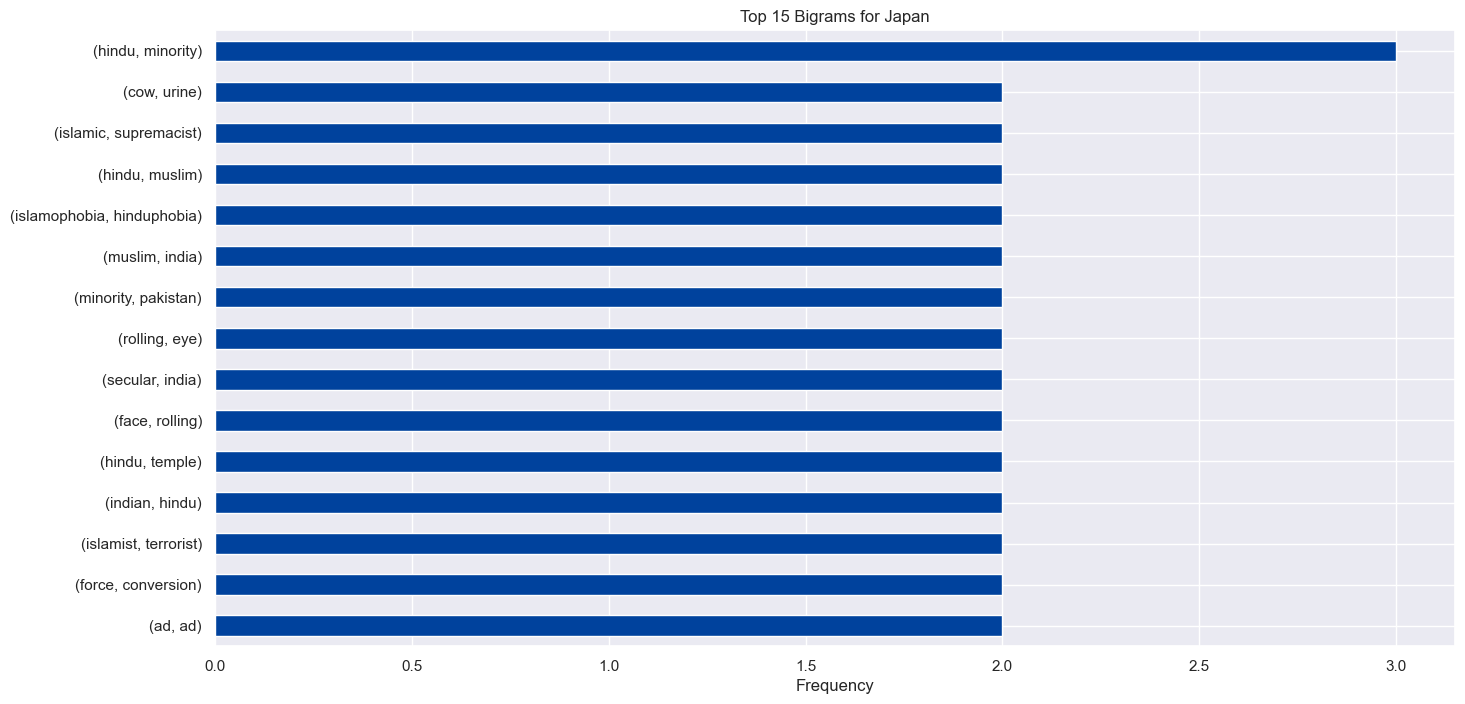

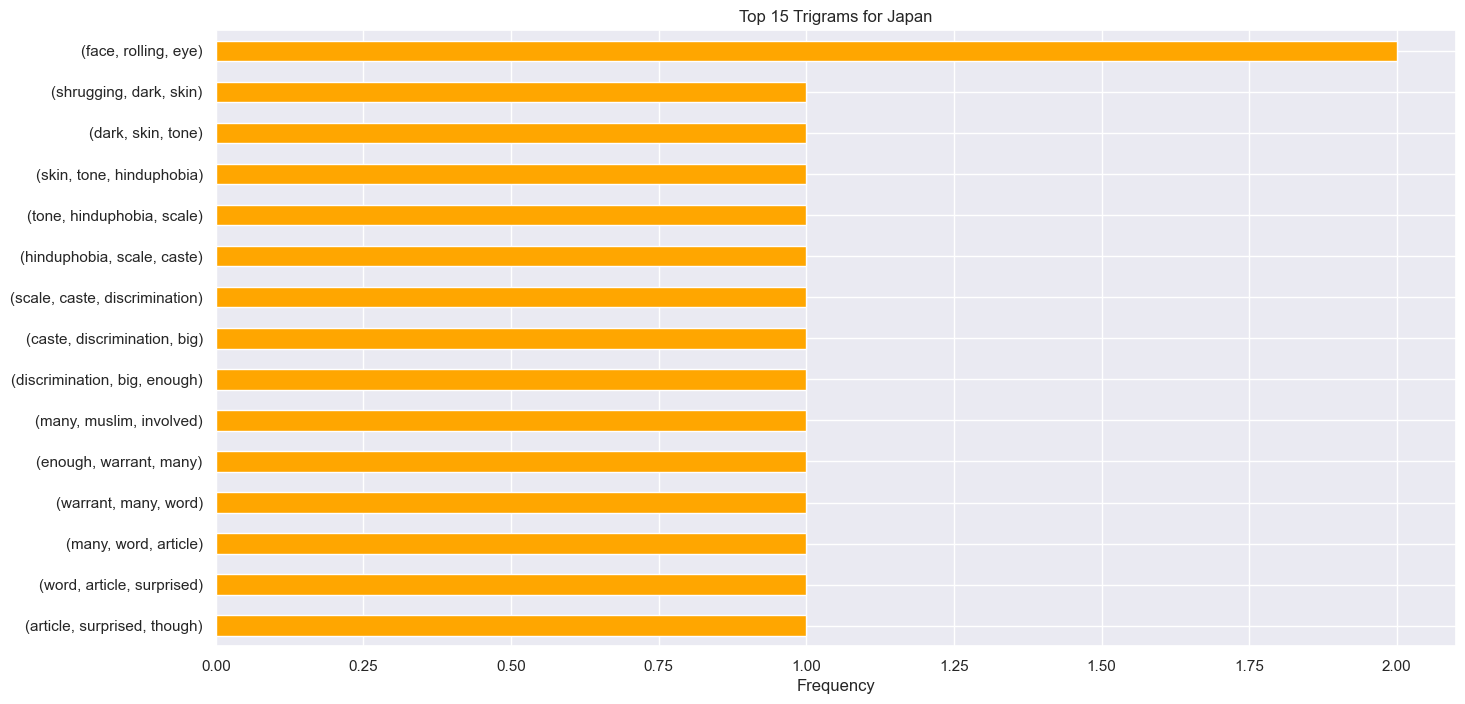

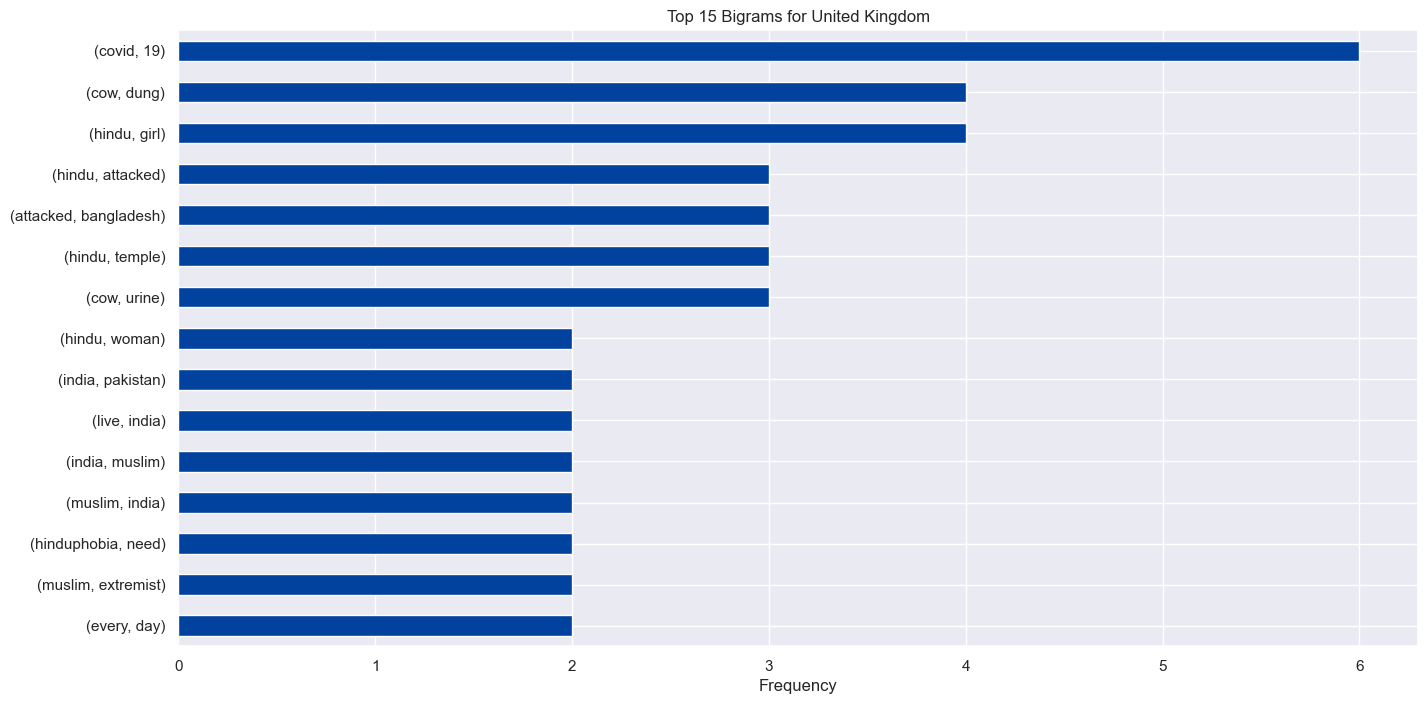

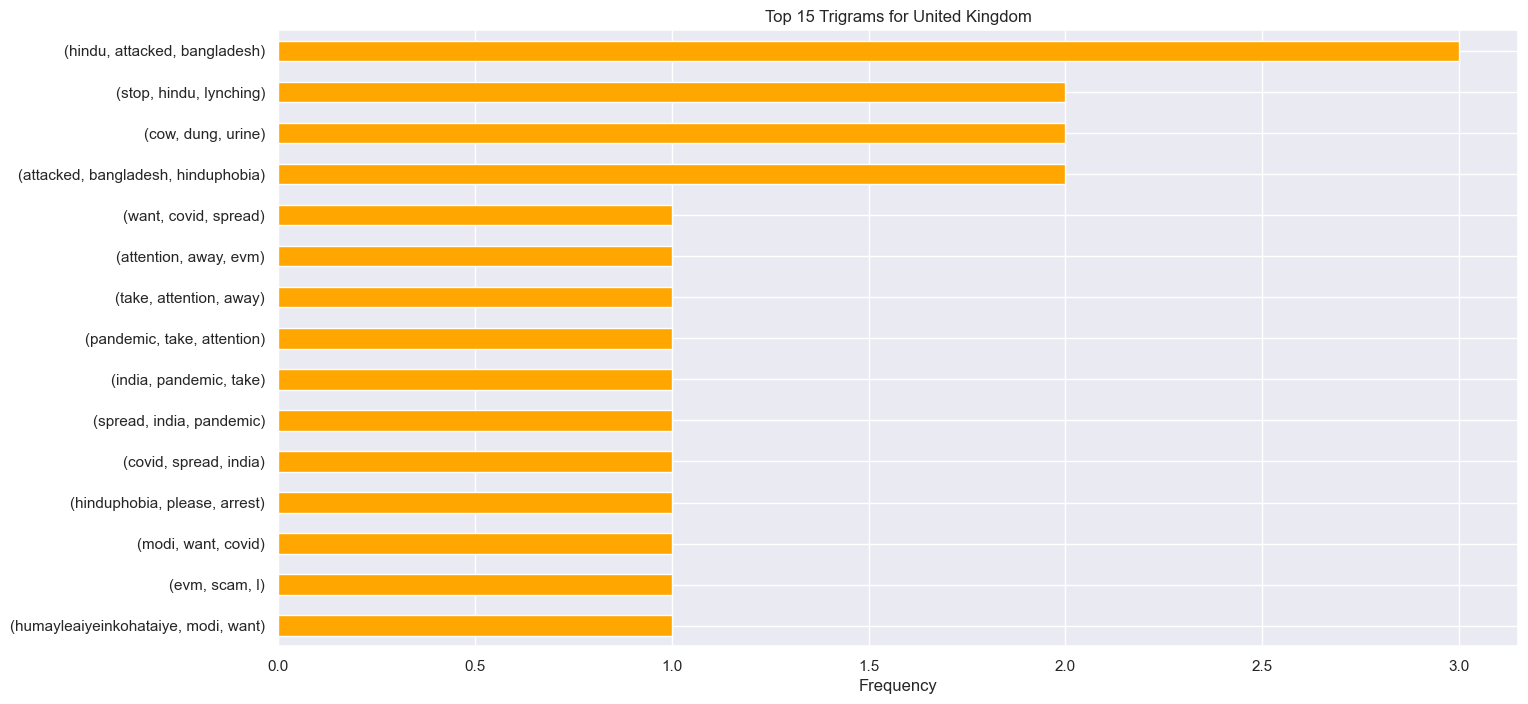

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
nonsense_words = {'cbc', 'nyt', 'cnn', 'gt', 'wapo', 'amp', 'torstar', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 'vilify', 'rh11 0af'}

# Cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Faster lookup with set

    # Normalize and clean text
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove Twitter handles
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Tokenize, remove stopwords and nonsense words, and lemmatize
    words = text.split()
    return [wnl.lemmatize(word) for word in words if word not in stop_words and word not in nonsense_words]

# Target countries
target_countries = ['Australia', 'Brazil', 'India', 'Indonesia', 'Japan', 'United Kingdom']

# Generate n-grams
def generate_ngrams(words, n):
    return list(ngrams(words, n))

# Process data and plot results for each country
for country in target_countries:
    # Filter data for the country and hate-related texts
    country_texts = data_bi_ti[(data_bi_ti['Country'] == country) & (data_bi_ti['hate'] == 1)]

    # Combine and clean text
    all_text = ' '.join(country_texts['text'].to_list())
    cleaned_words = clean(all_text)

    # Generate bigrams and trigrams
    bigrams = generate_ngrams(cleaned_words, 2)
    trigrams = generate_ngrams(cleaned_words, 3)

    # Convert to Series and extract top 15
    bigrams_series = pd.Series(bigrams).value_counts()[:15]
    trigrams_series = pd.Series(trigrams).value_counts()[:15]

    # Plot bigrams
    plt.figure(figsize=(16, 8))
    bigrams_series[::-1].plot.barh(color='#00429d')
    plt.title(f'Top 15 Bigrams for {country}')
    plt.xlabel('Frequency')
    plt.show()

    # Plot trigrams
    plt.figure(figsize=(16, 8))
    trigrams_series[::-1].plot.barh(color='#ffa600')
    plt.title(f'Top 15 Trigrams for {country}')
    plt.xlabel('Frequency')
    plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


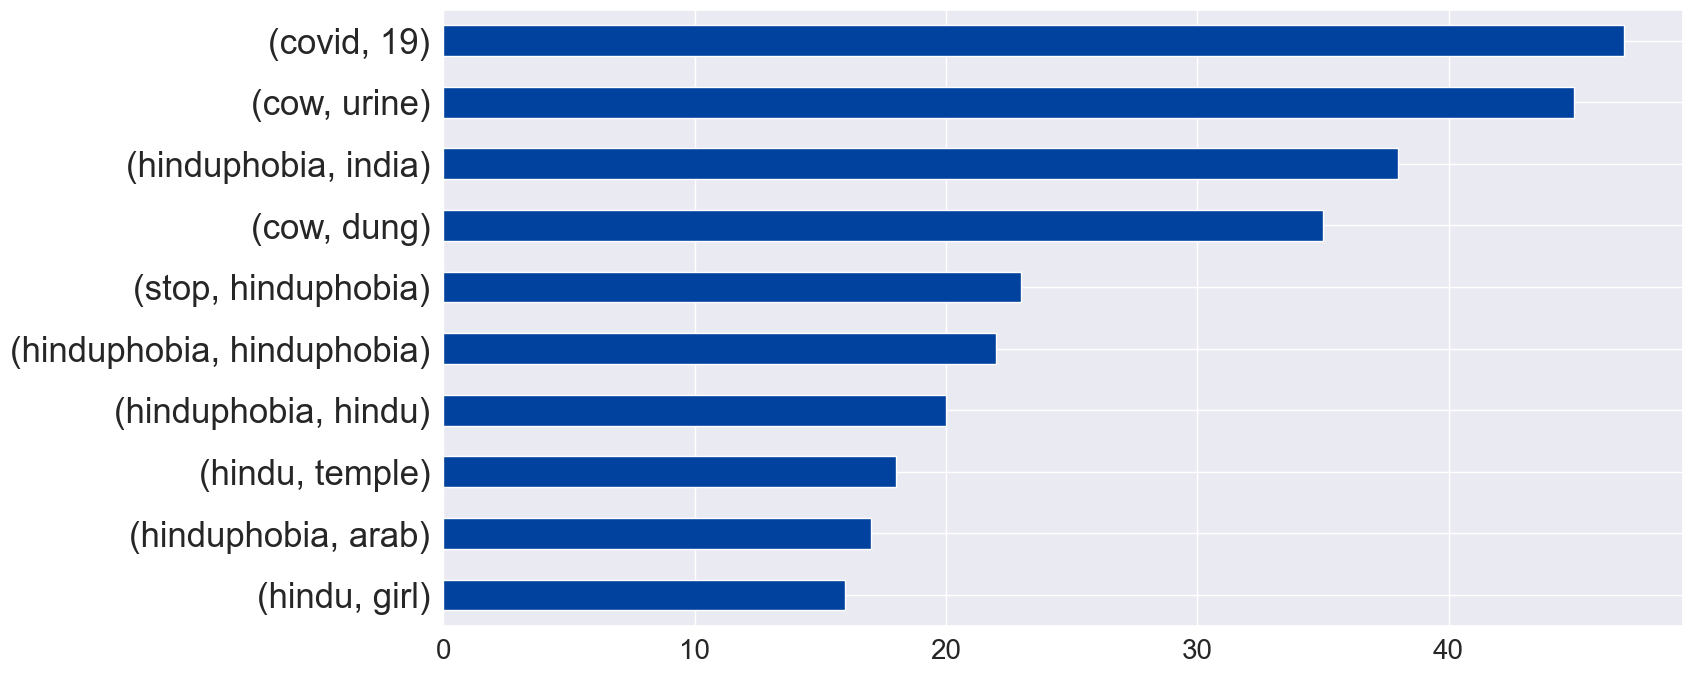

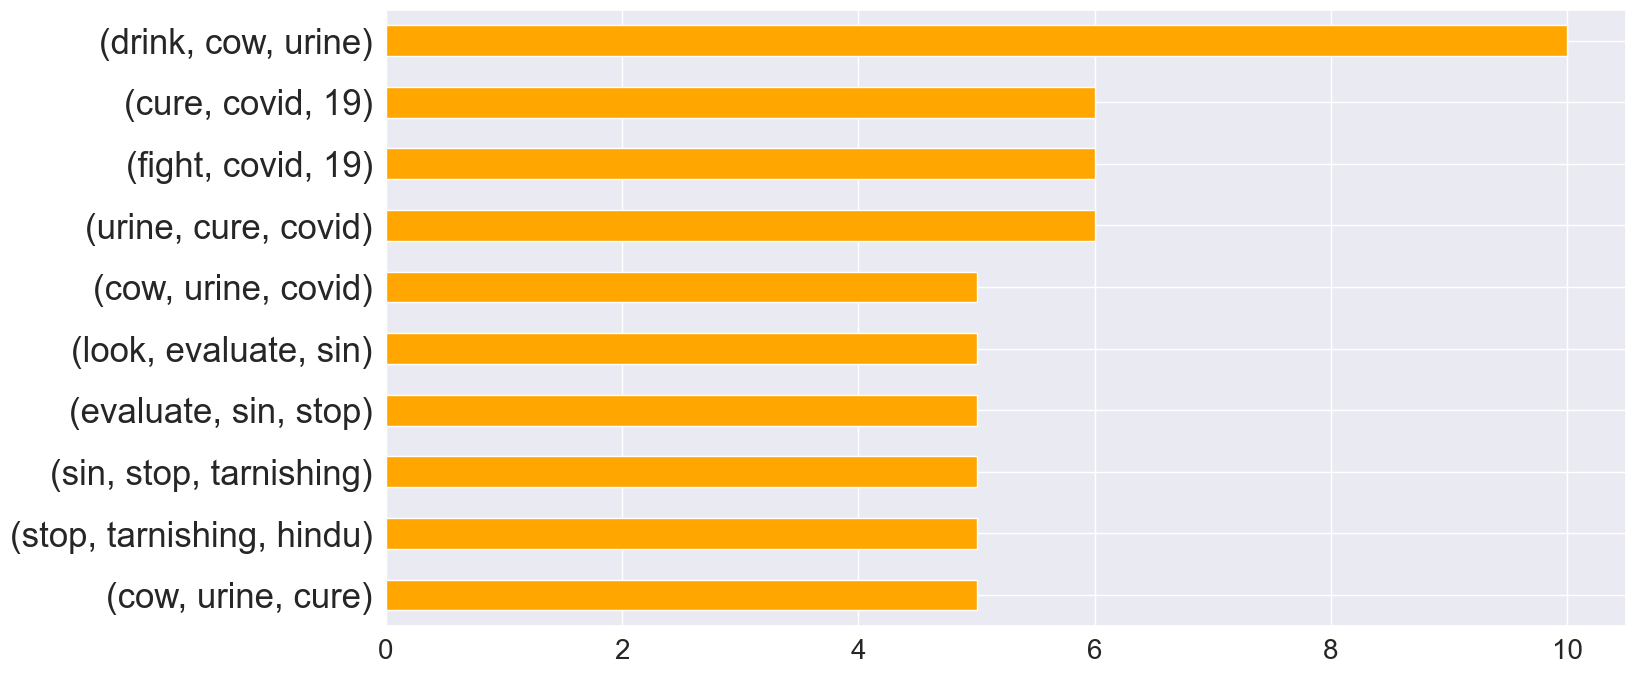

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
nonsense_words = {'cbc', 'private', 'boycottpatallok', 'rearview' ,'mirror', 'really', 'face','simple','nyt', 'cnn', 'gt', 'wapo', 'amp', 'torstar', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 'vilify', 'rh11 0af'}

# Cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Faster lookup with set

    # Normalize and clean text
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove Twitter handles
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Tokenize, remove stopwords and nonsense words, and lemmatize
    words = text.split()
    return [wnl.lemmatize(word) for word in words if word not in stop_words and word not in nonsense_words]

# Generate n-grams
def generate_ngrams(words, n):
    return list(ngrams(words, n))

# Combine all country data
all_texts = ' '.join(data_bi_ti[data_bi_ti['hate'] == 1]['text'].to_list())
cleaned_words = clean(all_texts)

# Generate bigrams and trigrams for all countries combined
bigrams = generate_ngrams(cleaned_words, 2)
trigrams = generate_ngrams(cleaned_words, 3)

# Convert to Series and extract top 15
bigrams_series = pd.Series(bigrams).value_counts()[:10]
trigrams_series = pd.Series(trigrams).value_counts()[:10]

# Plot bigrams for all countries combined
fig, ax = plt.subplots(figsize=(16, 8))
bigrams_series[::-1].plot.barh(ax=ax, color='#00429d')
# ax.set_title('Top 15 Bigrams for All Countries', fontsize=20)
# ax.set_xlabel('Frequency', fontsize=18)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=25)
plt.show()

# Plot trigrams for all countries combined
fig, ax = plt.subplots(figsize=(16, 8))
trigrams_series[::-1].plot.barh(ax=ax, color='#ffa600')
# ax.set_title('Top 15 Trigrams for All Countries', fontsize=20)
# ax.set_xlabel('Frequency', fontsize=18)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=25)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy

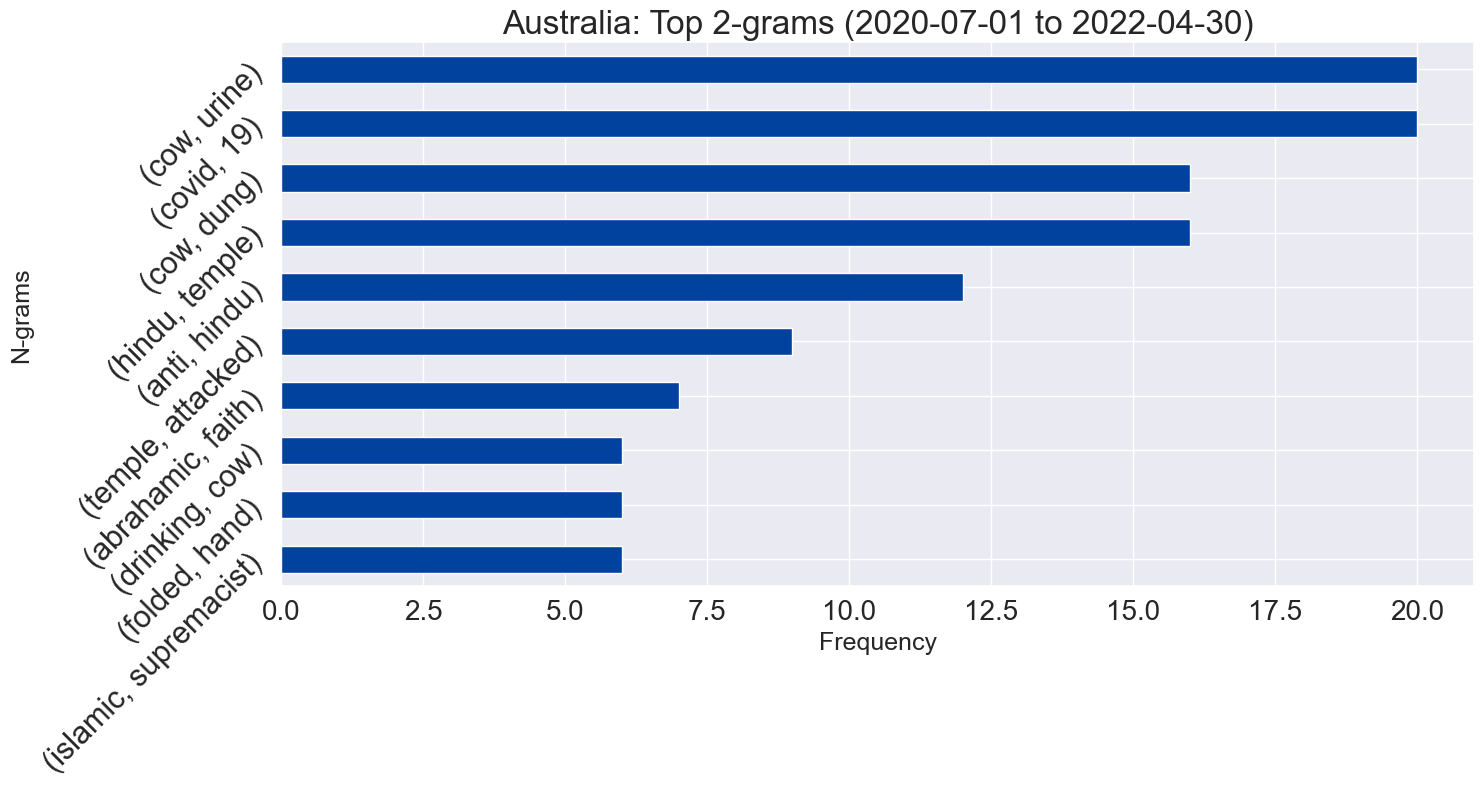

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


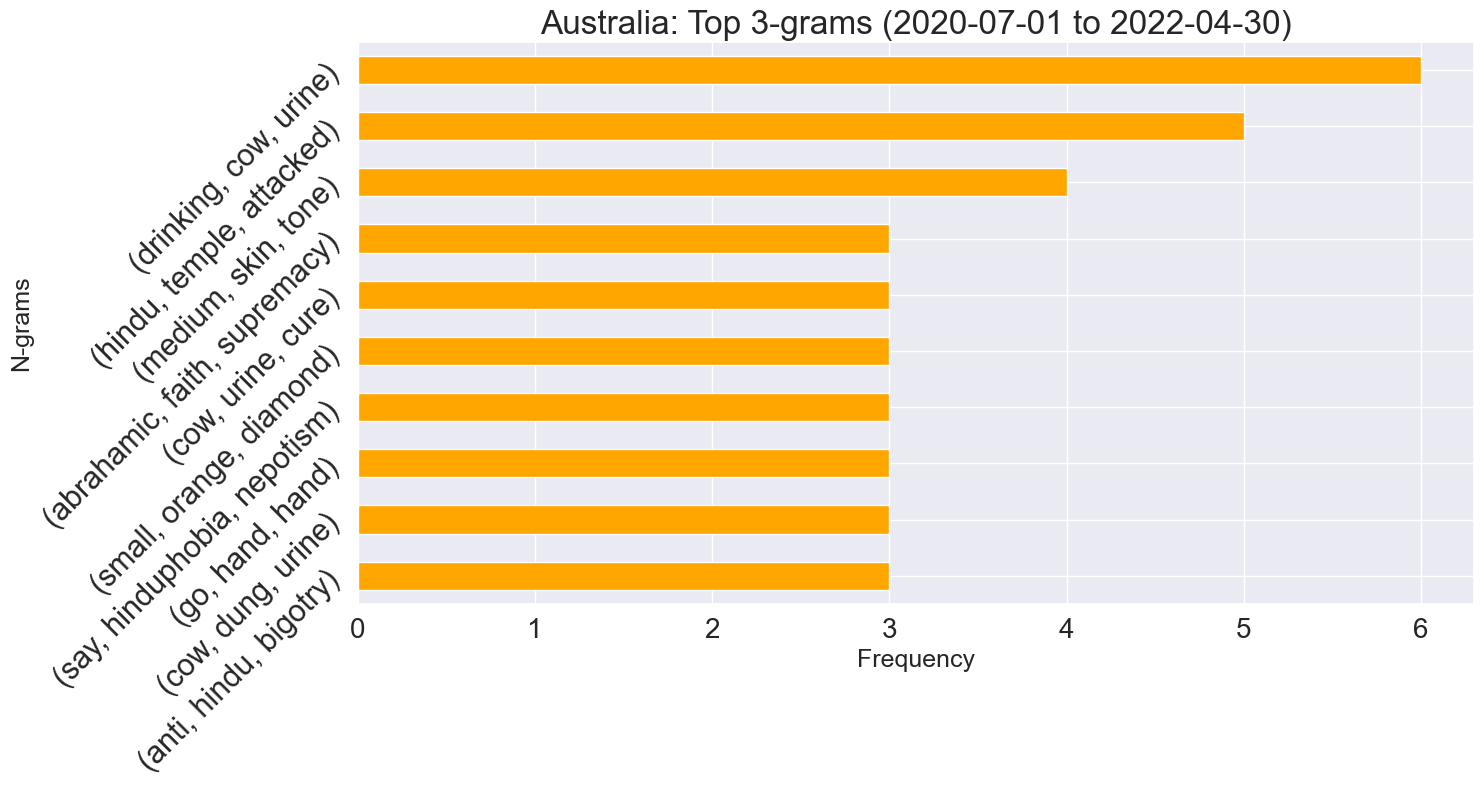

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

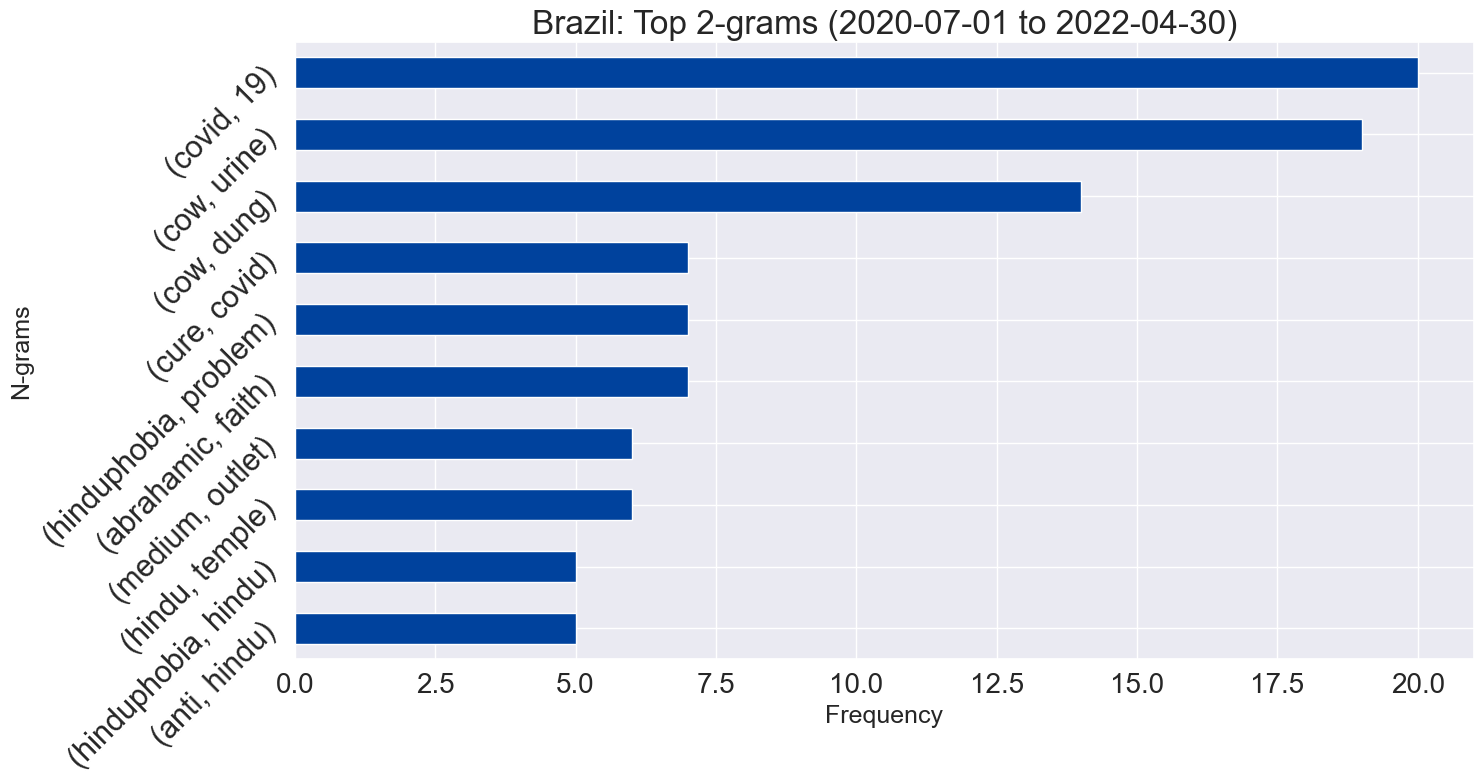

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


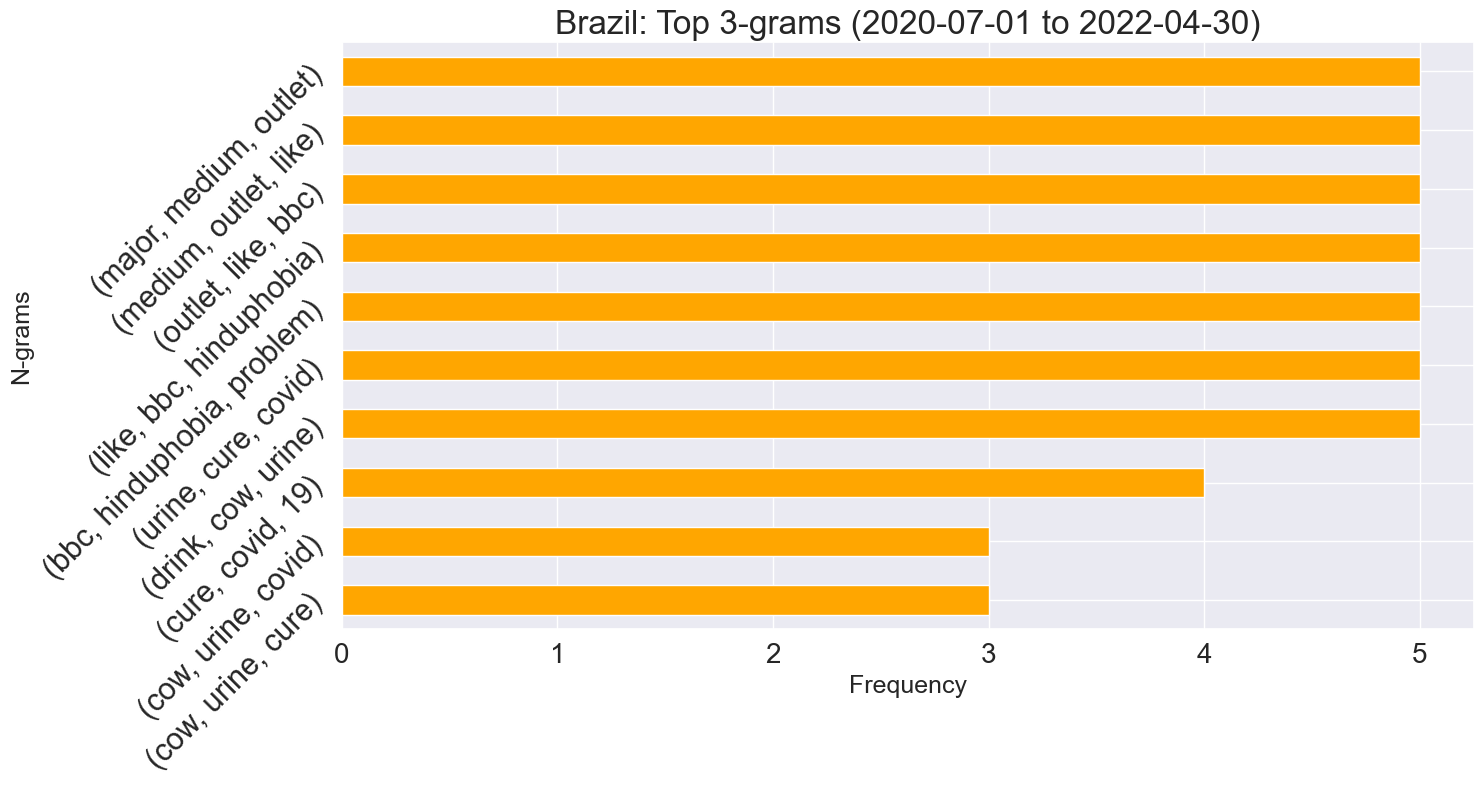

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

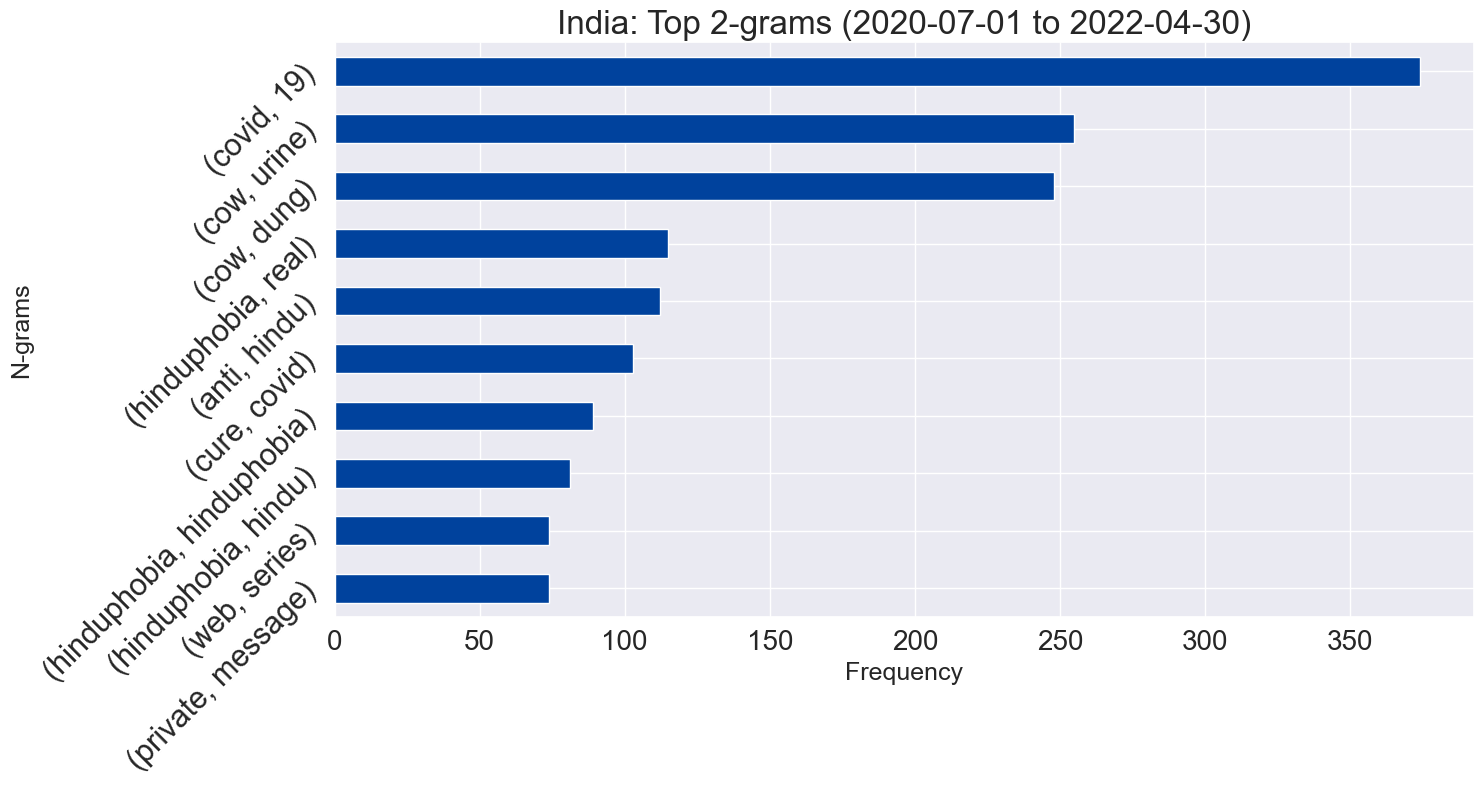

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


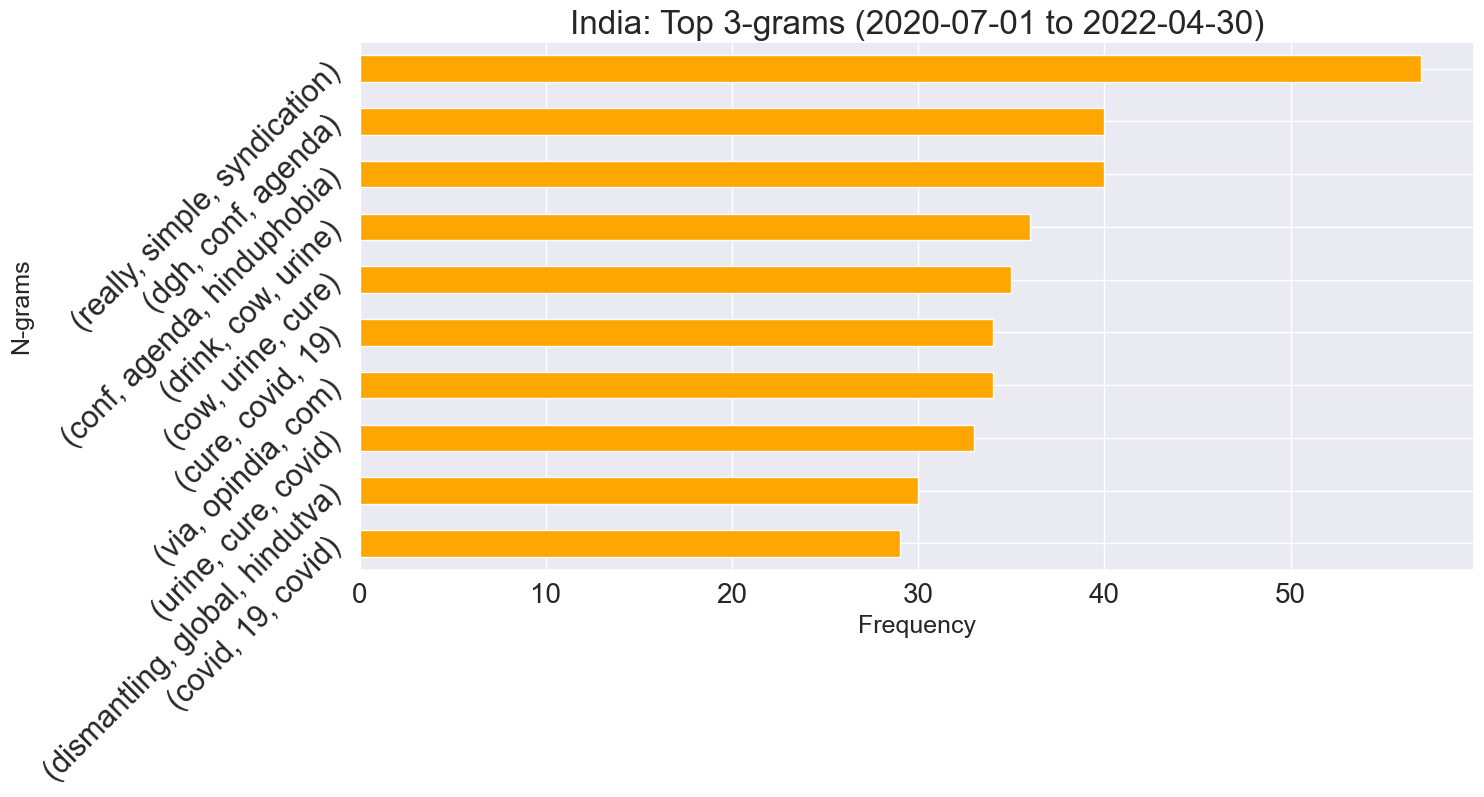

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

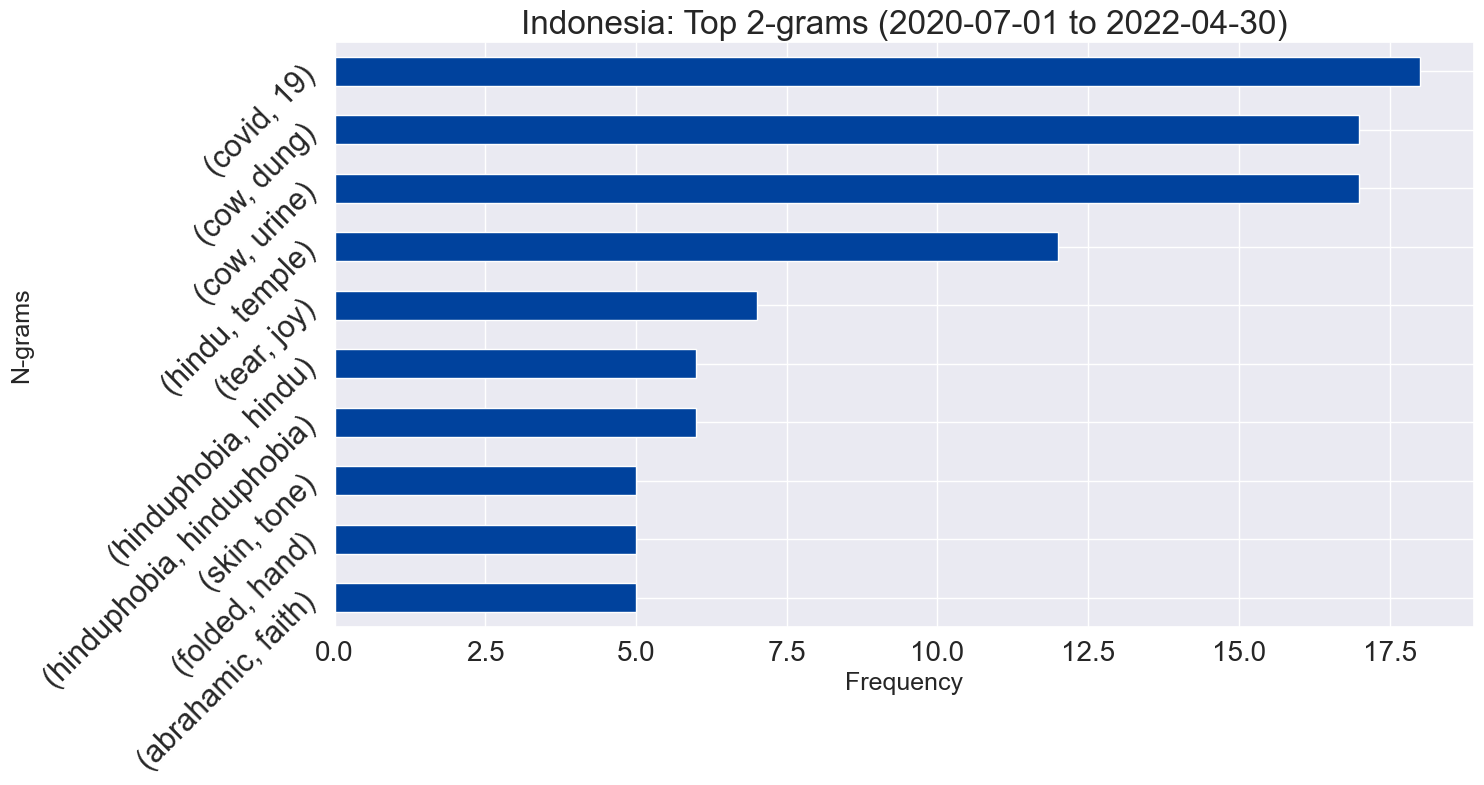

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


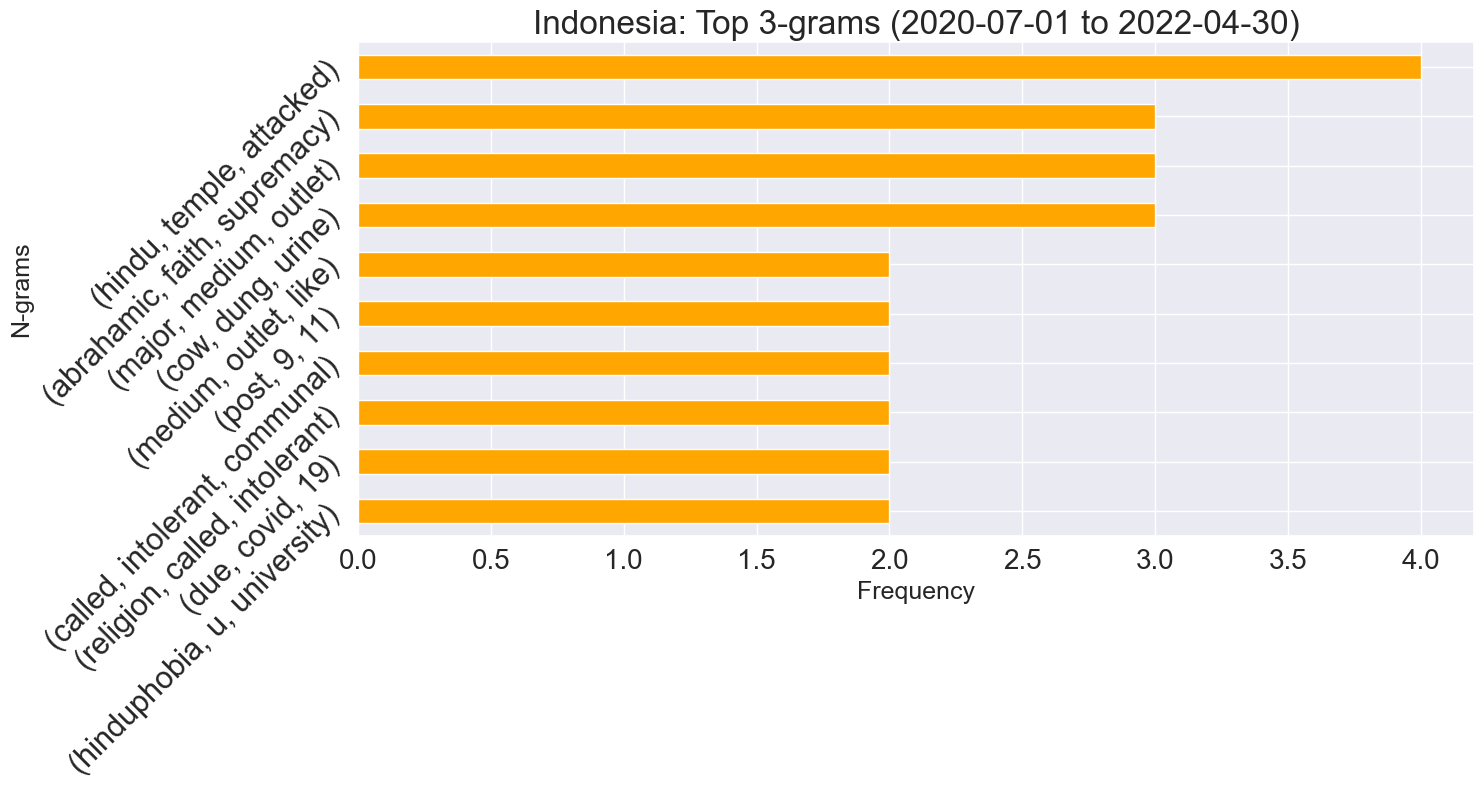

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

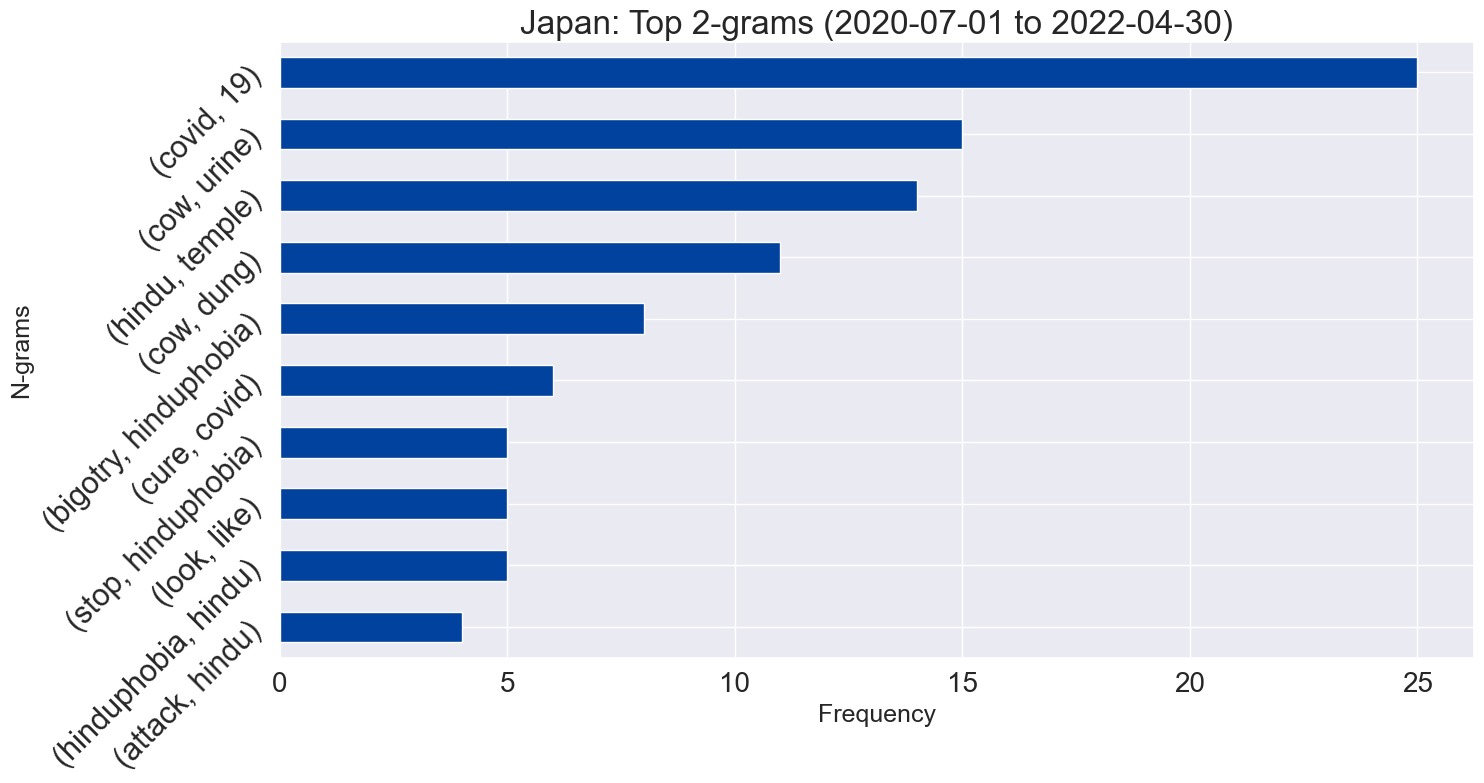

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


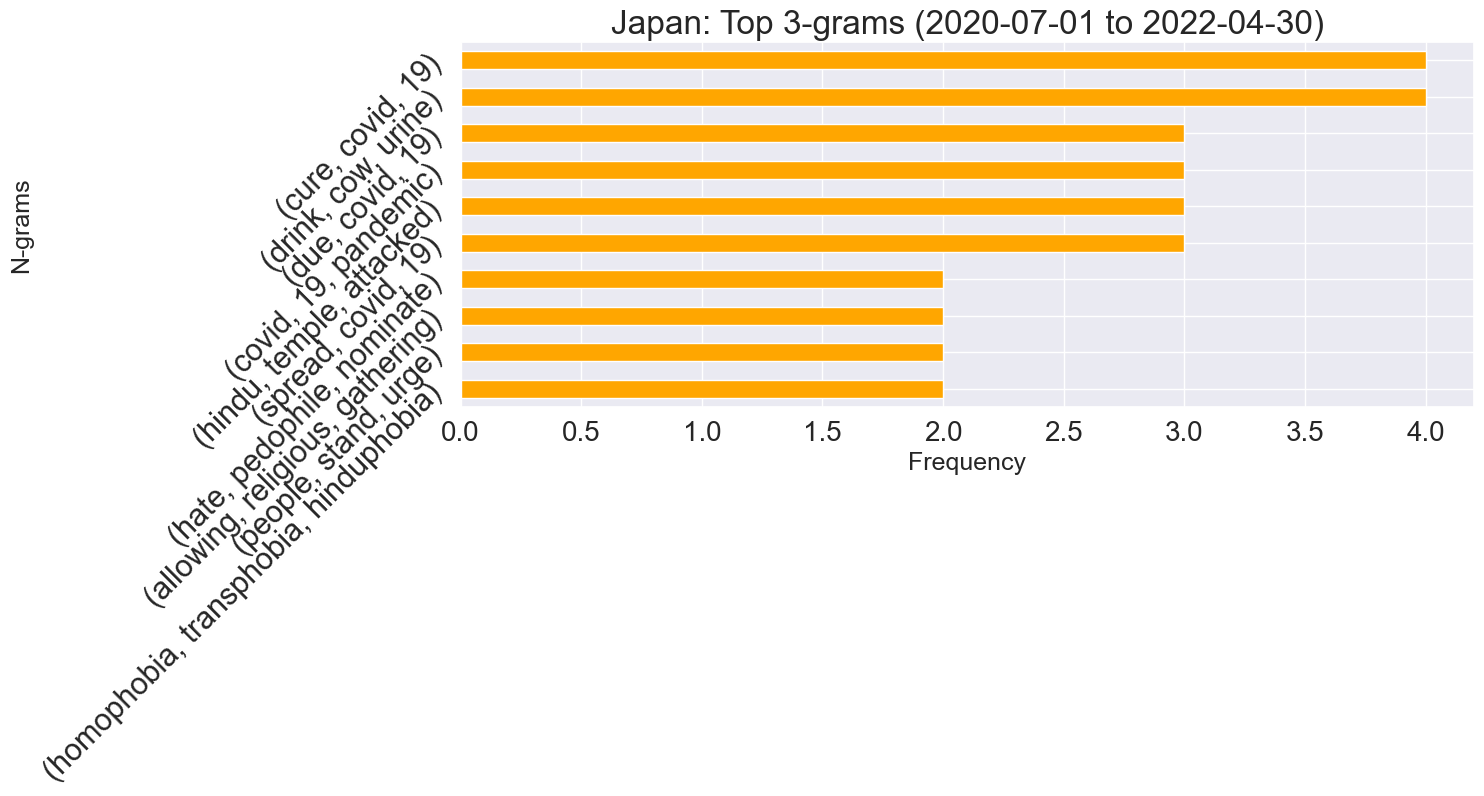

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

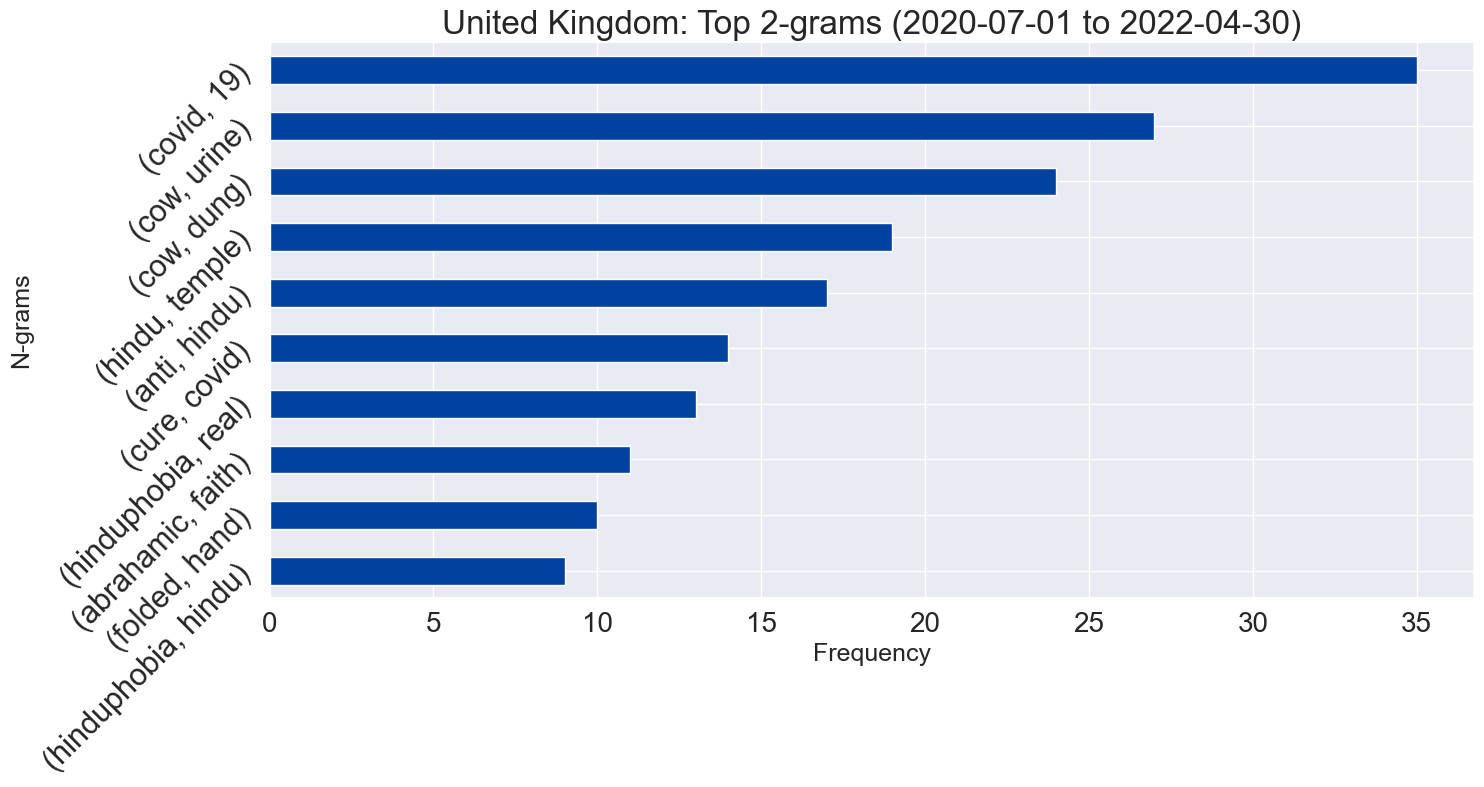

C:\Users\ashut\AppData\Local\Temp\ipykernel_7048\4162117755.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data[col] = quarterly_data[col].astype(str)


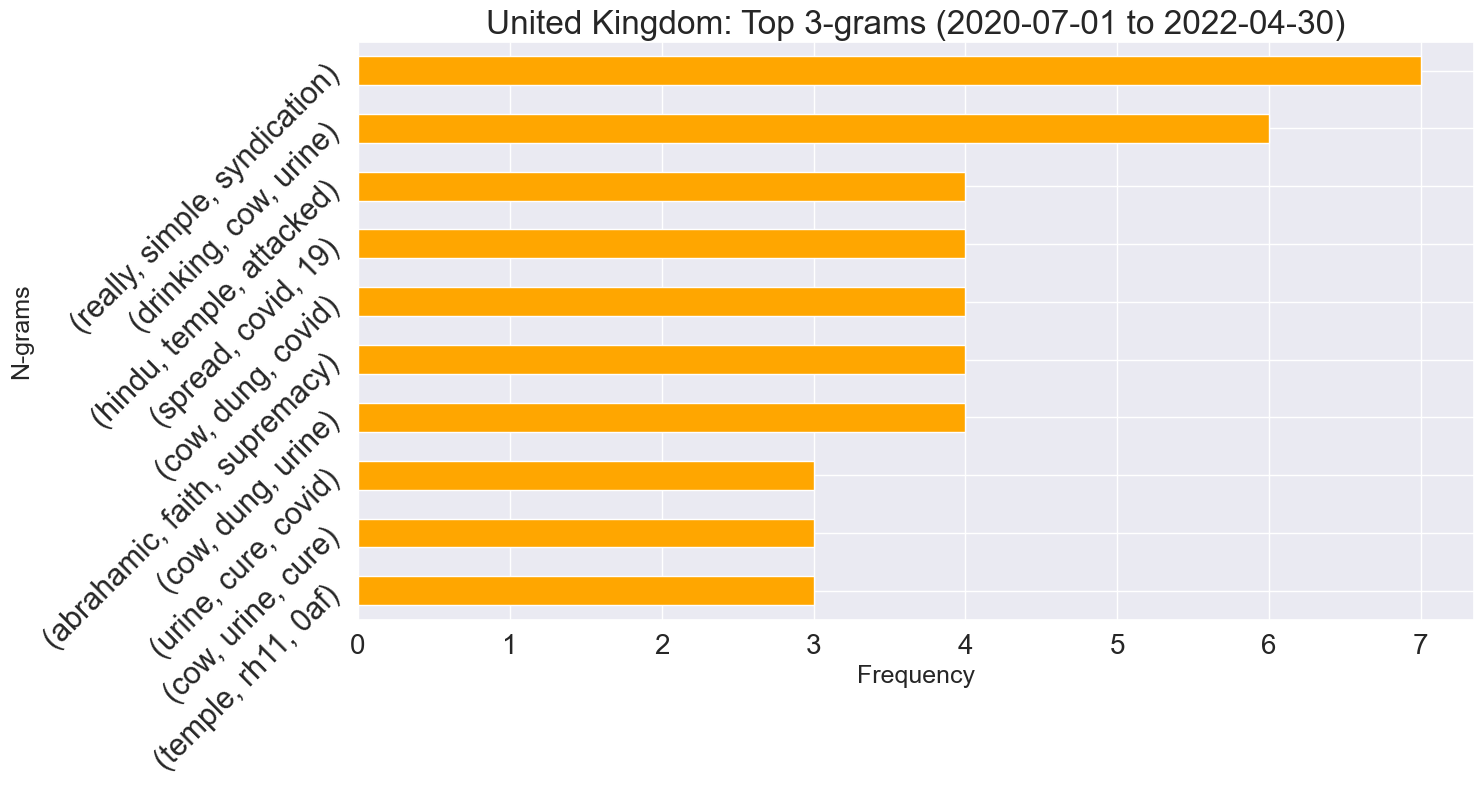

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
nonsense_words = {'cbc', 'nyt','2', 'cnn', 'gt', 'dismantlinghinduphobia', 'wapo', 'amp', 'torstar','face', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 'vilify', 'rh11 0af','backhand','index','pointing'}

# Define the cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Use a set for faster lookup

    # Normalize and encode the text
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove Twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords and nonsense words, then lemmatize
    words = text.split()
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stop_words and word not in nonsense_words]

    return cleaned_words

# Function to extract specific quarter data
def extract_specific_quarter_data(df, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Function to plot n-grams for a dataset
def plot_ngrams_for_dataset1(data, dataset_name, start_date, end_date, n=[2], top=10, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)
    col = 'text' if 'text' in data.columns else 'tweet'
    quarterly_data[col] = quarterly_data[col].astype(str)
    cleaned_data = clean(' '.join(quarterly_data[col]))

    for i, n_val in enumerate(n):
        plt.figure(figsize=(15, 8))
        ax = plt.subplot()

        ngrams_series = pd.Series(ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        # Adjust tick parameters for better readability
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=22, rotation=45)

        # Add a title and display the plot
        plt.title(f'{dataset_name}: Top {n_val}-grams ({start_date} to {end_date})', fontsize=24)
        plt.xlabel('Frequency', fontsize=18)
        plt.ylabel('N-grams', fontsize=18)
        plt.tight_layout()
        plt.show()

# Define target countries
target_countries = ['Australia', 'Brazil', 'India', 'Indonesia', 'Japan', 'United Kingdom']

# Main loop to process each country
for country in target_countries:
    # Filter texts for the current country
    df = data_bi_ti[data_bi_ti['Country'] == country]  # Replace 'text' with actual column name
    start_date = '2020-07-01'
    end_date = '2022-04-30'
    date_obj = pd.to_datetime(df['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y")
    df['date'] = date_obj.dt.strftime("%Y-%m-%d")
    df['date'] = pd.to_datetime(df['date'])

    # Plot bigrams
    plot_ngrams_for_dataset1(df, country, start_date, end_date, n=[2], top=10, colors=('#00429d', '#ffa600'))

    # Plot trigrams
    plot_ngrams_for_dataset1(df, country, start_date, end_date, n=[3], top=10, colors=('#ffa600', '#ffa600'))


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
NONSENSE_WORDS = {'cbc', 'web', 'private', 'really', 'gt', 'nyt', '2', 'cnn', 'dismantlinghinduphobia', 
                  'wapo', 'amp', 'torstar', 'face', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 
                  'vilify', 'rh11 0af', 'backhand', 'index', 'pointing'}

# Define the cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Normalize, remove accents, and convert to lowercase
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()

    # Remove URLs, Twitter handles, hashtags, special characters, and extra spaces
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+|[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stopwords and nonsense words, and lemmatize
    words = text.split()
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stop_words and word not in NONSENSE_WORDS]

    return cleaned_words

# Extract specific quarter data
def extract_specific_quarter_data(df, start_date, end_date):
    start_date, end_date = pd.to_datetime(start_date), pd.to_datetime(end_date)
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Plot n-grams for a dataset
def plot_ngrams(data, dataset_name, start_date, end_date, n_values=[2], top=10, colors=('#00429d', '#ffa600')):
    # Filter data for the specified date range
    filtered_data = extract_specific_quarter_data(data, start_date, end_date)
    col = 'text' if 'text' in data.columns else 'tweet'
    filtered_data[col] = filtered_data[col].astype(str)

    # Clean the text data
    cleaned_data = clean(' '.join(filtered_data[col]))

    for i, n in enumerate(n_values):
        plt.figure(figsize=(15, 8))
        ax = plt.subplot()

        # Generate and plot n-grams
        ngrams_series = pd.Series(ngrams(cleaned_data, n)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        # Customize plot appearance
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=22)
        plt.title(f'{dataset_name}: Top {n}-grams ({start_date} to {end_date})', fontsize=24)
        plt.xlabel('Frequency', fontsize=18)
        plt.ylabel('N-grams', fontsize=18)
        plt.tight_layout()
        plt.show()

# Main loop to process each country
def analyze_ngrams(data_bi_ti, start_date, end_date):
    if 'Country' not in data_bi_ti.columns or 'createdAt' not in data_bi_ti.columns:
        raise ValueError("Dataset must contain 'Country' and 'createdAt' columns.")
    
    unique_countries = data_bi_ti['Country'].unique()

    for country in unique_countries:
        country_data = data_bi_ti[data_bi_ti['Country'] == country].copy()

        # Parse dates and filter
        country_data['date'] = pd.to_datetime(country_data['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y")
        country_data['date'] = country_data['date'].dt.strftime("%Y-%m-%d")
        country_data['date'] = pd.to_datetime(country_data['date'])

        # Plot bigrams and trigrams
        print(f"Analyzing {country}...")
        plot_ngrams(country_data, country, start_date, end_date, n_values=[2], top=10)
        plot_ngrams(country_data, country, start_date, end_date, n_values=[3], top=10)

# Example Usage
# analyze_ngrams(data_bi_ti, '2020-07-01', '2022-04-30')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ashut\AppData\Local\Temp\ipykernel_35056\2040745801.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_obj.dt.strftime("%Y-%m-%d")
C:\Users\ashut\AppData\Local\Temp\ipykernel_35056\2040745801.py:89: SettingWithCopyWarning: 
A value is trying to be set on a co

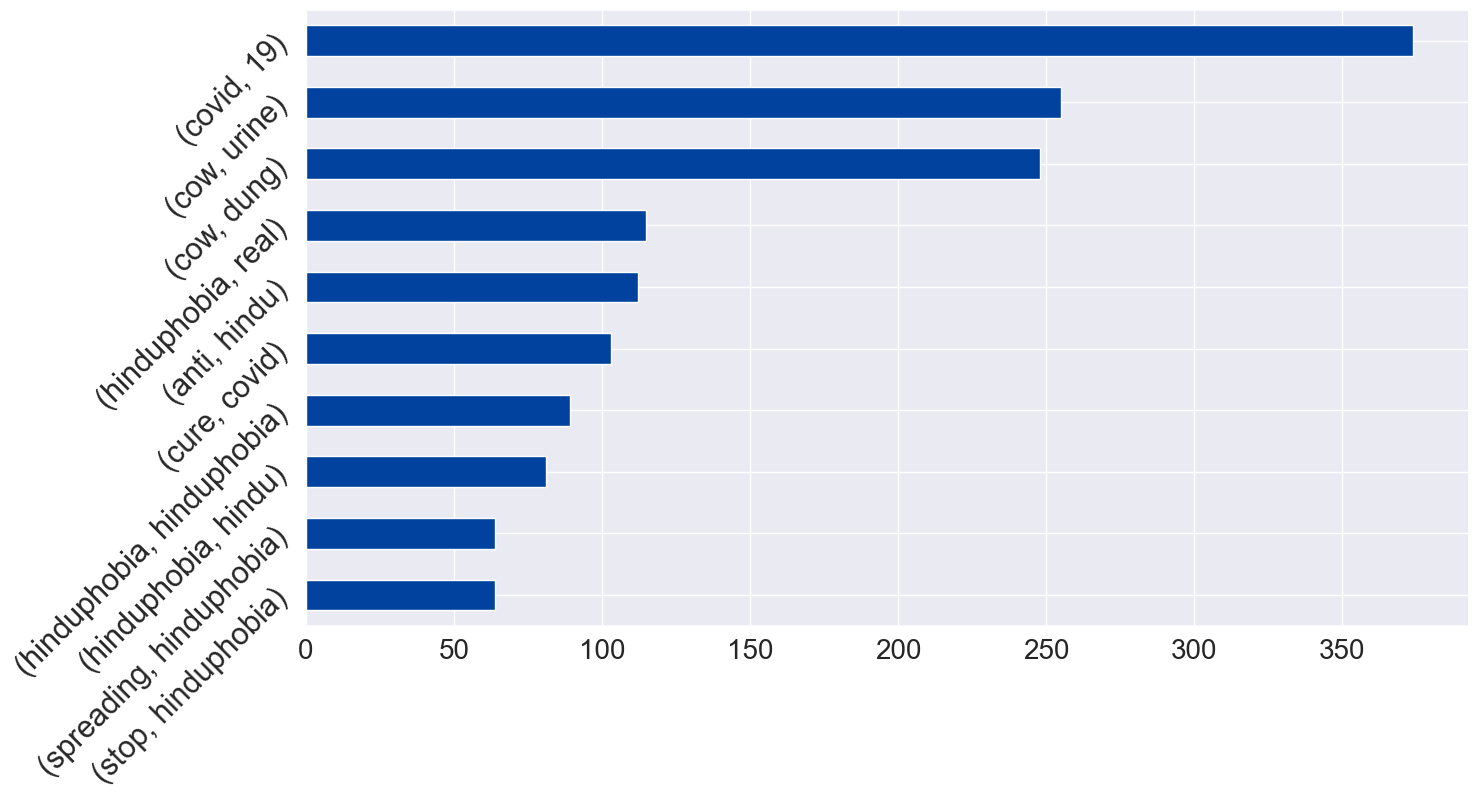

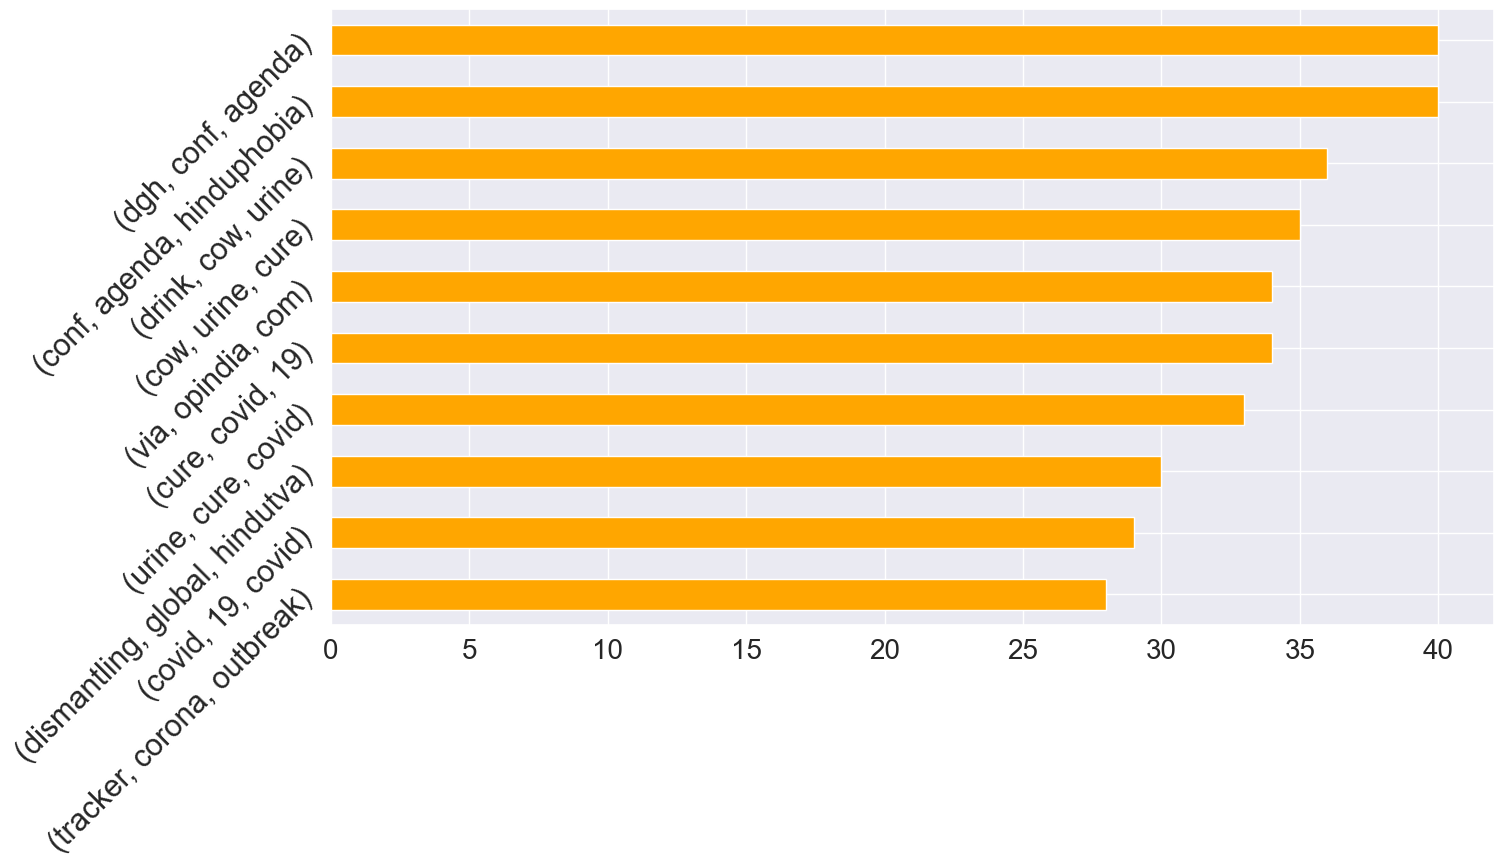

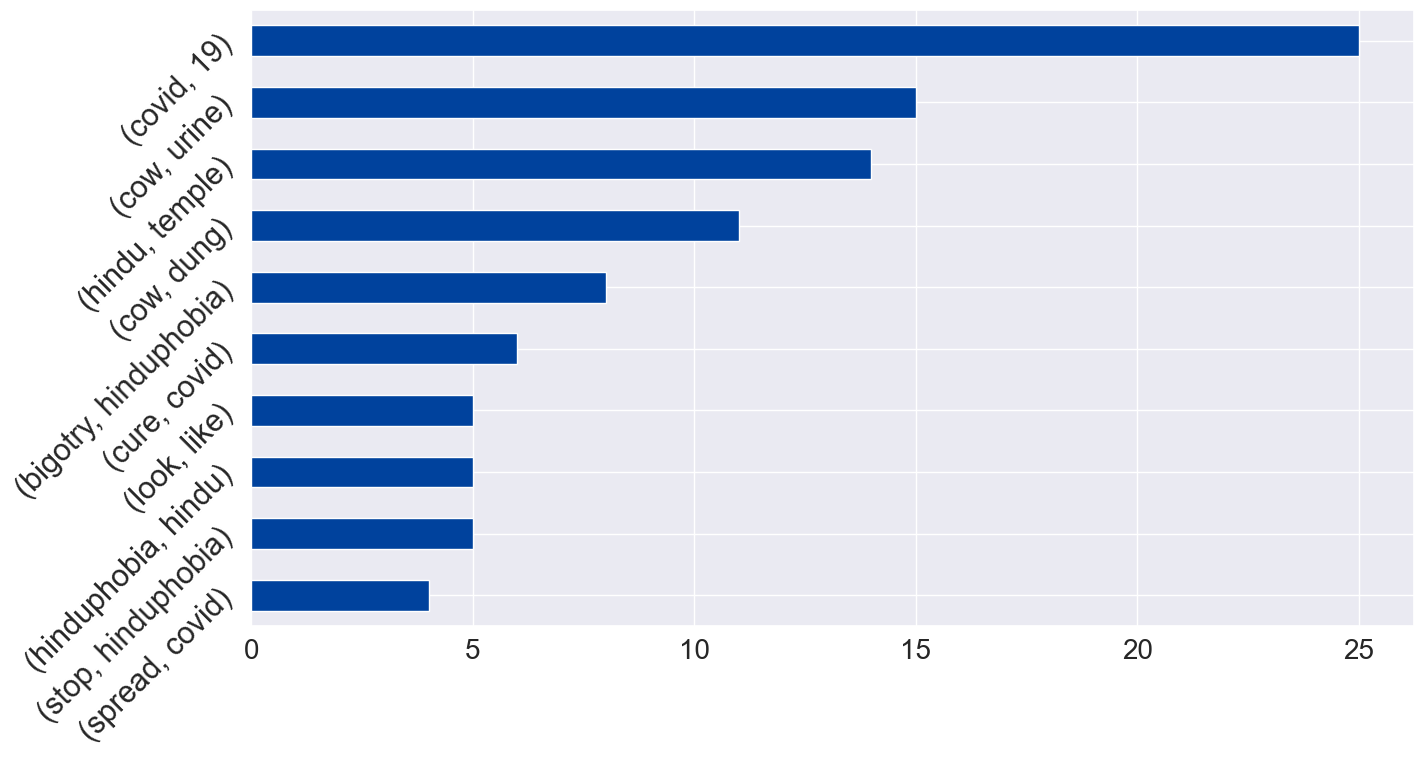

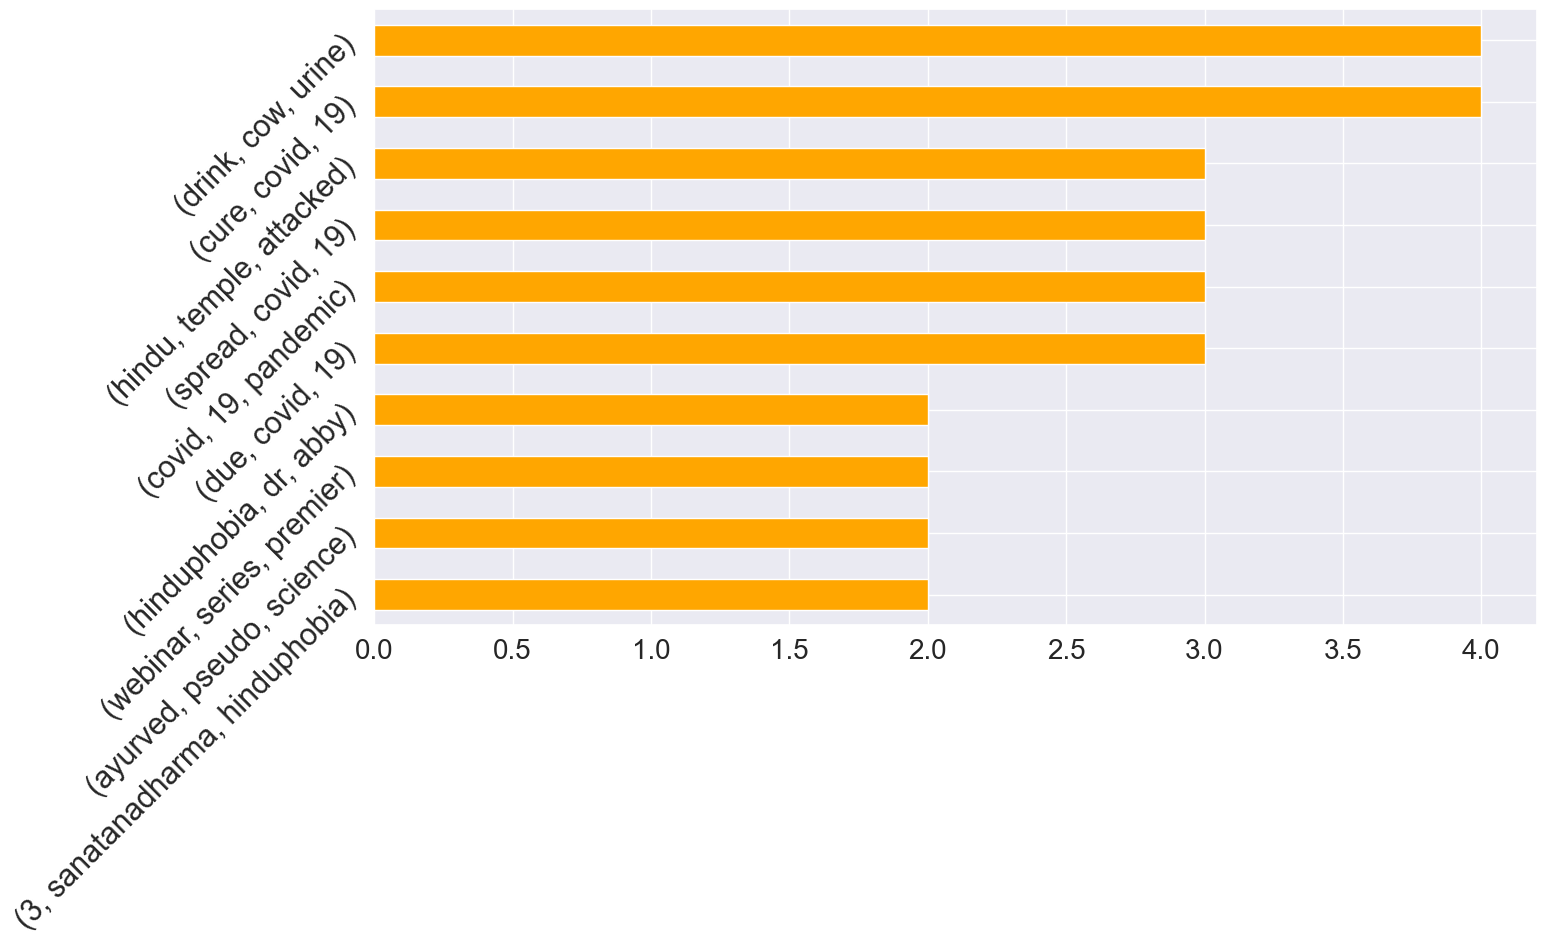

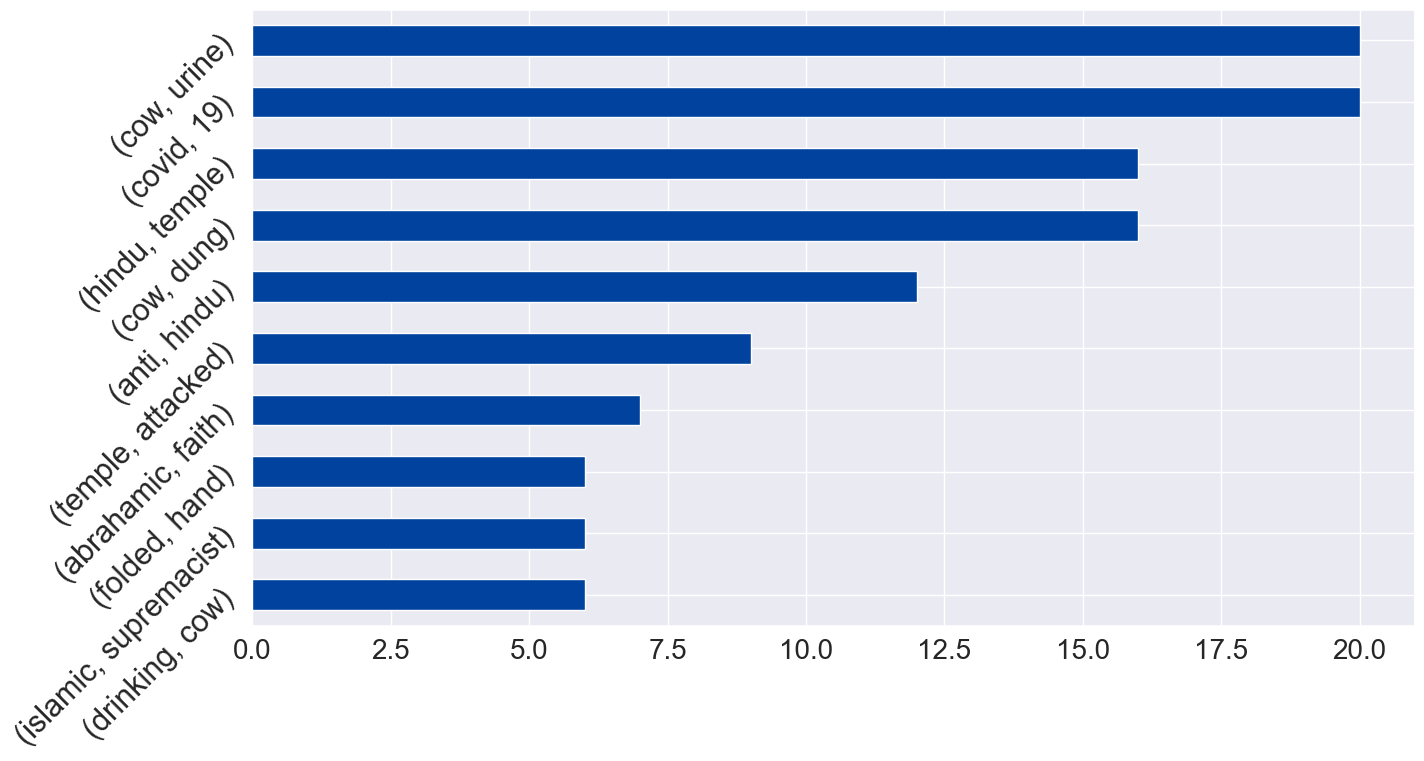

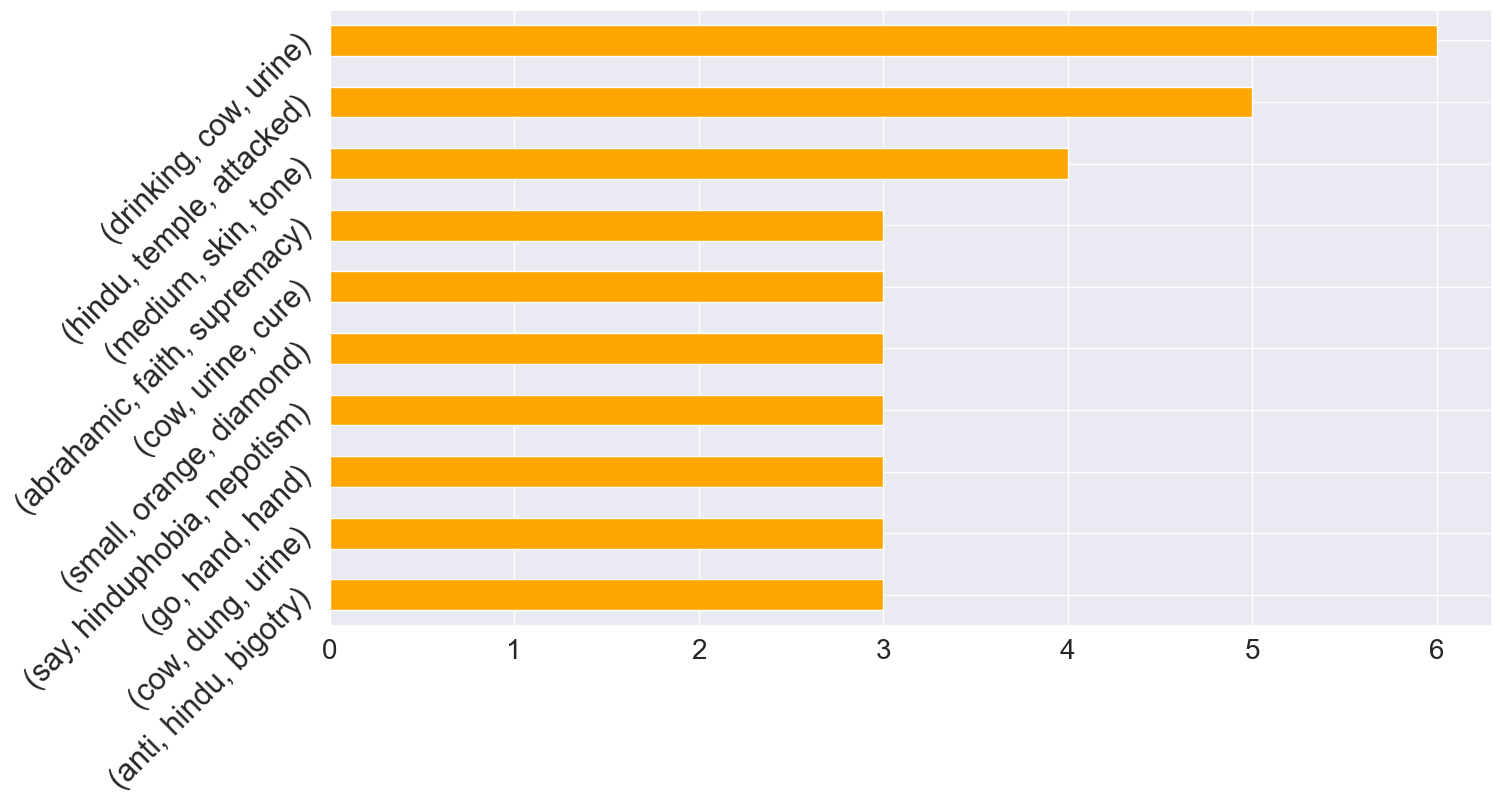

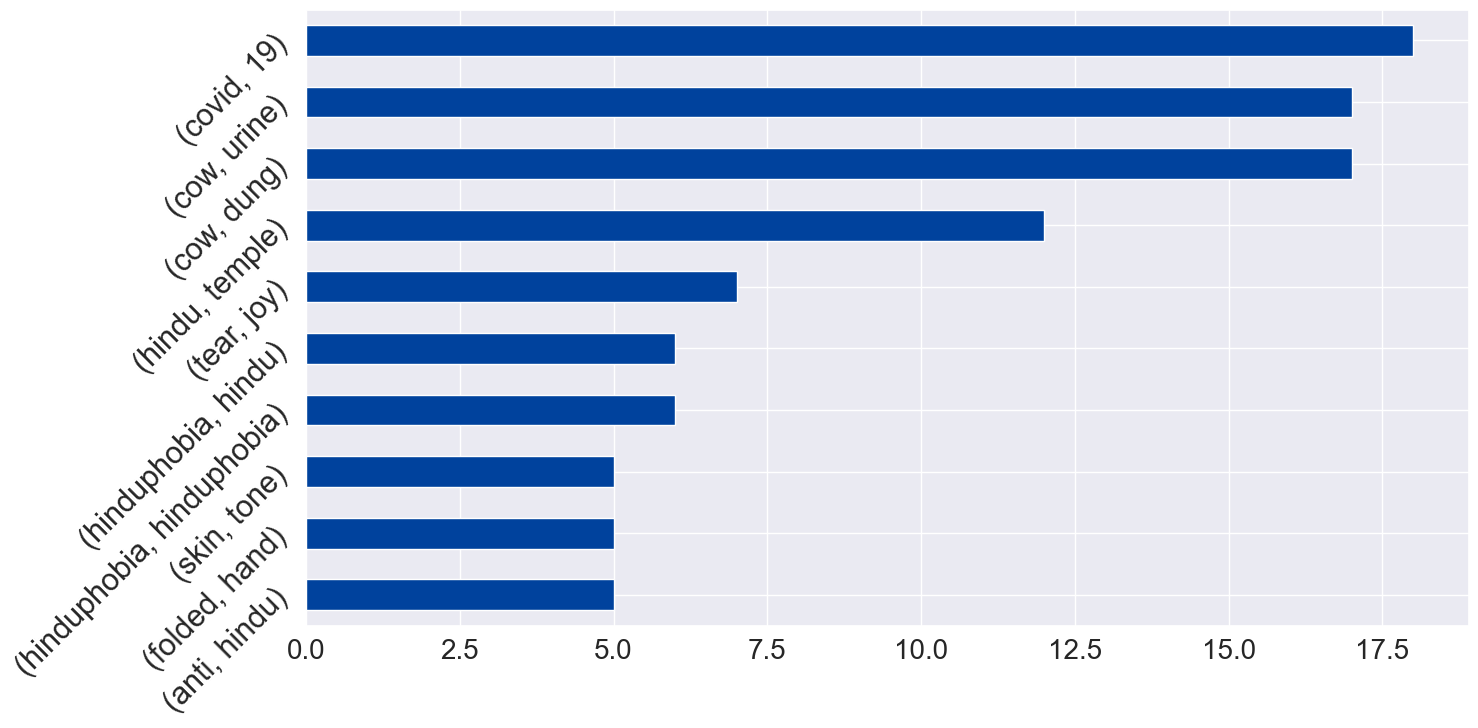

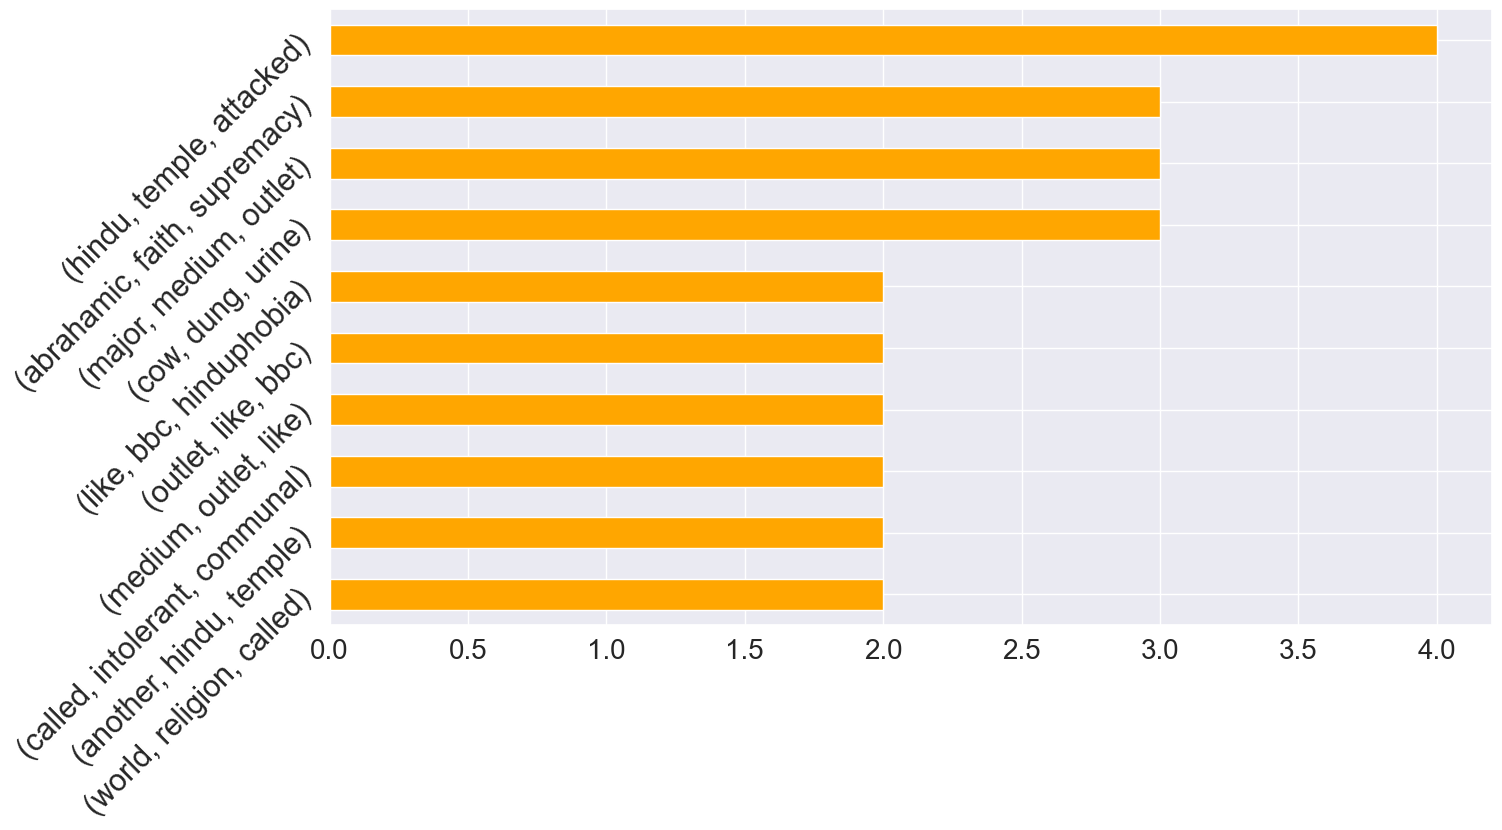

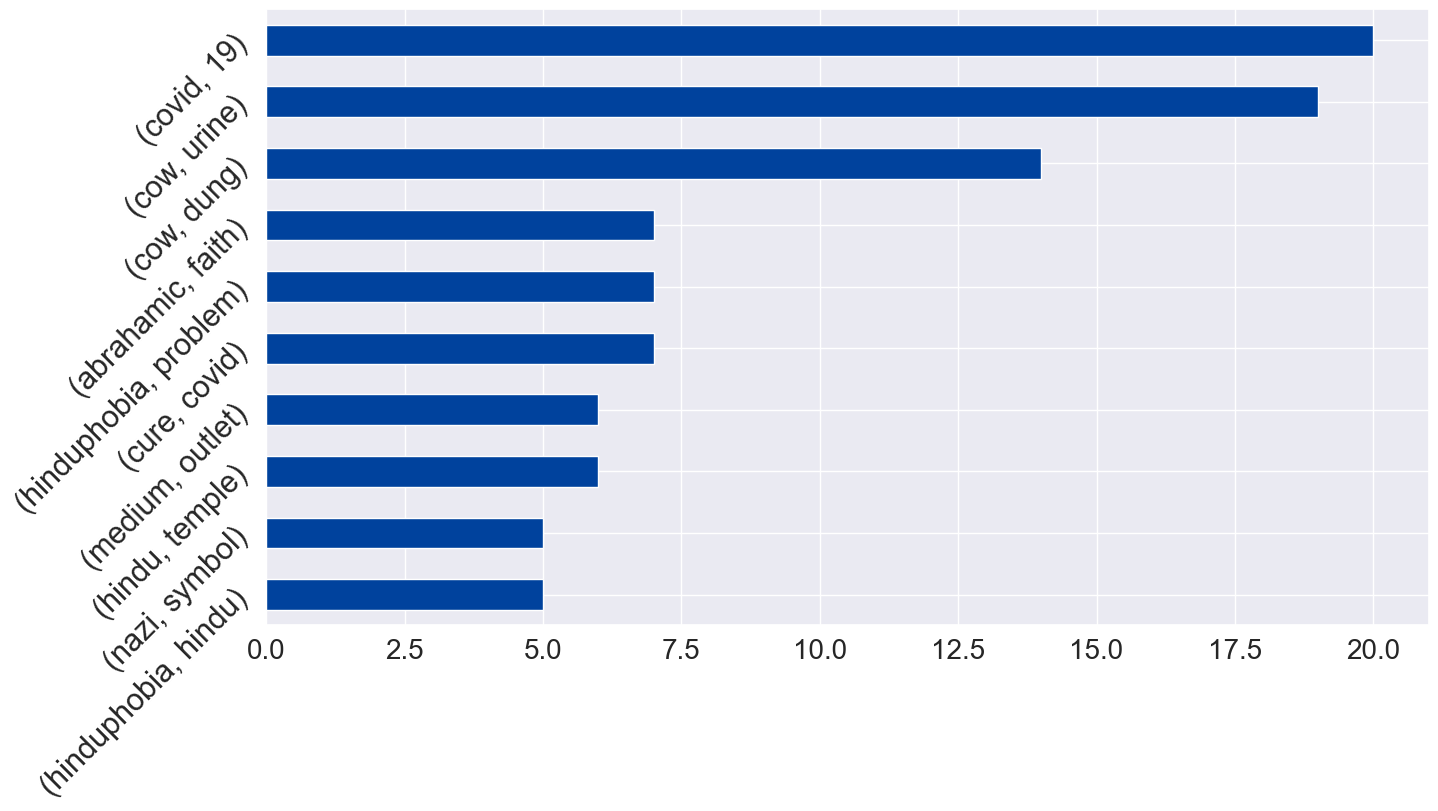

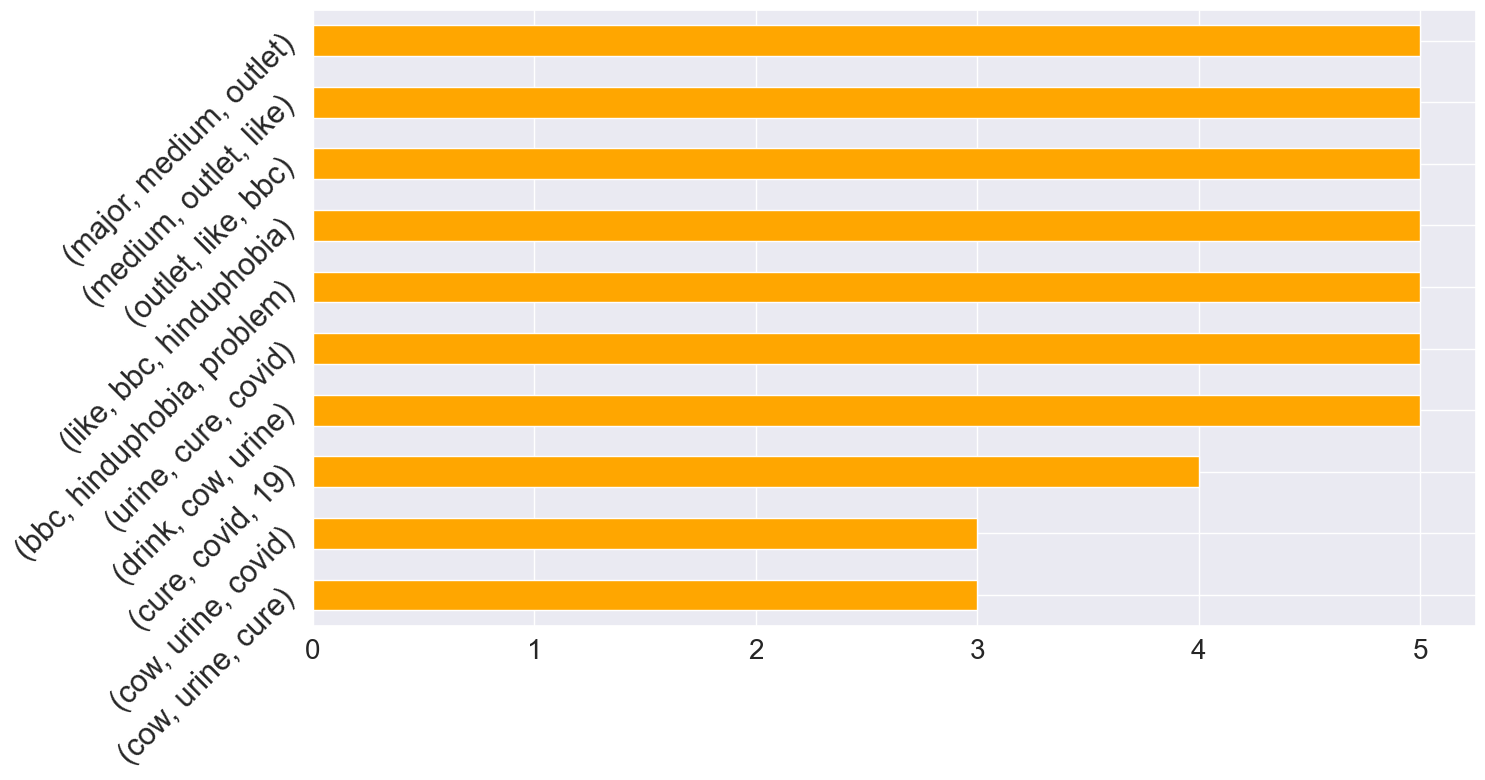

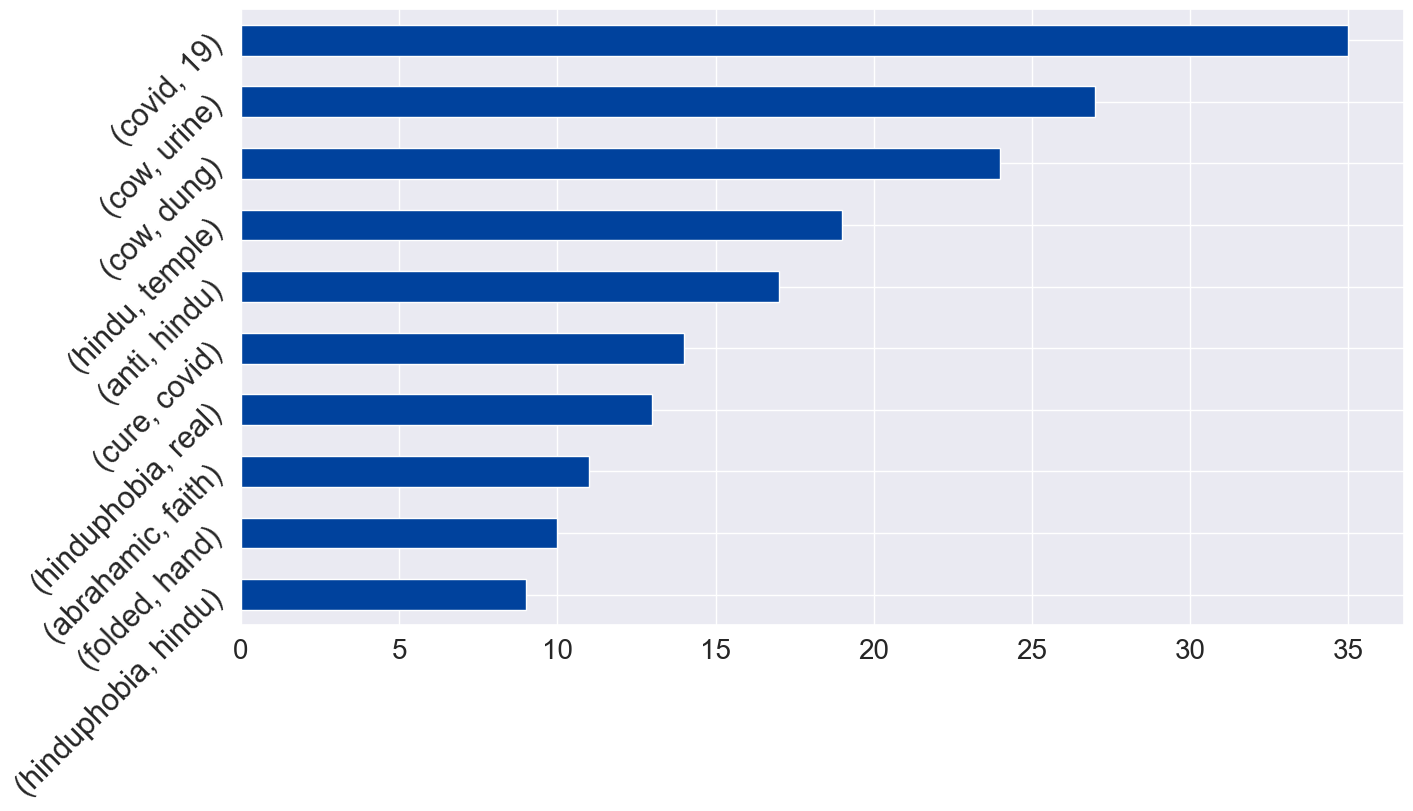

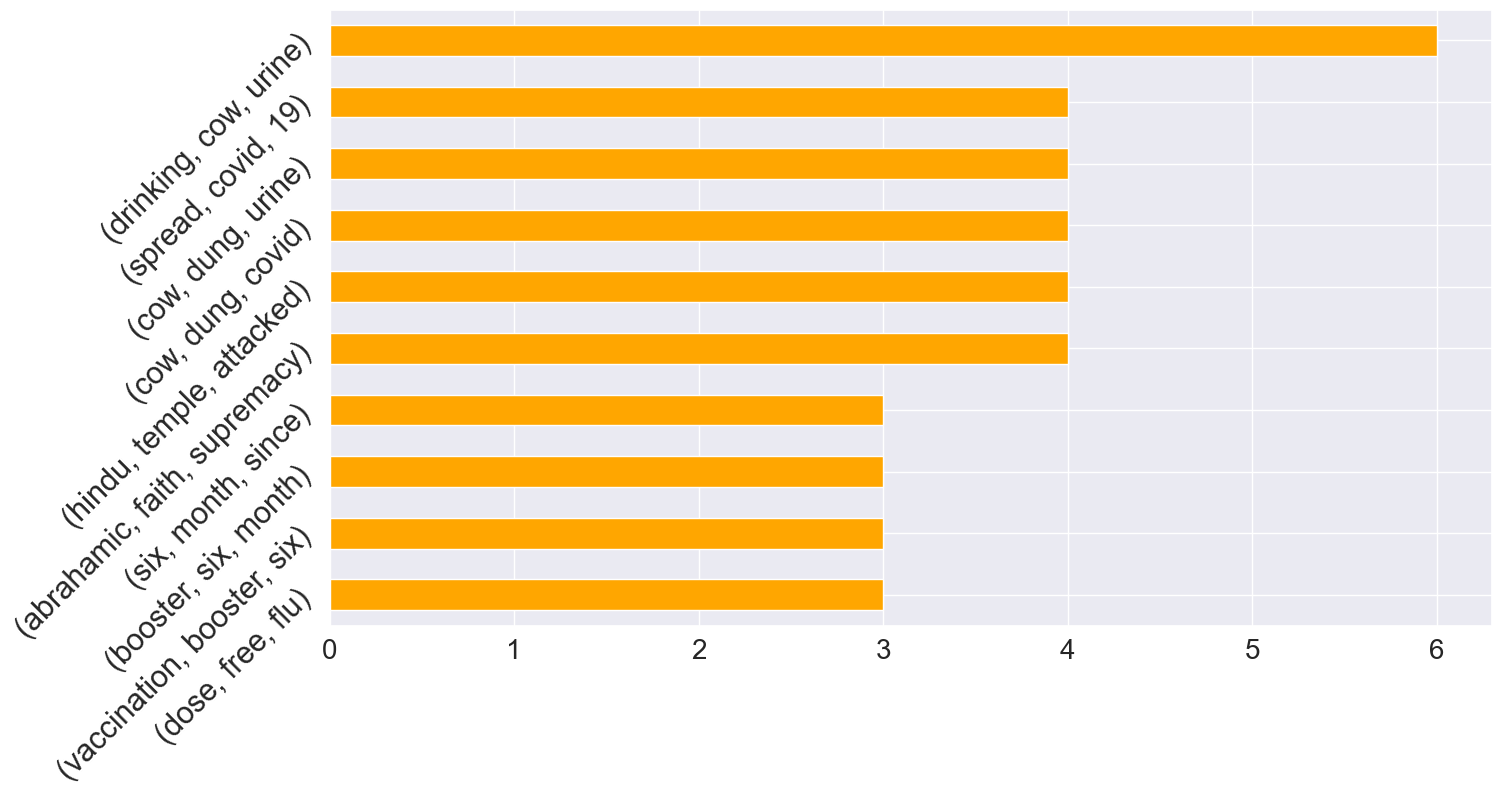

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
import re
from nltk import download

# Ensure NLTK resources are downloaded
download('punkt')
download('wordnet')
download('stopwords')

# Define nonsense words to remove
nonsense_words = {'cbc', 'web','private', 'really', 'gt', 'nyt','2', 'cnn', 'gt', 'dismantlinghinduphobia', 'wapo', 'amp', 'torstar','face', 'outlet', 'vice', '1850', 'nh', 'jab', '50', 'wyndhan', 'vilify', 'rh11 0af','backhand','index','pointing'}

# Define the cleaning function
def clean(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))  # Use a set for faster lookup

    # Normalize and encode the text
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove Twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords and nonsense words, then lemmatize
    words = text.split()
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stop_words and word not in nonsense_words]

    return cleaned_words

# Function to extract specific quarter data
def extract_specific_quarter_data(df, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Function to plot n-grams for a dataset
def plot_ngrams_for_dataset1(data, dataset_name, start_date, end_date, n=[2], top=10, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)
    col = 'text' if 'text' in data.columns else 'tweet'
    quarterly_data[col] = quarterly_data[col].astype(str)
    cleaned_data = clean(' '.join(quarterly_data[col]))

    for i, n_val in enumerate(n):
        plt.figure(figsize=(15, 8))
        ax = plt.subplot()

        ngrams_series = pd.Series(ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        # Adjust tick parameters for better readability
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=22, rotation=45)

        # # Add a title and display the plot
        # plt.title(f'{dataset_name}: Top {n_val}-grams ({start_date} to {end_date})', fontsize=24)
        # plt.xlabel('Frequency', fontsize=18)
        # plt.ylabel('N-grams', fontsize=18)
        # plt.tight_layout()
        # plt.show()

# Main loop to process each country dynamically
unique_countries = data_bi_ti['Country'].unique()  # Extract unique countries from the dataset

for country in unique_countries:
    # Filter texts for the current country
    df = data_bi_ti[data_bi_ti['Country'] == country]
    start_date = '2020-07-01'
    end_date = '2022-04-30'
    date_obj = pd.to_datetime(df['createdAt'], format="%a %b %d %H:%M:%S +0000 %Y")
    df['date'] = date_obj.dt.strftime("%Y-%m-%d")
    df['date'] = pd.to_datetime(df['date'])

    # Plot bigrams
    plot_ngrams_for_dataset1(df, country, start_date, end_date, n=[2], top=10, colors=('#00429d', '#ffa600'))

    # Plot trigrams
    plot_ngrams_for_dataset1(df, country, start_date, end_date, n=[3], top=10, colors=('#ffa600', '#ffa600'))
